In [1]:
import pandas as pd
import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def EmbeddingRec(EMBEDDING_SIZE, NUM_USERS):
    user_input = keras.Input(shape=(1,), name='user_id')

    emb = layers.Embedding(input_dim=NUM_USERS, output_dim=EMBEDDING_SIZE, name='user_emb')
    user_emb = emb(user_input)
    
    out = keras.layers.Flatten()(user_emb)
    
    dense_1 = layers.Dense(8, activation='relu', name='FullyConnected-1')(out)
    
    dense_2 = layers.Dense(8, activation='relu', name='FullyConnected-2')(dense_1)

    result = layers.Dense(EMBEDDING_SIZE, name='result')(dense_2)

    adam = keras.optimizers.Adam(lr=0.001)
    model = keras.Model(user_input, result)
    model.compile(optimizer=adam, loss="mse", metrics="mse")
    
    label_input = keras.Input(shape=(1,), name='label_id')
    label_emb = emb(label_input)
    label_out = keras.layers.Flatten()(label_emb)
    
    label_model = keras.Model(label_input, label_out)
    
    return model, label_model

In [3]:
model, label_model = EmbeddingRec(2, 10)

/opt/homebrew/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 user_id (InputLayer)        [(None, 1)]               0         
                                                                 
 user_emb (Embedding)        (None, 1, 2)              20        
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 FullyConnected-1 (Dense)    (None, 8)                 24        
                                                                 
 FullyConnected-2 (Dense)    (None, 8)                 72        
                                                                 
 result (Dense)              (None, 2)                 18        
                                                                 
Total params: 134
Trainable params: 134
Non-trainable params:

In [5]:
label_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 label_id (InputLayer)       [(None, 1)]               0         
                                                                 
 user_emb (Embedding)        (None, 1, 2)              20        
                                                                 
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.predict(np.array([[0], [1]]))

1/1 [==============================] - 0s 48ms/step


2023-04-16 01:03:07.107899: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


array([[-0.00550529,  0.00168401],
       [-0.00442036,  0.00493471]], dtype=float32)

In [7]:
for epoch in range(10350):
    X = []
    y = []
    for i in range(100):
        X.append([i%10])
        y.append([(i+1)%10])
    y = label_model.predict(y)
    model.fit(np.array(X), y, epochs=1)
    print("epoch ", epoch)

4/4 [==============================] - 0s 1ms/step - loss: 6.7273e-04 - mse: 6.7273e-04
epoch  0
4/4 [==============================] - 0s 756us/step - loss: 6.2393e-04 - mse: 6.2393e-04
epoch  1
4/4 [==============================] - 0s 889us/step - loss: 6.0300e-04 - mse: 6.0300e-04
epoch  2
4/4 [==============================] - 0s 858us/step - loss: 6.1449e-04 - mse: 6.1449e-04
epoch  3
4/4 [==============================] - 0s 823us/step - loss: 6.4043e-04 - mse: 6.4043e-04
epoch  4
4/4 [==============================] - 0s 838us/step - loss: 6.6014e-04 - mse: 6.6014e-04
epoch  5
4/4 [==============================] - 0s 820us/step - loss: 6.7551e-04 - mse: 6.7551e-04
epoch  6
4/4 [==============================] - 0s 805us/step - loss: 6.9140e-04 - mse: 6.9140e-04
epoch  7
4/4 [==============================] - 0s 838us/step - loss: 6.9398e-04 - mse: 6.9398e-04
epoch  8
4/4 [==============================] - 0s 860us/step - loss: 6.9882e-04 - mse: 6.9882e-04
epoch  9
4/4 [=======

4/4 [==============================] - 0s 753us/step - loss: 9.2008e-04 - mse: 9.2008e-04
epoch  55
4/4 [==============================] - 0s 766us/step - loss: 8.8497e-04 - mse: 8.8497e-04
epoch  56
4/4 [==============================] - 0s 796us/step - loss: 7.9301e-04 - mse: 7.9301e-04
epoch  57
4/4 [==============================] - 0s 863us/step - loss: 7.2996e-04 - mse: 7.2996e-04
epoch  58
4/4 [==============================] - 0s 782us/step - loss: 6.6793e-04 - mse: 6.6793e-04
epoch  59
4/4 [==============================] - 0s 1ms/step - loss: 6.3141e-04 - mse: 6.3141e-04
epoch  60
4/4 [==============================] - 0s 812us/step - loss: 5.6552e-04 - mse: 5.6552e-04
epoch  61
4/4 [==============================] - 0s 712us/step - loss: 5.1277e-04 - mse: 5.1277e-04
epoch  62
4/4 [==============================] - 0s 782us/step - loss: 4.6684e-04 - mse: 4.6684e-04
epoch  63
4/4 [==============================] - 0s 691us/step - loss: 4.1624e-04 - mse: 4.1624e-04
epoch  64
4/

4/4 [==============================] - 0s 769us/step - loss: 5.3202e-06 - mse: 5.3202e-06
epoch  108
4/4 [==============================] - 0s 748us/step - loss: 4.6910e-06 - mse: 4.6910e-06
epoch  109
4/4 [==============================] - 0s 766us/step - loss: 4.7672e-06 - mse: 4.7672e-06
epoch  110
4/4 [==============================] - 0s 699us/step - loss: 4.2821e-06 - mse: 4.2821e-06
epoch  111
4/4 [==============================] - 0s 747us/step - loss: 3.7276e-06 - mse: 3.7276e-06
epoch  112
4/4 [==============================] - 0s 704us/step - loss: 3.0500e-06 - mse: 3.0500e-06
epoch  113
4/4 [==============================] - 0s 703us/step - loss: 2.6924e-06 - mse: 2.6924e-06
epoch  114
4/4 [==============================] - 0s 708us/step - loss: 2.3366e-06 - mse: 2.3366e-06
epoch  115
4/4 [==============================] - 0s 722us/step - loss: 1.9896e-06 - mse: 1.9896e-06
epoch  116
4/4 [==============================] - 0s 726us/step - loss: 1.8129e-06 - mse: 1.8129e-06
e

4/4 [==============================] - 0s 841us/step - loss: 8.0134e-10 - mse: 8.0134e-10
epoch  161
4/4 [==============================] - 0s 690us/step - loss: 8.2017e-10 - mse: 8.2017e-10
epoch  162
4/4 [==============================] - 0s 834us/step - loss: 6.7604e-10 - mse: 6.7604e-10
epoch  163
4/4 [==============================] - 0s 768us/step - loss: 5.1278e-10 - mse: 5.1278e-10
epoch  164
4/4 [==============================] - 0s 799us/step - loss: 3.6009e-10 - mse: 3.6009e-10
epoch  165
4/4 [==============================] - 0s 818us/step - loss: 2.5110e-10 - mse: 2.5110e-10
epoch  166
4/4 [==============================] - 0s 759us/step - loss: 1.8132e-10 - mse: 1.8132e-10
epoch  167
4/4 [==============================] - 0s 848us/step - loss: 1.9619e-10 - mse: 1.9619e-10
epoch  168
4/4 [==============================] - 0s 758us/step - loss: 1.1735e-10 - mse: 1.1735e-10
epoch  169
4/4 [==============================] - 0s 761us/step - loss: 1.1852e-10 - mse: 1.1852e-10
e

4/4 [==============================] - 0s 849us/step - loss: 5.4499e-13 - mse: 5.4499e-13
epoch  214
4/4 [==============================] - 0s 750us/step - loss: 1.5705e-13 - mse: 1.5705e-13
epoch  215
4/4 [==============================] - 0s 818us/step - loss: 2.1276e-13 - mse: 2.1276e-13
epoch  216
4/4 [==============================] - 0s 761us/step - loss: 1.4979e-13 - mse: 1.4979e-13
epoch  217
4/4 [==============================] - 0s 769us/step - loss: 1.1806e-13 - mse: 1.1806e-13
epoch  218
4/4 [==============================] - 0s 750us/step - loss: 1.3945e-13 - mse: 1.3945e-13
epoch  219
4/4 [==============================] - 0s 759us/step - loss: 9.5797e-14 - mse: 9.5797e-14
epoch  220
4/4 [==============================] - 0s 776us/step - loss: 1.1725e-13 - mse: 1.1725e-13
epoch  221
4/4 [==============================] - 0s 754us/step - loss: 8.6025e-14 - mse: 8.6025e-14
epoch  222
4/4 [==============================] - 0s 747us/step - loss: 1.3253e-13 - mse: 1.3253e-13
e

4/4 [==============================] - 0s 839us/step - loss: 4.7937e-14 - mse: 4.7937e-14
epoch  267
4/4 [==============================] - 0s 891us/step - loss: 4.2221e-14 - mse: 4.2221e-14
epoch  268
4/4 [==============================] - 0s 717us/step - loss: 2.6309e-14 - mse: 2.6309e-14
epoch  269
4/4 [==============================] - 0s 727us/step - loss: 3.2234e-14 - mse: 3.2234e-14
epoch  270
4/4 [==============================] - 0s 730us/step - loss: 3.9234e-14 - mse: 3.9234e-14
epoch  271
4/4 [==============================] - 0s 743us/step - loss: 2.7831e-14 - mse: 2.7831e-14
epoch  272
4/4 [==============================] - 0s 813us/step - loss: 3.2690e-14 - mse: 3.2690e-14
epoch  273
4/4 [==============================] - 0s 753us/step - loss: 4.6291e-14 - mse: 4.6291e-14
epoch  274
4/4 [==============================] - 0s 678us/step - loss: 1.5940e-14 - mse: 1.5940e-14
epoch  275
4/4 [==============================] - 0s 720us/step - loss: 3.0676e-14 - mse: 3.0676e-14
e

4/4 [==============================] - 0s 964us/step - loss: 2.1320e-14 - mse: 2.1320e-14
epoch  320
4/4 [==============================] - 0s 880us/step - loss: 2.8310e-14 - mse: 2.8310e-14
epoch  321
4/4 [==============================] - 0s 775us/step - loss: 1.2299e-14 - mse: 1.2299e-14
epoch  322
4/4 [==============================] - 0s 748us/step - loss: 1.2555e-14 - mse: 1.2555e-14
epoch  323
4/4 [==============================] - 0s 814us/step - loss: 1.4999e-14 - mse: 1.4999e-14
epoch  324
4/4 [==============================] - 0s 721us/step - loss: 9.2840e-15 - mse: 9.2840e-15
epoch  325
4/4 [==============================] - 0s 882us/step - loss: 9.0844e-15 - mse: 9.0844e-15
epoch  326
4/4 [==============================] - 0s 714us/step - loss: 1.4343e-14 - mse: 1.4343e-14
epoch  327
4/4 [==============================] - 0s 763us/step - loss: 1.6132e-14 - mse: 1.6132e-14
epoch  328
4/4 [==============================] - 0s 738us/step - loss: 2.5229e-14 - mse: 2.5229e-14
e

4/4 [==============================] - 0s 882us/step - loss: 1.4903e-14 - mse: 1.4903e-14
epoch  373
4/4 [==============================] - 0s 786us/step - loss: 1.7078e-14 - mse: 1.7078e-14
epoch  374
4/4 [==============================] - 0s 750us/step - loss: 4.9735e-14 - mse: 4.9735e-14
epoch  375
4/4 [==============================] - 0s 786us/step - loss: 6.2632e-14 - mse: 6.2632e-14
epoch  376
4/4 [==============================] - 0s 768us/step - loss: 7.4865e-14 - mse: 7.4865e-14
epoch  377
4/4 [==============================] - 0s 779us/step - loss: 9.2937e-14 - mse: 9.2937e-14
epoch  378
4/4 [==============================] - 0s 905us/step - loss: 2.6409e-13 - mse: 2.6409e-13
epoch  379
4/4 [==============================] - 0s 980us/step - loss: 5.5074e-13 - mse: 5.5074e-13
epoch  380
4/4 [==============================] - 0s 880us/step - loss: 4.0360e-13 - mse: 4.0360e-13
epoch  381
4/4 [==============================] - 0s 786us/step - loss: 6.6254e-13 - mse: 6.6254e-13
e

4/4 [==============================] - 0s 944us/step - loss: 5.3943e-10 - mse: 5.3943e-10
epoch  426
4/4 [==============================] - 0s 736us/step - loss: 6.4608e-10 - mse: 6.4608e-10
epoch  427
4/4 [==============================] - 0s 820us/step - loss: 1.2162e-09 - mse: 1.2162e-09
epoch  428
4/4 [==============================] - 0s 902us/step - loss: 7.6335e-10 - mse: 7.6335e-10
epoch  429
4/4 [==============================] - 0s 735us/step - loss: 6.7712e-10 - mse: 6.7712e-10
epoch  430
4/4 [==============================] - 0s 731us/step - loss: 2.8199e-10 - mse: 2.8199e-10
epoch  431
4/4 [==============================] - 0s 825us/step - loss: 5.5343e-10 - mse: 5.5343e-10
epoch  432
4/4 [==============================] - 0s 774us/step - loss: 1.3702e-09 - mse: 1.3702e-09
epoch  433
4/4 [==============================] - 0s 747us/step - loss: 5.3843e-10 - mse: 5.3843e-10
epoch  434
4/4 [==============================] - 0s 825us/step - loss: 6.7340e-10 - mse: 6.7340e-10
e

4/4 [==============================] - 0s 714us/step - loss: 7.8680e-07 - mse: 7.8680e-07
epoch  479
4/4 [==============================] - 0s 765us/step - loss: 1.1272e-06 - mse: 1.1272e-06
epoch  480
4/4 [==============================] - 0s 773us/step - loss: 1.7826e-06 - mse: 1.7826e-06
epoch  481
4/4 [==============================] - 0s 866us/step - loss: 2.5940e-06 - mse: 2.5940e-06
epoch  482
4/4 [==============================] - 0s 728us/step - loss: 3.6208e-06 - mse: 3.6208e-06
epoch  483
4/4 [==============================] - 0s 725us/step - loss: 5.2222e-06 - mse: 5.2222e-06
epoch  484
4/4 [==============================] - 0s 724us/step - loss: 2.1105e-06 - mse: 2.1105e-06
epoch  485
4/4 [==============================] - 0s 747us/step - loss: 2.2358e-06 - mse: 2.2358e-06
epoch  486
4/4 [==============================] - 0s 737us/step - loss: 2.6380e-06 - mse: 2.6380e-06
epoch  487
4/4 [==============================] - 0s 671us/step - loss: 2.8279e-06 - mse: 2.8279e-06
e

4/4 [==============================] - 0s 760us/step - loss: 9.0412e-07 - mse: 9.0412e-07
epoch  532
4/4 [==============================] - 0s 707us/step - loss: 7.5415e-07 - mse: 7.5415e-07
epoch  533
4/4 [==============================] - 0s 782us/step - loss: 1.0039e-06 - mse: 1.0039e-06
epoch  534
4/4 [==============================] - 0s 748us/step - loss: 7.4773e-07 - mse: 7.4773e-07
epoch  535
4/4 [==============================] - 0s 746us/step - loss: 7.2025e-07 - mse: 7.2025e-07
epoch  536
4/4 [==============================] - 0s 671us/step - loss: 5.8414e-07 - mse: 5.8414e-07
epoch  537
4/4 [==============================] - 0s 714us/step - loss: 5.4802e-07 - mse: 5.4802e-07
epoch  538
4/4 [==============================] - 0s 761us/step - loss: 7.0623e-07 - mse: 7.0623e-07
epoch  539
4/4 [==============================] - 0s 680us/step - loss: 1.4141e-06 - mse: 1.4141e-06
epoch  540
4/4 [==============================] - 0s 724us/step - loss: 1.3074e-06 - mse: 1.3074e-06
e

4/4 [==============================] - 0s 766us/step - loss: 3.4513e-06 - mse: 3.4513e-06
epoch  585
4/4 [==============================] - 0s 859us/step - loss: 1.6851e-06 - mse: 1.6851e-06
epoch  586
4/4 [==============================] - 0s 717us/step - loss: 1.8978e-06 - mse: 1.8978e-06
epoch  587
4/4 [==============================] - 0s 761us/step - loss: 2.5810e-06 - mse: 2.5810e-06
epoch  588
4/4 [==============================] - 0s 747us/step - loss: 3.0638e-06 - mse: 3.0638e-06
epoch  589
4/4 [==============================] - 0s 760us/step - loss: 3.0754e-06 - mse: 3.0754e-06
epoch  590
4/4 [==============================] - 0s 738us/step - loss: 2.9674e-06 - mse: 2.9674e-06
epoch  591
4/4 [==============================] - 0s 724us/step - loss: 2.9902e-06 - mse: 2.9902e-06
epoch  592
4/4 [==============================] - 0s 718us/step - loss: 3.1647e-06 - mse: 3.1647e-06
epoch  593
4/4 [==============================] - 0s 790us/step - loss: 3.2474e-06 - mse: 3.2474e-06
e

4/4 [==============================] - 0s 855us/step - loss: 3.8760e-06 - mse: 3.8760e-06
epoch  638
4/4 [==============================] - 0s 790us/step - loss: 2.7121e-06 - mse: 2.7121e-06
epoch  639
4/4 [==============================] - 0s 825us/step - loss: 2.9651e-06 - mse: 2.9651e-06
epoch  640
4/4 [==============================] - 0s 808us/step - loss: 3.7261e-06 - mse: 3.7261e-06
epoch  641
4/4 [==============================] - 0s 781us/step - loss: 3.5614e-06 - mse: 3.5614e-06
epoch  642
4/4 [==============================] - 0s 863us/step - loss: 2.6894e-06 - mse: 2.6894e-06
epoch  643
4/4 [==============================] - 0s 709us/step - loss: 3.7896e-06 - mse: 3.7896e-06
epoch  644
4/4 [==============================] - 0s 709us/step - loss: 2.1163e-06 - mse: 2.1163e-06
epoch  645
4/4 [==============================] - 0s 797us/step - loss: 2.0325e-06 - mse: 2.0325e-06
epoch  646
4/4 [==============================] - 0s 787us/step - loss: 2.3741e-06 - mse: 2.3741e-06
e

4/4 [==============================] - 0s 784us/step - loss: 1.9322e-06 - mse: 1.9322e-06
epoch  691
4/4 [==============================] - 0s 724us/step - loss: 2.2525e-06 - mse: 2.2525e-06
epoch  692
4/4 [==============================] - 0s 751us/step - loss: 1.7730e-06 - mse: 1.7730e-06
epoch  693
4/4 [==============================] - 0s 737us/step - loss: 1.7233e-06 - mse: 1.7233e-06
epoch  694
4/4 [==============================] - 0s 710us/step - loss: 2.9320e-06 - mse: 2.9320e-06
epoch  695
4/4 [==============================] - 0s 833us/step - loss: 2.0676e-06 - mse: 2.0676e-06
epoch  696
4/4 [==============================] - 0s 763us/step - loss: 2.5023e-06 - mse: 2.5023e-06
epoch  697
4/4 [==============================] - 0s 853us/step - loss: 2.4254e-06 - mse: 2.4254e-06
epoch  698
4/4 [==============================] - 0s 809us/step - loss: 1.5808e-06 - mse: 1.5808e-06
epoch  699
4/4 [==============================] - 0s 783us/step - loss: 2.2871e-06 - mse: 2.2871e-06
e

4/4 [==============================] - 0s 709us/step - loss: 6.3542e-06 - mse: 6.3542e-06
epoch  744
4/4 [==============================] - 0s 705us/step - loss: 5.9122e-06 - mse: 5.9122e-06
epoch  745
4/4 [==============================] - 0s 769us/step - loss: 6.1767e-06 - mse: 6.1767e-06
epoch  746
4/4 [==============================] - 0s 737us/step - loss: 7.0901e-06 - mse: 7.0901e-06
epoch  747
4/4 [==============================] - 0s 687us/step - loss: 6.1148e-06 - mse: 6.1148e-06
epoch  748
4/4 [==============================] - 0s 688us/step - loss: 8.5264e-06 - mse: 8.5264e-06
epoch  749
4/4 [==============================] - 0s 700us/step - loss: 7.5571e-06 - mse: 7.5571e-06
epoch  750
4/4 [==============================] - 0s 711us/step - loss: 6.3069e-06 - mse: 6.3069e-06
epoch  751
4/4 [==============================] - 0s 719us/step - loss: 8.5499e-06 - mse: 8.5499e-06
epoch  752
4/4 [==============================] - 0s 702us/step - loss: 7.9895e-06 - mse: 7.9895e-06
e

4/4 [==============================] - 0s 717us/step - loss: 3.5831e-06 - mse: 3.5831e-06
epoch  797
4/4 [==============================] - 0s 768us/step - loss: 1.8202e-06 - mse: 1.8202e-06
epoch  798
4/4 [==============================] - 0s 760us/step - loss: 1.2532e-06 - mse: 1.2532e-06
epoch  799
4/4 [==============================] - 0s 737us/step - loss: 1.1455e-06 - mse: 1.1455e-06
epoch  800
4/4 [==============================] - 0s 761us/step - loss: 8.6210e-07 - mse: 8.6210e-07
epoch  801
4/4 [==============================] - 0s 696us/step - loss: 5.7867e-07 - mse: 5.7867e-07
epoch  802
4/4 [==============================] - 0s 681us/step - loss: 9.2154e-07 - mse: 9.2154e-07
epoch  803
4/4 [==============================] - 0s 737us/step - loss: 6.4718e-07 - mse: 6.4718e-07
epoch  804
4/4 [==============================] - 0s 938us/step - loss: 6.0706e-07 - mse: 6.0706e-07
epoch  805
4/4 [==============================] - 0s 1ms/step - loss: 4.8538e-07 - mse: 4.8538e-07
epo

4/4 [==============================] - 0s 759us/step - loss: 4.6334e-08 - mse: 4.6334e-08
epoch  850
4/4 [==============================] - 0s 704us/step - loss: 5.9990e-08 - mse: 5.9990e-08
epoch  851
4/4 [==============================] - 0s 689us/step - loss: 2.7656e-08 - mse: 2.7656e-08
epoch  852
4/4 [==============================] - 0s 709us/step - loss: 3.3238e-08 - mse: 3.3238e-08
epoch  853
4/4 [==============================] - 0s 703us/step - loss: 4.1857e-08 - mse: 4.1857e-08
epoch  854
4/4 [==============================] - 0s 731us/step - loss: 4.4421e-08 - mse: 4.4421e-08
epoch  855
4/4 [==============================] - 0s 795us/step - loss: 3.3508e-08 - mse: 3.3508e-08
epoch  856
4/4 [==============================] - 0s 718us/step - loss: 5.2647e-08 - mse: 5.2647e-08
epoch  857
4/4 [==============================] - 0s 691us/step - loss: 3.8533e-08 - mse: 3.8533e-08
epoch  858
4/4 [==============================] - 0s 774us/step - loss: 3.1189e-08 - mse: 3.1189e-08
e

4/4 [==============================] - 0s 752us/step - loss: 8.5599e-09 - mse: 8.5599e-09
epoch  903
4/4 [==============================] - 0s 691us/step - loss: 1.0830e-08 - mse: 1.0830e-08
epoch  904
4/4 [==============================] - 0s 683us/step - loss: 7.9416e-09 - mse: 7.9416e-09
epoch  905
4/4 [==============================] - 0s 686us/step - loss: 9.8090e-09 - mse: 9.8090e-09
epoch  906
4/4 [==============================] - 0s 742us/step - loss: 1.3412e-08 - mse: 1.3412e-08
epoch  907
4/4 [==============================] - 0s 690us/step - loss: 5.5150e-09 - mse: 5.5150e-09
epoch  908
4/4 [==============================] - 0s 737us/step - loss: 7.5683e-09 - mse: 7.5683e-09
epoch  909
4/4 [==============================] - 0s 702us/step - loss: 1.4495e-08 - mse: 1.4495e-08
epoch  910
4/4 [==============================] - 0s 770us/step - loss: 9.5899e-09 - mse: 9.5899e-09
epoch  911
4/4 [==============================] - 0s 708us/step - loss: 7.8044e-09 - mse: 7.8044e-09
e

4/4 [==============================] - 0s 770us/step - loss: 2.0087e-09 - mse: 2.0087e-09
epoch  956
4/4 [==============================] - 0s 781us/step - loss: 1.3201e-09 - mse: 1.3201e-09
epoch  957
4/4 [==============================] - 0s 735us/step - loss: 2.3319e-09 - mse: 2.3319e-09
epoch  958
4/4 [==============================] - 0s 730us/step - loss: 1.6529e-09 - mse: 1.6529e-09
epoch  959
4/4 [==============================] - 0s 686us/step - loss: 2.7860e-09 - mse: 2.7860e-09
epoch  960
4/4 [==============================] - 0s 660us/step - loss: 3.7634e-09 - mse: 3.7634e-09
epoch  961
4/4 [==============================] - 0s 713us/step - loss: 5.4591e-09 - mse: 5.4591e-09
epoch  962
4/4 [==============================] - 0s 827us/step - loss: 2.1049e-09 - mse: 2.1049e-09
epoch  963
4/4 [==============================] - 0s 780us/step - loss: 3.6813e-09 - mse: 3.6813e-09
epoch  964
4/4 [==============================] - 0s 739us/step - loss: 3.9057e-09 - mse: 3.9057e-09
e

4/4 [==============================] - 0s 716us/step - loss: 3.1723e-08 - mse: 3.1723e-08
epoch  1009
4/4 [==============================] - 0s 712us/step - loss: 6.3938e-08 - mse: 6.3938e-08
epoch  1010
4/4 [==============================] - 0s 693us/step - loss: 6.4978e-08 - mse: 6.4978e-08
epoch  1011
4/4 [==============================] - 0s 708us/step - loss: 7.7799e-08 - mse: 7.7799e-08
epoch  1012
4/4 [==============================] - 0s 697us/step - loss: 8.6669e-08 - mse: 8.6669e-08
epoch  1013
4/4 [==============================] - 0s 687us/step - loss: 9.0820e-08 - mse: 9.0820e-08
epoch  1014
4/4 [==============================] - 0s 721us/step - loss: 1.5819e-07 - mse: 1.5819e-07
epoch  1015
4/4 [==============================] - 0s 715us/step - loss: 1.7101e-07 - mse: 1.7101e-07
epoch  1016
4/4 [==============================] - 0s 758us/step - loss: 3.2402e-07 - mse: 3.2402e-07
epoch  1017
4/4 [==============================] - 0s 678us/step - loss: 2.9247e-07 - mse: 2.9

4/4 [==============================] - 0s 687us/step - loss: 5.4179e-07 - mse: 5.4179e-07
epoch  1062
4/4 [==============================] - 0s 716us/step - loss: 7.0743e-07 - mse: 7.0743e-07
epoch  1063
4/4 [==============================] - 0s 777us/step - loss: 7.9554e-07 - mse: 7.9554e-07
epoch  1064
4/4 [==============================] - 0s 780us/step - loss: 7.6691e-07 - mse: 7.6691e-07
epoch  1065
4/4 [==============================] - 0s 835us/step - loss: 9.2137e-07 - mse: 9.2137e-07
epoch  1066
4/4 [==============================] - 0s 686us/step - loss: 1.2561e-06 - mse: 1.2561e-06
epoch  1067
4/4 [==============================] - 0s 680us/step - loss: 1.0561e-06 - mse: 1.0561e-06
epoch  1068
4/4 [==============================] - 0s 700us/step - loss: 1.4753e-06 - mse: 1.4753e-06
epoch  1069
4/4 [==============================] - 0s 720us/step - loss: 1.8279e-06 - mse: 1.8279e-06
epoch  1070
4/4 [==============================] - 0s 682us/step - loss: 2.9612e-06 - mse: 2.9

4/4 [==============================] - 0s 757us/step - loss: 2.5480e-05 - mse: 2.5480e-05
epoch  1114
4/4 [==============================] - 0s 706us/step - loss: 2.0498e-05 - mse: 2.0498e-05
epoch  1115
4/4 [==============================] - 0s 702us/step - loss: 1.1239e-05 - mse: 1.1239e-05
epoch  1116
4/4 [==============================] - 0s 684us/step - loss: 1.6256e-05 - mse: 1.6256e-05
epoch  1117
4/4 [==============================] - 0s 696us/step - loss: 1.3401e-05 - mse: 1.3401e-05
epoch  1118
4/4 [==============================] - 0s 681us/step - loss: 8.4553e-06 - mse: 8.4553e-06
epoch  1119
4/4 [==============================] - 0s 675us/step - loss: 8.0014e-06 - mse: 8.0014e-06
epoch  1120
4/4 [==============================] - 0s 748us/step - loss: 8.7344e-06 - mse: 8.7344e-06
epoch  1121
4/4 [==============================] - 0s 710us/step - loss: 9.4179e-06 - mse: 9.4179e-06
epoch  1122
4/4 [==============================] - 0s 701us/step - loss: 7.4576e-06 - mse: 7.4

4/4 [==============================] - 0s 671us/step - loss: 8.0771e-07 - mse: 8.0771e-07
epoch  1167
4/4 [==============================] - 0s 721us/step - loss: 9.1518e-07 - mse: 9.1518e-07
epoch  1168
4/4 [==============================] - 0s 731us/step - loss: 7.9117e-07 - mse: 7.9117e-07
epoch  1169
4/4 [==============================] - 0s 761us/step - loss: 8.6221e-07 - mse: 8.6221e-07
epoch  1170
4/4 [==============================] - 0s 743us/step - loss: 8.3110e-07 - mse: 8.3110e-07
epoch  1171
4/4 [==============================] - 0s 708us/step - loss: 8.7067e-07 - mse: 8.7067e-07
epoch  1172
4/4 [==============================] - 0s 694us/step - loss: 8.4363e-07 - mse: 8.4363e-07
epoch  1173
4/4 [==============================] - 0s 670us/step - loss: 1.0049e-06 - mse: 1.0049e-06
epoch  1174
4/4 [==============================] - 0s 708us/step - loss: 1.0441e-06 - mse: 1.0441e-06
epoch  1175
4/4 [==============================] - 0s 756us/step - loss: 4.8629e-07 - mse: 4.8

4/4 [==============================] - 0s 781us/step - loss: 2.5573e-08 - mse: 2.5573e-08
epoch  1219
4/4 [==============================] - 0s 672us/step - loss: 2.7835e-08 - mse: 2.7835e-08
epoch  1220
4/4 [==============================] - 0s 708us/step - loss: 3.1300e-08 - mse: 3.1300e-08
epoch  1221
4/4 [==============================] - 0s 744us/step - loss: 2.1491e-08 - mse: 2.1491e-08
epoch  1222
4/4 [==============================] - 0s 708us/step - loss: 2.6921e-08 - mse: 2.6921e-08
epoch  1223
4/4 [==============================] - 0s 707us/step - loss: 3.3931e-08 - mse: 3.3931e-08
epoch  1224
4/4 [==============================] - 0s 711us/step - loss: 2.2743e-08 - mse: 2.2743e-08
epoch  1225
4/4 [==============================] - 0s 711us/step - loss: 2.7979e-08 - mse: 2.7979e-08
epoch  1226
4/4 [==============================] - 0s 679us/step - loss: 3.4908e-08 - mse: 3.4908e-08
epoch  1227
4/4 [==============================] - 0s 803us/step - loss: 2.5929e-08 - mse: 2.5

4/4 [==============================] - 0s 723us/step - loss: 9.2614e-09 - mse: 9.2614e-09
epoch  1272
4/4 [==============================] - 0s 711us/step - loss: 8.9792e-09 - mse: 8.9792e-09
epoch  1273
4/4 [==============================] - 0s 718us/step - loss: 8.0537e-09 - mse: 8.0537e-09
epoch  1274
4/4 [==============================] - 0s 733us/step - loss: 8.4272e-09 - mse: 8.4272e-09
epoch  1275
4/4 [==============================] - 0s 708us/step - loss: 9.5897e-09 - mse: 9.5897e-09
epoch  1276
4/4 [==============================] - 0s 721us/step - loss: 9.4997e-09 - mse: 9.4997e-09
epoch  1277
4/4 [==============================] - 0s 677us/step - loss: 1.0335e-08 - mse: 1.0335e-08
epoch  1278
4/4 [==============================] - 0s 725us/step - loss: 7.4667e-09 - mse: 7.4667e-09
epoch  1279
4/4 [==============================] - 0s 688us/step - loss: 6.5764e-09 - mse: 6.5764e-09
epoch  1280
4/4 [==============================] - 0s 718us/step - loss: 3.8531e-09 - mse: 3.8

4/4 [==============================] - 0s 721us/step - loss: 1.7553e-08 - mse: 1.7553e-08
epoch  1324
4/4 [==============================] - 0s 688us/step - loss: 9.3259e-09 - mse: 9.3259e-09
epoch  1325
4/4 [==============================] - 0s 729us/step - loss: 2.2623e-08 - mse: 2.2623e-08
epoch  1326
4/4 [==============================] - 0s 695us/step - loss: 1.8120e-08 - mse: 1.8120e-08
epoch  1327
4/4 [==============================] - 0s 714us/step - loss: 2.6919e-08 - mse: 2.6919e-08
epoch  1328
4/4 [==============================] - 0s 661us/step - loss: 4.0045e-08 - mse: 4.0045e-08
epoch  1329
4/4 [==============================] - 0s 706us/step - loss: 5.3585e-08 - mse: 5.3585e-08
epoch  1330
4/4 [==============================] - 0s 686us/step - loss: 6.2928e-08 - mse: 6.2928e-08
epoch  1331
4/4 [==============================] - 0s 750us/step - loss: 5.4213e-08 - mse: 5.4213e-08
epoch  1332
4/4 [==============================] - 0s 735us/step - loss: 3.4056e-08 - mse: 3.4

4/4 [==============================] - 0s 778us/step - loss: 1.1457e-08 - mse: 1.1457e-08
epoch  1377
4/4 [==============================] - 0s 677us/step - loss: 1.3825e-08 - mse: 1.3825e-08
epoch  1378
4/4 [==============================] - 0s 737us/step - loss: 1.1358e-08 - mse: 1.1358e-08
epoch  1379
4/4 [==============================] - 0s 694us/step - loss: 5.5405e-09 - mse: 5.5405e-09
epoch  1380
4/4 [==============================] - 0s 684us/step - loss: 7.4217e-09 - mse: 7.4217e-09
epoch  1381
4/4 [==============================] - 0s 725us/step - loss: 8.1764e-09 - mse: 8.1764e-09
epoch  1382
4/4 [==============================] - 0s 683us/step - loss: 1.4288e-08 - mse: 1.4288e-08
epoch  1383
4/4 [==============================] - 0s 730us/step - loss: 1.3654e-08 - mse: 1.3654e-08
epoch  1384
4/4 [==============================] - 0s 766us/step - loss: 1.2695e-08 - mse: 1.2695e-08
epoch  1385
4/4 [==============================] - 0s 717us/step - loss: 1.7728e-08 - mse: 1.7

4/4 [==============================] - 0s 728us/step - loss: 7.3144e-06 - mse: 7.3144e-06
epoch  1429
4/4 [==============================] - 0s 682us/step - loss: 5.3791e-06 - mse: 5.3791e-06
epoch  1430
4/4 [==============================] - 0s 682us/step - loss: 5.6631e-06 - mse: 5.6631e-06
epoch  1431
4/4 [==============================] - 0s 715us/step - loss: 5.0977e-06 - mse: 5.0977e-06
epoch  1432
4/4 [==============================] - 0s 762us/step - loss: 2.3310e-06 - mse: 2.3310e-06
epoch  1433
4/4 [==============================] - 0s 733us/step - loss: 5.0692e-06 - mse: 5.0692e-06
epoch  1434
4/4 [==============================] - 0s 722us/step - loss: 2.4496e-06 - mse: 2.4496e-06
epoch  1435
4/4 [==============================] - 0s 822us/step - loss: 4.5281e-06 - mse: 4.5281e-06
epoch  1436
4/4 [==============================] - 0s 716us/step - loss: 4.3437e-06 - mse: 4.3437e-06
epoch  1437
4/4 [==============================] - 0s 669us/step - loss: 5.6084e-06 - mse: 5.6

4/4 [==============================] - 0s 753us/step - loss: 4.5807e-06 - mse: 4.5807e-06
epoch  1482
4/4 [==============================] - 0s 751us/step - loss: 3.9160e-06 - mse: 3.9160e-06
epoch  1483
4/4 [==============================] - 0s 692us/step - loss: 2.1978e-06 - mse: 2.1978e-06
epoch  1484
4/4 [==============================] - 0s 668us/step - loss: 2.1219e-06 - mse: 2.1219e-06
epoch  1485
4/4 [==============================] - 0s 724us/step - loss: 2.1937e-06 - mse: 2.1937e-06
epoch  1486
4/4 [==============================] - 0s 708us/step - loss: 2.1314e-06 - mse: 2.1314e-06
epoch  1487
4/4 [==============================] - 0s 723us/step - loss: 2.6798e-06 - mse: 2.6798e-06
epoch  1488
4/4 [==============================] - 0s 751us/step - loss: 2.2255e-06 - mse: 2.2255e-06
epoch  1489
4/4 [==============================] - 0s 686us/step - loss: 1.3355e-06 - mse: 1.3355e-06
epoch  1490
4/4 [==============================] - 0s 751us/step - loss: 7.9460e-07 - mse: 7.9

4/4 [==============================] - 0s 739us/step - loss: 3.8802e-06 - mse: 3.8802e-06
epoch  1534
4/4 [==============================] - 0s 715us/step - loss: 2.3190e-06 - mse: 2.3190e-06
epoch  1535
4/4 [==============================] - 0s 705us/step - loss: 3.2292e-06 - mse: 3.2292e-06
epoch  1536
4/4 [==============================] - 0s 713us/step - loss: 3.2041e-06 - mse: 3.2041e-06
epoch  1537
4/4 [==============================] - 0s 738us/step - loss: 2.8435e-06 - mse: 2.8435e-06
epoch  1538
4/4 [==============================] - 0s 763us/step - loss: 1.4815e-06 - mse: 1.4815e-06
epoch  1539
4/4 [==============================] - 0s 669us/step - loss: 3.0497e-06 - mse: 3.0497e-06
epoch  1540
4/4 [==============================] - 0s 713us/step - loss: 2.1963e-06 - mse: 2.1963e-06
epoch  1541
4/4 [==============================] - 0s 707us/step - loss: 1.7563e-06 - mse: 1.7563e-06
epoch  1542
4/4 [==============================] - 0s 712us/step - loss: 1.4402e-06 - mse: 1.4

4/4 [==============================] - 0s 677us/step - loss: 3.0358e-05 - mse: 3.0358e-05
epoch  1587
4/4 [==============================] - 0s 722us/step - loss: 2.2587e-05 - mse: 2.2587e-05
epoch  1588
4/4 [==============================] - 0s 782us/step - loss: 1.5274e-05 - mse: 1.5274e-05
epoch  1589
4/4 [==============================] - 0s 706us/step - loss: 1.6676e-05 - mse: 1.6676e-05
epoch  1590
4/4 [==============================] - 0s 759us/step - loss: 1.2290e-05 - mse: 1.2290e-05
epoch  1591
4/4 [==============================] - 0s 699us/step - loss: 1.5767e-05 - mse: 1.5767e-05
epoch  1592
4/4 [==============================] - 0s 761us/step - loss: 2.2205e-05 - mse: 2.2205e-05
epoch  1593
4/4 [==============================] - 0s 702us/step - loss: 1.5077e-05 - mse: 1.5077e-05
epoch  1594
4/4 [==============================] - 0s 697us/step - loss: 1.7123e-05 - mse: 1.7123e-05
epoch  1595
4/4 [==============================] - 0s 707us/step - loss: 1.5565e-05 - mse: 1.5

4/4 [==============================] - 0s 705us/step - loss: 1.1127e-06 - mse: 1.1127e-06
epoch  1639
4/4 [==============================] - 0s 878us/step - loss: 2.4671e-06 - mse: 2.4671e-06
epoch  1640
4/4 [==============================] - 0s 732us/step - loss: 3.5184e-06 - mse: 3.5184e-06
epoch  1641
4/4 [==============================] - 0s 762us/step - loss: 1.3738e-06 - mse: 1.3738e-06
epoch  1642
4/4 [==============================] - 0s 735us/step - loss: 1.6398e-06 - mse: 1.6398e-06
epoch  1643
4/4 [==============================] - 0s 669us/step - loss: 2.0319e-06 - mse: 2.0319e-06
epoch  1644
4/4 [==============================] - 0s 743us/step - loss: 1.1602e-06 - mse: 1.1602e-06
epoch  1645
4/4 [==============================] - 0s 723us/step - loss: 1.5174e-06 - mse: 1.5174e-06
epoch  1646
4/4 [==============================] - 0s 670us/step - loss: 1.5017e-06 - mse: 1.5017e-06
epoch  1647
4/4 [==============================] - 0s 715us/step - loss: 1.5369e-06 - mse: 1.5

4/4 [==============================] - 0s 711us/step - loss: 2.9053e-06 - mse: 2.9053e-06
epoch  1692
4/4 [==============================] - 0s 730us/step - loss: 1.9034e-06 - mse: 1.9034e-06
epoch  1693
4/4 [==============================] - 0s 712us/step - loss: 2.6154e-06 - mse: 2.6154e-06
epoch  1694
4/4 [==============================] - 0s 786us/step - loss: 3.0312e-06 - mse: 3.0312e-06
epoch  1695
4/4 [==============================] - 0s 705us/step - loss: 1.9305e-06 - mse: 1.9305e-06
epoch  1696
4/4 [==============================] - 0s 674us/step - loss: 1.9337e-06 - mse: 1.9337e-06
epoch  1697
4/4 [==============================] - 0s 779us/step - loss: 1.7739e-06 - mse: 1.7739e-06
epoch  1698
4/4 [==============================] - 0s 779us/step - loss: 1.8830e-06 - mse: 1.8830e-06
epoch  1699
4/4 [==============================] - 0s 784us/step - loss: 2.3549e-06 - mse: 2.3549e-06
epoch  1700
4/4 [==============================] - 0s 761us/step - loss: 1.9903e-06 - mse: 1.9

4/4 [==============================] - 0s 768us/step - loss: 2.5151e-06 - mse: 2.5151e-06
epoch  1744
4/4 [==============================] - 0s 796us/step - loss: 2.1888e-06 - mse: 2.1888e-06
epoch  1745
4/4 [==============================] - 0s 682us/step - loss: 1.7624e-06 - mse: 1.7624e-06
epoch  1746
4/4 [==============================] - 0s 705us/step - loss: 1.8778e-06 - mse: 1.8778e-06
epoch  1747
4/4 [==============================] - 0s 679us/step - loss: 2.3270e-06 - mse: 2.3270e-06
epoch  1748
4/4 [==============================] - 0s 732us/step - loss: 1.5702e-06 - mse: 1.5702e-06
epoch  1749
4/4 [==============================] - 0s 807us/step - loss: 2.3219e-06 - mse: 2.3219e-06
epoch  1750
4/4 [==============================] - 0s 686us/step - loss: 2.0975e-06 - mse: 2.0975e-06
epoch  1751
4/4 [==============================] - 0s 709us/step - loss: 3.3828e-06 - mse: 3.3828e-06
epoch  1752
4/4 [==============================] - 0s 726us/step - loss: 2.6466e-06 - mse: 2.6

4/4 [==============================] - 0s 758us/step - loss: 8.6589e-07 - mse: 8.6589e-07
epoch  1797
4/4 [==============================] - 0s 692us/step - loss: 7.6622e-07 - mse: 7.6622e-07
epoch  1798
4/4 [==============================] - 0s 741us/step - loss: 1.1151e-06 - mse: 1.1151e-06
epoch  1799
4/4 [==============================] - 0s 793us/step - loss: 1.3558e-06 - mse: 1.3558e-06
epoch  1800
4/4 [==============================] - 0s 778us/step - loss: 8.5676e-07 - mse: 8.5676e-07
epoch  1801
4/4 [==============================] - 0s 703us/step - loss: 1.0235e-06 - mse: 1.0235e-06
epoch  1802
4/4 [==============================] - 0s 786us/step - loss: 8.0754e-07 - mse: 8.0754e-07
epoch  1803
4/4 [==============================] - 0s 731us/step - loss: 1.1035e-06 - mse: 1.1035e-06
epoch  1804
4/4 [==============================] - 0s 650us/step - loss: 9.8579e-07 - mse: 9.8579e-07
epoch  1805
4/4 [==============================] - 0s 735us/step - loss: 7.2445e-07 - mse: 7.2

4/4 [==============================] - 0s 652us/step - loss: 8.4635e-07 - mse: 8.4635e-07
epoch  1849
4/4 [==============================] - 0s 664us/step - loss: 5.1907e-07 - mse: 5.1907e-07
epoch  1850
4/4 [==============================] - 0s 738us/step - loss: 7.1102e-07 - mse: 7.1102e-07
epoch  1851
4/4 [==============================] - 0s 701us/step - loss: 8.4099e-07 - mse: 8.4099e-07
epoch  1852
4/4 [==============================] - 0s 682us/step - loss: 8.8262e-07 - mse: 8.8262e-07
epoch  1853
4/4 [==============================] - 0s 713us/step - loss: 7.8442e-07 - mse: 7.8442e-07
epoch  1854
4/4 [==============================] - 0s 734us/step - loss: 4.3768e-07 - mse: 4.3768e-07
epoch  1855
4/4 [==============================] - 0s 687us/step - loss: 4.6301e-07 - mse: 4.6301e-07
epoch  1856
4/4 [==============================] - 0s 793us/step - loss: 6.5557e-07 - mse: 6.5557e-07
epoch  1857
4/4 [==============================] - 0s 764us/step - loss: 3.8841e-07 - mse: 3.8

4/4 [==============================] - 0s 720us/step - loss: 2.8078e-07 - mse: 2.8078e-07
epoch  1902
4/4 [==============================] - 0s 682us/step - loss: 2.8648e-07 - mse: 2.8648e-07
epoch  1903
4/4 [==============================] - 0s 646us/step - loss: 3.0243e-07 - mse: 3.0243e-07
epoch  1904
4/4 [==============================] - 0s 716us/step - loss: 3.3576e-07 - mse: 3.3576e-07
epoch  1905
4/4 [==============================] - 0s 708us/step - loss: 3.4177e-07 - mse: 3.4177e-07
epoch  1906
4/4 [==============================] - 0s 731us/step - loss: 4.8711e-07 - mse: 4.8711e-07
epoch  1907
4/4 [==============================] - 0s 758us/step - loss: 2.9993e-07 - mse: 2.9993e-07
epoch  1908
4/4 [==============================] - 0s 695us/step - loss: 3.4567e-07 - mse: 3.4567e-07
epoch  1909
4/4 [==============================] - 0s 661us/step - loss: 4.6183e-07 - mse: 4.6183e-07
epoch  1910
4/4 [==============================] - 0s 701us/step - loss: 4.2623e-07 - mse: 4.2

4/4 [==============================] - 0s 734us/step - loss: 6.6939e-06 - mse: 6.6939e-06
epoch  1954
4/4 [==============================] - 0s 702us/step - loss: 6.7529e-06 - mse: 6.7529e-06
epoch  1955
4/4 [==============================] - 0s 699us/step - loss: 9.2414e-06 - mse: 9.2414e-06
epoch  1956
4/4 [==============================] - 0s 711us/step - loss: 1.3971e-05 - mse: 1.3971e-05
epoch  1957
4/4 [==============================] - 0s 693us/step - loss: 1.0349e-05 - mse: 1.0349e-05
epoch  1958
4/4 [==============================] - 0s 750us/step - loss: 7.1232e-06 - mse: 7.1232e-06
epoch  1959
4/4 [==============================] - 0s 681us/step - loss: 1.0272e-05 - mse: 1.0272e-05
epoch  1960
4/4 [==============================] - 0s 754us/step - loss: 6.5489e-06 - mse: 6.5489e-06
epoch  1961
4/4 [==============================] - 0s 743us/step - loss: 1.0646e-05 - mse: 1.0646e-05
epoch  1962
4/4 [==============================] - 0s 726us/step - loss: 7.1512e-06 - mse: 7.1

4/4 [==============================] - 0s 729us/step - loss: 8.2070e-06 - mse: 8.2070e-06
epoch  2007
4/4 [==============================] - 0s 724us/step - loss: 7.3976e-06 - mse: 7.3976e-06
epoch  2008
4/4 [==============================] - 0s 721us/step - loss: 5.9556e-06 - mse: 5.9556e-06
epoch  2009
4/4 [==============================] - 0s 820us/step - loss: 7.3271e-06 - mse: 7.3271e-06
epoch  2010
4/4 [==============================] - 0s 702us/step - loss: 4.4478e-06 - mse: 4.4478e-06
epoch  2011
4/4 [==============================] - 0s 746us/step - loss: 4.8523e-06 - mse: 4.8523e-06
epoch  2012
4/4 [==============================] - 0s 777us/step - loss: 6.9492e-06 - mse: 6.9492e-06
epoch  2013
4/4 [==============================] - 0s 700us/step - loss: 3.2066e-06 - mse: 3.2066e-06
epoch  2014
4/4 [==============================] - 0s 698us/step - loss: 5.2886e-06 - mse: 5.2886e-06
epoch  2015
4/4 [==============================] - 0s 687us/step - loss: 3.7124e-06 - mse: 3.7

4/4 [==============================] - 0s 697us/step - loss: 4.8093e-08 - mse: 4.8093e-08
epoch  2059
4/4 [==============================] - 0s 718us/step - loss: 4.2926e-08 - mse: 4.2926e-08
epoch  2060
4/4 [==============================] - 0s 714us/step - loss: 3.9992e-08 - mse: 3.9992e-08
epoch  2061
4/4 [==============================] - 0s 704us/step - loss: 3.6227e-08 - mse: 3.6227e-08
epoch  2062
4/4 [==============================] - 0s 733us/step - loss: 4.5070e-08 - mse: 4.5070e-08
epoch  2063
4/4 [==============================] - 0s 771us/step - loss: 4.1680e-08 - mse: 4.1680e-08
epoch  2064
4/4 [==============================] - 0s 716us/step - loss: 3.0370e-08 - mse: 3.0370e-08
epoch  2065
4/4 [==============================] - 0s 711us/step - loss: 3.5578e-08 - mse: 3.5578e-08
epoch  2066
4/4 [==============================] - 0s 780us/step - loss: 3.7517e-08 - mse: 3.7517e-08
epoch  2067
4/4 [==============================] - 0s 760us/step - loss: 3.7430e-08 - mse: 3.7

4/4 [==============================] - 0s 713us/step - loss: 3.2626e-09 - mse: 3.2626e-09
epoch  2112
4/4 [==============================] - 0s 768us/step - loss: 5.7026e-09 - mse: 5.7026e-09
epoch  2113
4/4 [==============================] - 0s 677us/step - loss: 5.4470e-09 - mse: 5.4470e-09
epoch  2114
4/4 [==============================] - 0s 678us/step - loss: 4.6952e-09 - mse: 4.6952e-09
epoch  2115
4/4 [==============================] - 0s 768us/step - loss: 4.1793e-09 - mse: 4.1793e-09
epoch  2116
4/4 [==============================] - 0s 691us/step - loss: 4.1318e-09 - mse: 4.1318e-09
epoch  2117
4/4 [==============================] - 0s 676us/step - loss: 4.2643e-09 - mse: 4.2643e-09
epoch  2118
4/4 [==============================] - 0s 711us/step - loss: 6.3541e-09 - mse: 6.3541e-09
epoch  2119
4/4 [==============================] - 0s 745us/step - loss: 4.4043e-09 - mse: 4.4043e-09
epoch  2120
4/4 [==============================] - 0s 748us/step - loss: 5.6516e-09 - mse: 5.6

4/4 [==============================] - 0s 781us/step - loss: 1.5599e-10 - mse: 1.5599e-10
epoch  2164
4/4 [==============================] - 0s 742us/step - loss: 1.4796e-10 - mse: 1.4796e-10
epoch  2165
4/4 [==============================] - 0s 669us/step - loss: 1.0330e-10 - mse: 1.0330e-10
epoch  2166
4/4 [==============================] - 0s 714us/step - loss: 8.2633e-11 - mse: 8.2633e-11
epoch  2167
4/4 [==============================] - 0s 746us/step - loss: 9.4434e-11 - mse: 9.4434e-11
epoch  2168
4/4 [==============================] - 0s 754us/step - loss: 1.3196e-10 - mse: 1.3196e-10
epoch  2169
4/4 [==============================] - 0s 692us/step - loss: 1.4590e-10 - mse: 1.4590e-10
epoch  2170
4/4 [==============================] - 0s 672us/step - loss: 1.4613e-10 - mse: 1.4613e-10
epoch  2171
4/4 [==============================] - 0s 660us/step - loss: 1.9684e-10 - mse: 1.9684e-10
epoch  2172
4/4 [==============================] - 0s 674us/step - loss: 2.1410e-10 - mse: 2.1

4/4 [==============================] - 0s 753us/step - loss: 4.2711e-10 - mse: 4.2711e-10
epoch  2217
4/4 [==============================] - 0s 689us/step - loss: 4.8277e-10 - mse: 4.8277e-10
epoch  2218
4/4 [==============================] - 0s 727us/step - loss: 3.7673e-10 - mse: 3.7673e-10
epoch  2219
4/4 [==============================] - 0s 715us/step - loss: 3.9949e-10 - mse: 3.9949e-10
epoch  2220
4/4 [==============================] - 0s 707us/step - loss: 4.9601e-10 - mse: 4.9601e-10
epoch  2221
4/4 [==============================] - 0s 654us/step - loss: 7.1161e-10 - mse: 7.1161e-10
epoch  2222
4/4 [==============================] - 0s 697us/step - loss: 5.3253e-10 - mse: 5.3253e-10
epoch  2223
4/4 [==============================] - 0s 712us/step - loss: 5.3160e-10 - mse: 5.3160e-10
epoch  2224
4/4 [==============================] - 0s 703us/step - loss: 5.8876e-10 - mse: 5.8876e-10
epoch  2225
4/4 [==============================] - 0s 727us/step - loss: 4.1747e-10 - mse: 4.1

4/4 [==============================] - 0s 814us/step - loss: 1.6368e-08 - mse: 1.6368e-08
epoch  2269
4/4 [==============================] - 0s 755us/step - loss: 1.2033e-08 - mse: 1.2033e-08
epoch  2270
4/4 [==============================] - 0s 732us/step - loss: 1.0970e-08 - mse: 1.0970e-08
epoch  2271
4/4 [==============================] - 0s 698us/step - loss: 1.6245e-08 - mse: 1.6245e-08
epoch  2272
4/4 [==============================] - 0s 664us/step - loss: 1.0470e-08 - mse: 1.0470e-08
epoch  2273
4/4 [==============================] - 0s 740us/step - loss: 1.2251e-08 - mse: 1.2251e-08
epoch  2274
4/4 [==============================] - 0s 684us/step - loss: 1.8586e-08 - mse: 1.8586e-08
epoch  2275
4/4 [==============================] - 0s 708us/step - loss: 1.2597e-08 - mse: 1.2597e-08
epoch  2276
4/4 [==============================] - 0s 690us/step - loss: 8.2695e-09 - mse: 8.2695e-09
epoch  2277
4/4 [==============================] - 0s 697us/step - loss: 8.0801e-09 - mse: 8.0

4/4 [==============================] - 0s 697us/step - loss: 9.7995e-06 - mse: 9.7995e-06
epoch  2322
4/4 [==============================] - 0s 733us/step - loss: 7.4851e-06 - mse: 7.4851e-06
epoch  2323
4/4 [==============================] - 0s 777us/step - loss: 1.0394e-05 - mse: 1.0394e-05
epoch  2324
4/4 [==============================] - 0s 735us/step - loss: 7.0258e-06 - mse: 7.0258e-06
epoch  2325
4/4 [==============================] - 0s 713us/step - loss: 6.1178e-06 - mse: 6.1178e-06
epoch  2326
4/4 [==============================] - 0s 763us/step - loss: 6.3562e-06 - mse: 6.3562e-06
epoch  2327
4/4 [==============================] - 0s 731us/step - loss: 9.4513e-06 - mse: 9.4513e-06
epoch  2328
4/4 [==============================] - 0s 715us/step - loss: 5.8151e-06 - mse: 5.8151e-06
epoch  2329
4/4 [==============================] - 0s 704us/step - loss: 6.6706e-06 - mse: 6.6706e-06
epoch  2330
4/4 [==============================] - 0s 655us/step - loss: 7.6934e-06 - mse: 7.6

4/4 [==============================] - 0s 723us/step - loss: 5.7265e-06 - mse: 5.7265e-06
epoch  2374
4/4 [==============================] - 0s 777us/step - loss: 8.3669e-06 - mse: 8.3669e-06
epoch  2375
4/4 [==============================] - 0s 752us/step - loss: 4.4734e-06 - mse: 4.4734e-06
epoch  2376
4/4 [==============================] - 0s 699us/step - loss: 6.6250e-06 - mse: 6.6250e-06
epoch  2377
4/4 [==============================] - 0s 871us/step - loss: 7.2456e-06 - mse: 7.2456e-06
epoch  2378
4/4 [==============================] - 0s 810us/step - loss: 6.1168e-06 - mse: 6.1168e-06
epoch  2379
4/4 [==============================] - 0s 849us/step - loss: 4.7486e-06 - mse: 4.7486e-06
epoch  2380
4/4 [==============================] - 0s 668us/step - loss: 5.4472e-06 - mse: 5.4472e-06
epoch  2381
4/4 [==============================] - 0s 733us/step - loss: 5.5435e-06 - mse: 5.5435e-06
epoch  2382
4/4 [==============================] - 0s 703us/step - loss: 8.8539e-06 - mse: 8.8

4/4 [==============================] - 0s 773us/step - loss: 5.3144e-06 - mse: 5.3144e-06
epoch  2427
4/4 [==============================] - 0s 916us/step - loss: 4.6374e-06 - mse: 4.6374e-06
epoch  2428
4/4 [==============================] - 0s 828us/step - loss: 4.8833e-06 - mse: 4.8833e-06
epoch  2429
4/4 [==============================] - 0s 844us/step - loss: 4.0764e-06 - mse: 4.0764e-06
epoch  2430
4/4 [==============================] - 0s 920us/step - loss: 5.7265e-06 - mse: 5.7265e-06
epoch  2431
4/4 [==============================] - 0s 808us/step - loss: 5.6490e-06 - mse: 5.6490e-06
epoch  2432
4/4 [==============================] - 0s 786us/step - loss: 7.4154e-06 - mse: 7.4154e-06
epoch  2433
4/4 [==============================] - 0s 700us/step - loss: 4.9639e-06 - mse: 4.9639e-06
epoch  2434
4/4 [==============================] - 0s 717us/step - loss: 4.2976e-06 - mse: 4.2976e-06
epoch  2435
4/4 [==============================] - 0s 661us/step - loss: 4.7532e-06 - mse: 4.7

4/4 [==============================] - 0s 907us/step - loss: 1.2392e-06 - mse: 1.2392e-06
epoch  2479
4/4 [==============================] - 0s 840us/step - loss: 1.1952e-06 - mse: 1.1952e-06
epoch  2480
4/4 [==============================] - 0s 722us/step - loss: 1.4044e-06 - mse: 1.4044e-06
epoch  2481
4/4 [==============================] - 0s 705us/step - loss: 6.6181e-07 - mse: 6.6181e-07
epoch  2482
4/4 [==============================] - 0s 772us/step - loss: 9.3126e-07 - mse: 9.3126e-07
epoch  2483
4/4 [==============================] - 0s 743us/step - loss: 9.3882e-07 - mse: 9.3882e-07
epoch  2484
4/4 [==============================] - 0s 762us/step - loss: 8.2003e-07 - mse: 8.2003e-07
epoch  2485
4/4 [==============================] - 0s 808us/step - loss: 1.0912e-06 - mse: 1.0912e-06
epoch  2486
4/4 [==============================] - 0s 754us/step - loss: 9.4434e-07 - mse: 9.4434e-07
epoch  2487
4/4 [==============================] - 0s 756us/step - loss: 1.0770e-06 - mse: 1.0

4/4 [==============================] - 0s 867us/step - loss: 5.8307e-07 - mse: 5.8307e-07
epoch  2532
4/4 [==============================] - 0s 788us/step - loss: 1.1153e-06 - mse: 1.1153e-06
epoch  2533
4/4 [==============================] - 0s 831us/step - loss: 1.0085e-06 - mse: 1.0085e-06
epoch  2534
4/4 [==============================] - 0s 709us/step - loss: 1.0074e-06 - mse: 1.0074e-06
epoch  2535
4/4 [==============================] - 0s 789us/step - loss: 9.8367e-07 - mse: 9.8367e-07
epoch  2536
4/4 [==============================] - 0s 751us/step - loss: 3.3114e-07 - mse: 3.3114e-07
epoch  2537
4/4 [==============================] - 0s 745us/step - loss: 4.8353e-07 - mse: 4.8353e-07
epoch  2538
4/4 [==============================] - 0s 753us/step - loss: 4.4411e-07 - mse: 4.4411e-07
epoch  2539
4/4 [==============================] - 0s 749us/step - loss: 4.3042e-07 - mse: 4.3042e-07
epoch  2540
4/4 [==============================] - 0s 711us/step - loss: 3.9194e-07 - mse: 3.9

4/4 [==============================] - 0s 818us/step - loss: 6.6074e-07 - mse: 6.6074e-07
epoch  2584
4/4 [==============================] - 0s 813us/step - loss: 6.1438e-07 - mse: 6.1438e-07
epoch  2585
4/4 [==============================] - 0s 765us/step - loss: 5.3292e-07 - mse: 5.3292e-07
epoch  2586
4/4 [==============================] - 0s 737us/step - loss: 7.1627e-07 - mse: 7.1627e-07
epoch  2587
4/4 [==============================] - 0s 706us/step - loss: 5.3910e-07 - mse: 5.3910e-07
epoch  2588
4/4 [==============================] - 0s 897us/step - loss: 4.2052e-07 - mse: 4.2052e-07
epoch  2589
4/4 [==============================] - 0s 837us/step - loss: 3.6893e-07 - mse: 3.6893e-07
epoch  2590
4/4 [==============================] - 0s 934us/step - loss: 2.8612e-07 - mse: 2.8612e-07
epoch  2591
4/4 [==============================] - 0s 727us/step - loss: 3.0574e-07 - mse: 3.0574e-07
epoch  2592
4/4 [==============================] - 0s 764us/step - loss: 1.3608e-07 - mse: 1.3

4/4 [==============================] - 0s 931us/step - loss: 9.9018e-07 - mse: 9.9018e-07
epoch  2637
4/4 [==============================] - 0s 729us/step - loss: 8.2704e-07 - mse: 8.2704e-07
epoch  2638
4/4 [==============================] - 0s 781us/step - loss: 1.0923e-06 - mse: 1.0923e-06
epoch  2639
4/4 [==============================] - 0s 733us/step - loss: 1.1551e-06 - mse: 1.1551e-06
epoch  2640
4/4 [==============================] - 0s 763us/step - loss: 1.2494e-06 - mse: 1.2494e-06
epoch  2641
4/4 [==============================] - 0s 726us/step - loss: 1.4499e-06 - mse: 1.4499e-06
epoch  2642
4/4 [==============================] - 0s 857us/step - loss: 1.0719e-06 - mse: 1.0719e-06
epoch  2643
4/4 [==============================] - 0s 748us/step - loss: 1.1370e-06 - mse: 1.1370e-06
epoch  2644
4/4 [==============================] - 0s 719us/step - loss: 8.7729e-07 - mse: 8.7729e-07
epoch  2645
4/4 [==============================] - 0s 709us/step - loss: 1.0297e-06 - mse: 1.0

4/4 [==============================] - 0s 804us/step - loss: 7.5167e-06 - mse: 7.5167e-06
epoch  2689
4/4 [==============================] - 0s 789us/step - loss: 4.9534e-06 - mse: 4.9534e-06
epoch  2690
4/4 [==============================] - 0s 854us/step - loss: 4.6251e-06 - mse: 4.6251e-06
epoch  2691
4/4 [==============================] - 0s 747us/step - loss: 5.7543e-06 - mse: 5.7543e-06
epoch  2692
4/4 [==============================] - 0s 780us/step - loss: 4.8028e-06 - mse: 4.8028e-06
epoch  2693
4/4 [==============================] - 0s 718us/step - loss: 7.1255e-06 - mse: 7.1255e-06
epoch  2694
4/4 [==============================] - 0s 744us/step - loss: 5.0029e-06 - mse: 5.0029e-06
epoch  2695
4/4 [==============================] - 0s 703us/step - loss: 4.7705e-06 - mse: 4.7705e-06
epoch  2696
4/4 [==============================] - 0s 794us/step - loss: 4.7530e-06 - mse: 4.7530e-06
epoch  2697
4/4 [==============================] - 0s 760us/step - loss: 3.4509e-06 - mse: 3.4

4/4 [==============================] - 0s 904us/step - loss: 7.0760e-06 - mse: 7.0760e-06
epoch  2742
4/4 [==============================] - 0s 859us/step - loss: 6.7205e-06 - mse: 6.7205e-06
epoch  2743
4/4 [==============================] - 0s 818us/step - loss: 6.0647e-06 - mse: 6.0647e-06
epoch  2744
4/4 [==============================] - 0s 711us/step - loss: 5.0508e-06 - mse: 5.0508e-06
epoch  2745
4/4 [==============================] - 0s 745us/step - loss: 5.3911e-06 - mse: 5.3911e-06
epoch  2746
4/4 [==============================] - 0s 781us/step - loss: 6.7288e-06 - mse: 6.7288e-06
epoch  2747
4/4 [==============================] - 0s 762us/step - loss: 3.7264e-06 - mse: 3.7264e-06
epoch  2748
4/4 [==============================] - 0s 929us/step - loss: 3.0830e-06 - mse: 3.0830e-06
epoch  2749
4/4 [==============================] - 0s 829us/step - loss: 4.7368e-06 - mse: 4.7368e-06
epoch  2750
4/4 [==============================] - 0s 873us/step - loss: 4.0939e-06 - mse: 4.0

4/4 [==============================] - 0s 858us/step - loss: 2.2030e-06 - mse: 2.2030e-06
epoch  2794
4/4 [==============================] - 0s 743us/step - loss: 6.7170e-07 - mse: 6.7170e-07
epoch  2795
4/4 [==============================] - 0s 777us/step - loss: 1.2598e-06 - mse: 1.2598e-06
epoch  2796
4/4 [==============================] - 0s 818us/step - loss: 4.9423e-07 - mse: 4.9423e-07
epoch  2797
4/4 [==============================] - 0s 824us/step - loss: 8.1895e-07 - mse: 8.1895e-07
epoch  2798
4/4 [==============================] - 0s 763us/step - loss: 4.9460e-07 - mse: 4.9460e-07
epoch  2799
4/4 [==============================] - 0s 843us/step - loss: 8.8951e-07 - mse: 8.8951e-07
epoch  2800
4/4 [==============================] - 0s 728us/step - loss: 8.1757e-07 - mse: 8.1757e-07
epoch  2801
4/4 [==============================] - 0s 760us/step - loss: 6.7339e-07 - mse: 6.7339e-07
epoch  2802
4/4 [==============================] - 0s 778us/step - loss: 8.8808e-07 - mse: 8.8

4/4 [==============================] - 0s 814us/step - loss: 1.9131e-07 - mse: 1.9131e-07
epoch  2847
4/4 [==============================] - 0s 775us/step - loss: 2.3599e-07 - mse: 2.3599e-07
epoch  2848
4/4 [==============================] - 0s 795us/step - loss: 2.4505e-07 - mse: 2.4505e-07
epoch  2849
4/4 [==============================] - 0s 712us/step - loss: 2.4065e-07 - mse: 2.4065e-07
epoch  2850
4/4 [==============================] - 0s 818us/step - loss: 1.4984e-07 - mse: 1.4984e-07
epoch  2851
4/4 [==============================] - 0s 751us/step - loss: 2.7814e-07 - mse: 2.7814e-07
epoch  2852
4/4 [==============================] - 0s 770us/step - loss: 2.1148e-07 - mse: 2.1148e-07
epoch  2853
4/4 [==============================] - 0s 852us/step - loss: 3.2855e-07 - mse: 3.2855e-07
epoch  2854
4/4 [==============================] - 0s 750us/step - loss: 5.8745e-07 - mse: 5.8745e-07
epoch  2855
4/4 [==============================] - 0s 790us/step - loss: 4.1999e-07 - mse: 4.1

4/4 [==============================] - 0s 950us/step - loss: 1.7055e-07 - mse: 1.7055e-07
epoch  2899
4/4 [==============================] - 0s 803us/step - loss: 2.3227e-07 - mse: 2.3227e-07
epoch  2900
4/4 [==============================] - 0s 778us/step - loss: 1.3886e-07 - mse: 1.3886e-07
epoch  2901
4/4 [==============================] - 0s 748us/step - loss: 1.3771e-07 - mse: 1.3771e-07
epoch  2902
4/4 [==============================] - 0s 750us/step - loss: 1.6389e-07 - mse: 1.6389e-07
epoch  2903
4/4 [==============================] - 0s 824us/step - loss: 1.7510e-07 - mse: 1.7510e-07
epoch  2904
4/4 [==============================] - 0s 885us/step - loss: 1.8263e-07 - mse: 1.8263e-07
epoch  2905
4/4 [==============================] - 0s 734us/step - loss: 1.9311e-07 - mse: 1.9311e-07
epoch  2906
4/4 [==============================] - 0s 791us/step - loss: 1.8426e-07 - mse: 1.8426e-07
epoch  2907
4/4 [==============================] - 0s 702us/step - loss: 1.5698e-07 - mse: 1.5

4/4 [==============================] - 0s 739us/step - loss: 6.1792e-07 - mse: 6.1792e-07
epoch  2952
4/4 [==============================] - 0s 716us/step - loss: 1.2392e-06 - mse: 1.2392e-06
epoch  2953
4/4 [==============================] - 0s 842us/step - loss: 1.4335e-06 - mse: 1.4335e-06
epoch  2954
4/4 [==============================] - 0s 780us/step - loss: 1.4064e-06 - mse: 1.4064e-06
epoch  2955
4/4 [==============================] - 0s 783us/step - loss: 1.9633e-06 - mse: 1.9633e-06
epoch  2956
4/4 [==============================] - 0s 814us/step - loss: 1.1191e-06 - mse: 1.1191e-06
epoch  2957
4/4 [==============================] - 0s 742us/step - loss: 1.0546e-06 - mse: 1.0546e-06
epoch  2958
4/4 [==============================] - 0s 759us/step - loss: 1.0884e-06 - mse: 1.0884e-06
epoch  2959
4/4 [==============================] - 0s 729us/step - loss: 1.1462e-06 - mse: 1.1462e-06
epoch  2960
4/4 [==============================] - 0s 664us/step - loss: 1.1914e-06 - mse: 1.1

4/4 [==============================] - 0s 873us/step - loss: 1.0672e-05 - mse: 1.0672e-05
epoch  3004
4/4 [==============================] - 0s 748us/step - loss: 1.2614e-05 - mse: 1.2614e-05
epoch  3005
4/4 [==============================] - 0s 920us/step - loss: 1.1302e-05 - mse: 1.1302e-05
epoch  3006
4/4 [==============================] - 0s 880us/step - loss: 1.2126e-05 - mse: 1.2126e-05
epoch  3007
4/4 [==============================] - 0s 787us/step - loss: 8.8496e-06 - mse: 8.8496e-06
epoch  3008
4/4 [==============================] - 0s 725us/step - loss: 9.1730e-06 - mse: 9.1730e-06
epoch  3009
4/4 [==============================] - 0s 804us/step - loss: 9.5072e-06 - mse: 9.5072e-06
epoch  3010
4/4 [==============================] - 0s 739us/step - loss: 1.6775e-05 - mse: 1.6775e-05
epoch  3011
4/4 [==============================] - 0s 716us/step - loss: 8.8773e-06 - mse: 8.8773e-06
epoch  3012
4/4 [==============================] - 0s 790us/step - loss: 2.4419e-05 - mse: 2.4

4/4 [==============================] - 0s 861us/step - loss: 1.6028e-05 - mse: 1.6028e-05
epoch  3057
4/4 [==============================] - 0s 757us/step - loss: 1.5482e-05 - mse: 1.5482e-05
epoch  3058
4/4 [==============================] - 0s 695us/step - loss: 1.2746e-05 - mse: 1.2746e-05
epoch  3059
4/4 [==============================] - 0s 691us/step - loss: 1.0128e-05 - mse: 1.0128e-05
epoch  3060
4/4 [==============================] - 0s 713us/step - loss: 9.9785e-06 - mse: 9.9785e-06
epoch  3061
4/4 [==============================] - 0s 719us/step - loss: 1.3204e-05 - mse: 1.3204e-05
epoch  3062
4/4 [==============================] - 0s 710us/step - loss: 1.0447e-05 - mse: 1.0447e-05
epoch  3063
4/4 [==============================] - 0s 697us/step - loss: 1.0165e-05 - mse: 1.0165e-05
epoch  3064
4/4 [==============================] - 0s 751us/step - loss: 1.2762e-05 - mse: 1.2762e-05
epoch  3065
4/4 [==============================] - 0s 753us/step - loss: 1.1947e-05 - mse: 1.1

4/4 [==============================] - 0s 720us/step - loss: 5.7197e-06 - mse: 5.7197e-06
epoch  3109
4/4 [==============================] - 0s 704us/step - loss: 6.7614e-06 - mse: 6.7614e-06
epoch  3110
4/4 [==============================] - 0s 725us/step - loss: 4.4647e-06 - mse: 4.4647e-06
epoch  3111
4/4 [==============================] - 0s 703us/step - loss: 2.8525e-06 - mse: 2.8525e-06
epoch  3112
4/4 [==============================] - 0s 775us/step - loss: 3.7611e-06 - mse: 3.7611e-06
epoch  3113
4/4 [==============================] - 0s 689us/step - loss: 4.0034e-06 - mse: 4.0034e-06
epoch  3114
4/4 [==============================] - 0s 717us/step - loss: 4.5463e-06 - mse: 4.5463e-06
epoch  3115
4/4 [==============================] - 0s 670us/step - loss: 5.5533e-06 - mse: 5.5533e-06
epoch  3116
4/4 [==============================] - 0s 783us/step - loss: 4.1865e-06 - mse: 4.1865e-06
epoch  3117
4/4 [==============================] - 0s 712us/step - loss: 3.5381e-06 - mse: 3.5

4/4 [==============================] - 0s 738us/step - loss: 1.5387e-07 - mse: 1.5387e-07
epoch  3162
4/4 [==============================] - 0s 738us/step - loss: 1.6930e-07 - mse: 1.6930e-07
epoch  3163
4/4 [==============================] - 0s 753us/step - loss: 2.5125e-07 - mse: 2.5125e-07
epoch  3164
4/4 [==============================] - 0s 764us/step - loss: 3.3141e-07 - mse: 3.3141e-07
epoch  3165
4/4 [==============================] - 0s 699us/step - loss: 2.8541e-07 - mse: 2.8541e-07
epoch  3166
4/4 [==============================] - 0s 697us/step - loss: 2.9188e-07 - mse: 2.9188e-07
epoch  3167
4/4 [==============================] - 0s 709us/step - loss: 4.5381e-07 - mse: 4.5381e-07
epoch  3168
4/4 [==============================] - 0s 698us/step - loss: 6.8367e-07 - mse: 6.8367e-07
epoch  3169
4/4 [==============================] - 0s 720us/step - loss: 6.3192e-07 - mse: 6.3192e-07
epoch  3170
4/4 [==============================] - 0s 693us/step - loss: 7.2363e-07 - mse: 7.2

4/4 [==============================] - 0s 758us/step - loss: 2.7698e-07 - mse: 2.7698e-07
epoch  3214
4/4 [==============================] - 0s 720us/step - loss: 2.3909e-07 - mse: 2.3909e-07
epoch  3215
4/4 [==============================] - 0s 702us/step - loss: 1.7978e-07 - mse: 1.7978e-07
epoch  3216
4/4 [==============================] - 0s 677us/step - loss: 1.9187e-07 - mse: 1.9187e-07
epoch  3217
4/4 [==============================] - 0s 700us/step - loss: 1.5216e-07 - mse: 1.5216e-07
epoch  3218
4/4 [==============================] - 0s 718us/step - loss: 1.7714e-07 - mse: 1.7714e-07
epoch  3219
4/4 [==============================] - 0s 720us/step - loss: 1.3211e-07 - mse: 1.3211e-07
epoch  3220
4/4 [==============================] - 0s 767us/step - loss: 1.5025e-07 - mse: 1.5025e-07
epoch  3221
4/4 [==============================] - 0s 718us/step - loss: 1.1738e-07 - mse: 1.1738e-07
epoch  3222
4/4 [==============================] - 0s 727us/step - loss: 1.4151e-07 - mse: 1.4

4/4 [==============================] - 0s 727us/step - loss: 1.8928e-08 - mse: 1.8928e-08
epoch  3267
4/4 [==============================] - 0s 685us/step - loss: 2.0060e-08 - mse: 2.0060e-08
epoch  3268
4/4 [==============================] - 0s 752us/step - loss: 1.6784e-08 - mse: 1.6784e-08
epoch  3269
4/4 [==============================] - 0s 674us/step - loss: 2.2510e-08 - mse: 2.2510e-08
epoch  3270
4/4 [==============================] - 0s 698us/step - loss: 3.0034e-08 - mse: 3.0034e-08
epoch  3271
4/4 [==============================] - 0s 716us/step - loss: 2.7251e-08 - mse: 2.7251e-08
epoch  3272
4/4 [==============================] - 0s 715us/step - loss: 3.1763e-08 - mse: 3.1763e-08
epoch  3273
4/4 [==============================] - 0s 636us/step - loss: 3.5961e-08 - mse: 3.5961e-08
epoch  3274
4/4 [==============================] - 0s 711us/step - loss: 4.8366e-08 - mse: 4.8366e-08
epoch  3275
4/4 [==============================] - 0s 684us/step - loss: 5.1160e-08 - mse: 5.1

4/4 [==============================] - 0s 750us/step - loss: 7.3555e-06 - mse: 7.3555e-06
epoch  3319
4/4 [==============================] - 0s 744us/step - loss: 5.3124e-06 - mse: 5.3124e-06
epoch  3320
4/4 [==============================] - 0s 748us/step - loss: 3.9087e-06 - mse: 3.9087e-06
epoch  3321
4/4 [==============================] - 0s 744us/step - loss: 4.4306e-06 - mse: 4.4306e-06
epoch  3322
4/4 [==============================] - 0s 722us/step - loss: 2.6686e-06 - mse: 2.6686e-06
epoch  3323
4/4 [==============================] - 0s 664us/step - loss: 2.8076e-06 - mse: 2.8076e-06
epoch  3324
4/4 [==============================] - 0s 712us/step - loss: 4.2112e-06 - mse: 4.2112e-06
epoch  3325
4/4 [==============================] - 0s 721us/step - loss: 2.7301e-06 - mse: 2.7301e-06
epoch  3326
4/4 [==============================] - 0s 744us/step - loss: 4.5457e-06 - mse: 4.5457e-06
epoch  3327
4/4 [==============================] - 0s 689us/step - loss: 5.2920e-06 - mse: 5.2

4/4 [==============================] - 0s 705us/step - loss: 3.1638e-06 - mse: 3.1638e-06
epoch  3372
4/4 [==============================] - 0s 846us/step - loss: 3.8405e-06 - mse: 3.8405e-06
epoch  3373
4/4 [==============================] - 0s 731us/step - loss: 5.5881e-06 - mse: 5.5881e-06
epoch  3374
4/4 [==============================] - 0s 732us/step - loss: 5.1309e-06 - mse: 5.1309e-06
epoch  3375
4/4 [==============================] - 0s 701us/step - loss: 4.3884e-06 - mse: 4.3884e-06
epoch  3376
4/4 [==============================] - 0s 692us/step - loss: 3.9979e-06 - mse: 3.9979e-06
epoch  3377
4/4 [==============================] - 0s 705us/step - loss: 3.7908e-06 - mse: 3.7908e-06
epoch  3378
4/4 [==============================] - 0s 760us/step - loss: 3.9068e-06 - mse: 3.9068e-06
epoch  3379
4/4 [==============================] - 0s 690us/step - loss: 4.0168e-06 - mse: 4.0168e-06
epoch  3380
4/4 [==============================] - 0s 743us/step - loss: 4.4673e-06 - mse: 4.4

4/4 [==============================] - 0s 699us/step - loss: 1.1490e-05 - mse: 1.1490e-05
epoch  3424
4/4 [==============================] - 0s 685us/step - loss: 1.1807e-05 - mse: 1.1807e-05
epoch  3425
4/4 [==============================] - 0s 694us/step - loss: 1.4719e-05 - mse: 1.4719e-05
epoch  3426
4/4 [==============================] - 0s 718us/step - loss: 1.1525e-05 - mse: 1.1525e-05
epoch  3427
4/4 [==============================] - 0s 652us/step - loss: 1.1121e-05 - mse: 1.1121e-05
epoch  3428
4/4 [==============================] - 0s 725us/step - loss: 9.8397e-06 - mse: 9.8397e-06
epoch  3429
4/4 [==============================] - 0s 720us/step - loss: 1.0905e-05 - mse: 1.0905e-05
epoch  3430
4/4 [==============================] - 0s 779us/step - loss: 5.8383e-06 - mse: 5.8383e-06
epoch  3431
4/4 [==============================] - 0s 763us/step - loss: 9.6987e-06 - mse: 9.6987e-06
epoch  3432
4/4 [==============================] - 0s 708us/step - loss: 7.0363e-06 - mse: 7.0

4/4 [==============================] - 0s 715us/step - loss: 5.4221e-07 - mse: 5.4221e-07
epoch  3477
4/4 [==============================] - 0s 843us/step - loss: 8.1425e-07 - mse: 8.1425e-07
epoch  3478
4/4 [==============================] - 0s 717us/step - loss: 6.9779e-07 - mse: 6.9779e-07
epoch  3479
4/4 [==============================] - 0s 715us/step - loss: 5.8151e-07 - mse: 5.8151e-07
epoch  3480
4/4 [==============================] - 0s 755us/step - loss: 6.9027e-07 - mse: 6.9027e-07
epoch  3481
4/4 [==============================] - 0s 698us/step - loss: 6.2971e-07 - mse: 6.2971e-07
epoch  3482
4/4 [==============================] - 0s 750us/step - loss: 5.5419e-07 - mse: 5.5419e-07
epoch  3483
4/4 [==============================] - 0s 715us/step - loss: 6.2030e-07 - mse: 6.2030e-07
epoch  3484
4/4 [==============================] - 0s 715us/step - loss: 6.6023e-07 - mse: 6.6023e-07
epoch  3485
4/4 [==============================] - 0s 687us/step - loss: 4.6660e-07 - mse: 4.6

4/4 [==============================] - 0s 779us/step - loss: 5.9460e-07 - mse: 5.9460e-07
epoch  3529
4/4 [==============================] - 0s 726us/step - loss: 5.3866e-07 - mse: 5.3866e-07
epoch  3530
4/4 [==============================] - 0s 740us/step - loss: 3.2173e-07 - mse: 3.2173e-07
epoch  3531
4/4 [==============================] - 0s 712us/step - loss: 3.9125e-07 - mse: 3.9125e-07
epoch  3532
4/4 [==============================] - 0s 683us/step - loss: 2.3151e-07 - mse: 2.3151e-07
epoch  3533
4/4 [==============================] - 0s 698us/step - loss: 3.8361e-07 - mse: 3.8361e-07
epoch  3534
4/4 [==============================] - 0s 690us/step - loss: 4.0835e-07 - mse: 4.0835e-07
epoch  3535
4/4 [==============================] - 0s 685us/step - loss: 3.9375e-07 - mse: 3.9375e-07
epoch  3536
4/4 [==============================] - 0s 693us/step - loss: 3.1933e-07 - mse: 3.1933e-07
epoch  3537
4/4 [==============================] - 0s 730us/step - loss: 3.7644e-07 - mse: 3.7

4/4 [==============================] - 0s 726us/step - loss: 9.7371e-07 - mse: 9.7371e-07
epoch  3582
4/4 [==============================] - 0s 841us/step - loss: 9.6033e-07 - mse: 9.6033e-07
epoch  3583
4/4 [==============================] - 0s 763us/step - loss: 8.9607e-07 - mse: 8.9607e-07
epoch  3584
4/4 [==============================] - 0s 732us/step - loss: 7.7688e-07 - mse: 7.7688e-07
epoch  3585
4/4 [==============================] - 0s 705us/step - loss: 4.4343e-07 - mse: 4.4343e-07
epoch  3586
4/4 [==============================] - 0s 702us/step - loss: 5.0364e-07 - mse: 5.0364e-07
epoch  3587
4/4 [==============================] - 0s 756us/step - loss: 4.7368e-07 - mse: 4.7368e-07
epoch  3588
4/4 [==============================] - 0s 693us/step - loss: 4.4903e-07 - mse: 4.4903e-07
epoch  3589
4/4 [==============================] - 0s 760us/step - loss: 3.8926e-07 - mse: 3.8926e-07
epoch  3590
4/4 [==============================] - 0s 696us/step - loss: 6.3478e-07 - mse: 6.3

4/4 [==============================] - 0s 730us/step - loss: 4.0758e-07 - mse: 4.0758e-07
epoch  3634
4/4 [==============================] - 0s 756us/step - loss: 5.1472e-07 - mse: 5.1472e-07
epoch  3635
4/4 [==============================] - 0s 679us/step - loss: 4.0117e-07 - mse: 4.0117e-07
epoch  3636
4/4 [==============================] - 0s 749us/step - loss: 7.2236e-07 - mse: 7.2236e-07
epoch  3637
4/4 [==============================] - 0s 735us/step - loss: 7.3825e-07 - mse: 7.3825e-07
epoch  3638
4/4 [==============================] - 0s 715us/step - loss: 7.1303e-07 - mse: 7.1303e-07
epoch  3639
4/4 [==============================] - 0s 685us/step - loss: 6.6671e-07 - mse: 6.6671e-07
epoch  3640
4/4 [==============================] - 0s 706us/step - loss: 6.6222e-07 - mse: 6.6222e-07
epoch  3641
4/4 [==============================] - 0s 777us/step - loss: 7.0689e-07 - mse: 7.0689e-07
epoch  3642
4/4 [==============================] - 0s 709us/step - loss: 1.0780e-06 - mse: 1.0

4/4 [==============================] - 0s 744us/step - loss: 6.3271e-06 - mse: 6.3271e-06
epoch  3687
4/4 [==============================] - 0s 757us/step - loss: 3.1091e-06 - mse: 3.1091e-06
epoch  3688
4/4 [==============================] - 0s 697us/step - loss: 3.6806e-06 - mse: 3.6806e-06
epoch  3689
4/4 [==============================] - 0s 680us/step - loss: 3.3278e-06 - mse: 3.3278e-06
epoch  3690
4/4 [==============================] - 0s 707us/step - loss: 3.6096e-06 - mse: 3.6096e-06
epoch  3691
4/4 [==============================] - 0s 703us/step - loss: 4.6637e-06 - mse: 4.6637e-06
epoch  3692
4/4 [==============================] - 0s 692us/step - loss: 2.5970e-06 - mse: 2.5970e-06
epoch  3693
4/4 [==============================] - 0s 765us/step - loss: 6.2919e-06 - mse: 6.2919e-06
epoch  3694
4/4 [==============================] - 0s 692us/step - loss: 6.3304e-06 - mse: 6.3304e-06
epoch  3695
4/4 [==============================] - 0s 747us/step - loss: 4.8618e-06 - mse: 4.8

4/4 [==============================] - 0s 695us/step - loss: 3.2932e-06 - mse: 3.2932e-06
epoch  3739
4/4 [==============================] - 0s 716us/step - loss: 2.9831e-06 - mse: 2.9831e-06
epoch  3740
4/4 [==============================] - 0s 707us/step - loss: 2.6118e-06 - mse: 2.6118e-06
epoch  3741
4/4 [==============================] - 0s 704us/step - loss: 2.1762e-06 - mse: 2.1762e-06
epoch  3742
4/4 [==============================] - 0s 682us/step - loss: 2.2822e-06 - mse: 2.2822e-06
epoch  3743
4/4 [==============================] - 0s 778us/step - loss: 1.2928e-06 - mse: 1.2928e-06
epoch  3744
4/4 [==============================] - 0s 689us/step - loss: 2.0357e-06 - mse: 2.0357e-06
epoch  3745
4/4 [==============================] - 0s 698us/step - loss: 1.9230e-06 - mse: 1.9230e-06
epoch  3746
4/4 [==============================] - 0s 724us/step - loss: 1.6019e-06 - mse: 1.6019e-06
epoch  3747
4/4 [==============================] - 0s 723us/step - loss: 2.1465e-06 - mse: 2.1

4/4 [==============================] - 0s 800us/step - loss: 1.9203e-05 - mse: 1.9203e-05
epoch  3792
4/4 [==============================] - 0s 695us/step - loss: 1.9464e-05 - mse: 1.9464e-05
epoch  3793
4/4 [==============================] - 0s 718us/step - loss: 1.6589e-05 - mse: 1.6589e-05
epoch  3794
4/4 [==============================] - 0s 722us/step - loss: 2.0120e-05 - mse: 2.0120e-05
epoch  3795
4/4 [==============================] - 0s 702us/step - loss: 2.0578e-05 - mse: 2.0578e-05
epoch  3796
4/4 [==============================] - 0s 688us/step - loss: 8.4106e-06 - mse: 8.4106e-06
epoch  3797
4/4 [==============================] - 0s 704us/step - loss: 2.2768e-05 - mse: 2.2768e-05
epoch  3798
4/4 [==============================] - 0s 714us/step - loss: 1.9794e-05 - mse: 1.9794e-05
epoch  3799
4/4 [==============================] - 0s 791us/step - loss: 1.9401e-05 - mse: 1.9401e-05
epoch  3800
4/4 [==============================] - 0s 706us/step - loss: 1.9998e-05 - mse: 1.9

4/4 [==============================] - 0s 680us/step - loss: 6.3592e-06 - mse: 6.3592e-06
epoch  3844
4/4 [==============================] - 0s 747us/step - loss: 4.7323e-06 - mse: 4.7323e-06
epoch  3845
4/4 [==============================] - 0s 739us/step - loss: 3.9859e-06 - mse: 3.9859e-06
epoch  3846
4/4 [==============================] - 0s 700us/step - loss: 5.6543e-06 - mse: 5.6543e-06
epoch  3847
4/4 [==============================] - 0s 787us/step - loss: 6.1356e-06 - mse: 6.1356e-06
epoch  3848
4/4 [==============================] - 0s 758us/step - loss: 3.6252e-06 - mse: 3.6252e-06
epoch  3849
4/4 [==============================] - 0s 697us/step - loss: 2.0258e-06 - mse: 2.0258e-06
epoch  3850
4/4 [==============================] - 0s 690us/step - loss: 2.0444e-06 - mse: 2.0444e-06
epoch  3851
4/4 [==============================] - 0s 813us/step - loss: 1.4590e-06 - mse: 1.4590e-06
epoch  3852
4/4 [==============================] - 0s 726us/step - loss: 2.0998e-06 - mse: 2.0

4/4 [==============================] - 0s 726us/step - loss: 4.1119e-09 - mse: 4.1119e-09
epoch  3897
4/4 [==============================] - 0s 702us/step - loss: 3.3109e-09 - mse: 3.3109e-09
epoch  3898
4/4 [==============================] - 0s 698us/step - loss: 3.5475e-09 - mse: 3.5475e-09
epoch  3899
4/4 [==============================] - 0s 764us/step - loss: 3.3838e-09 - mse: 3.3838e-09
epoch  3900
4/4 [==============================] - 0s 687us/step - loss: 2.3928e-09 - mse: 2.3928e-09
epoch  3901
4/4 [==============================] - 0s 726us/step - loss: 2.2037e-09 - mse: 2.2037e-09
epoch  3902
4/4 [==============================] - 0s 694us/step - loss: 2.6565e-09 - mse: 2.6565e-09
epoch  3903
4/4 [==============================] - 0s 692us/step - loss: 2.1250e-09 - mse: 2.1250e-09
epoch  3904
4/4 [==============================] - 0s 717us/step - loss: 2.2709e-09 - mse: 2.2709e-09
epoch  3905
4/4 [==============================] - 0s 746us/step - loss: 2.6886e-09 - mse: 2.6

4/4 [==============================] - 0s 734us/step - loss: 1.1836e-09 - mse: 1.1836e-09
epoch  3949
4/4 [==============================] - 0s 689us/step - loss: 5.9559e-10 - mse: 5.9559e-10
epoch  3950
4/4 [==============================] - 0s 725us/step - loss: 1.1927e-09 - mse: 1.1927e-09
epoch  3951
4/4 [==============================] - 0s 775us/step - loss: 4.7049e-10 - mse: 4.7049e-10
epoch  3952
4/4 [==============================] - 0s 737us/step - loss: 5.9194e-10 - mse: 5.9194e-10
epoch  3953
4/4 [==============================] - 0s 706us/step - loss: 6.1337e-10 - mse: 6.1337e-10
epoch  3954
4/4 [==============================] - 0s 742us/step - loss: 6.0595e-10 - mse: 6.0595e-10
epoch  3955
4/4 [==============================] - 0s 750us/step - loss: 4.0476e-10 - mse: 4.0476e-10
epoch  3956
4/4 [==============================] - 0s 710us/step - loss: 3.8265e-10 - mse: 3.8265e-10
epoch  3957
4/4 [==============================] - 0s 783us/step - loss: 3.7307e-10 - mse: 3.7

4/4 [==============================] - 0s 861us/step - loss: 6.8266e-11 - mse: 6.8266e-11
epoch  4002
4/4 [==============================] - 0s 696us/step - loss: 5.0651e-11 - mse: 5.0651e-11
epoch  4003
4/4 [==============================] - 0s 668us/step - loss: 4.0810e-11 - mse: 4.0810e-11
epoch  4004
4/4 [==============================] - 0s 717us/step - loss: 3.5621e-11 - mse: 3.5621e-11
epoch  4005
4/4 [==============================] - 0s 741us/step - loss: 2.1669e-11 - mse: 2.1669e-11
epoch  4006
4/4 [==============================] - 0s 702us/step - loss: 2.9300e-11 - mse: 2.9300e-11
epoch  4007
4/4 [==============================] - 0s 726us/step - loss: 5.9822e-11 - mse: 5.9822e-11
epoch  4008
4/4 [==============================] - 0s 770us/step - loss: 3.6773e-11 - mse: 3.6773e-11
epoch  4009
4/4 [==============================] - 0s 793us/step - loss: 2.2723e-11 - mse: 2.2723e-11
epoch  4010
4/4 [==============================] - 0s 725us/step - loss: 2.5052e-11 - mse: 2.5

4/4 [==============================] - 0s 834us/step - loss: 1.2026e-11 - mse: 1.2026e-11
epoch  4054
4/4 [==============================] - 0s 885us/step - loss: 1.0173e-11 - mse: 1.0173e-11
epoch  4055
4/4 [==============================] - 0s 780us/step - loss: 2.1149e-11 - mse: 2.1149e-11
epoch  4056
4/4 [==============================] - 0s 750us/step - loss: 1.5672e-11 - mse: 1.5672e-11
epoch  4057
4/4 [==============================] - 0s 868us/step - loss: 1.2231e-11 - mse: 1.2231e-11
epoch  4058
4/4 [==============================] - 0s 742us/step - loss: 1.7502e-11 - mse: 1.7502e-11
epoch  4059
4/4 [==============================] - 0s 757us/step - loss: 2.2615e-11 - mse: 2.2615e-11
epoch  4060
4/4 [==============================] - 0s 735us/step - loss: 1.2944e-11 - mse: 1.2944e-11
epoch  4061
4/4 [==============================] - 0s 716us/step - loss: 8.1748e-12 - mse: 8.1748e-12
epoch  4062
4/4 [==============================] - 0s 866us/step - loss: 9.8544e-12 - mse: 9.8

4/4 [==============================] - 0s 881us/step - loss: 9.8197e-11 - mse: 9.8197e-11
epoch  4107
4/4 [==============================] - 0s 784us/step - loss: 1.1123e-10 - mse: 1.1123e-10
epoch  4108
4/4 [==============================] - 0s 1ms/step - loss: 7.2257e-11 - mse: 7.2257e-11
epoch  4109
4/4 [==============================] - 0s 967us/step - loss: 9.6674e-11 - mse: 9.6674e-11
epoch  4110
4/4 [==============================] - 0s 850us/step - loss: 8.1982e-11 - mse: 8.1982e-11
epoch  4111
4/4 [==============================] - 0s 984us/step - loss: 9.9034e-11 - mse: 9.9034e-11
epoch  4112
4/4 [==============================] - 0s 810us/step - loss: 7.9058e-11 - mse: 7.9058e-11
epoch  4113
4/4 [==============================] - 0s 846us/step - loss: 4.8166e-11 - mse: 4.8166e-11
epoch  4114
4/4 [==============================] - 0s 931us/step - loss: 3.9913e-11 - mse: 3.9913e-11
epoch  4115
4/4 [==============================] - 0s 903us/step - loss: 3.5639e-11 - mse: 3.563

4/4 [==============================] - 0s 731us/step - loss: 1.1819e-11 - mse: 1.1819e-11
epoch  4159
4/4 [==============================] - 0s 755us/step - loss: 9.6513e-12 - mse: 9.6513e-12
epoch  4160
4/4 [==============================] - 0s 745us/step - loss: 7.8769e-12 - mse: 7.8769e-12
epoch  4161
4/4 [==============================] - 0s 728us/step - loss: 2.0382e-11 - mse: 2.0382e-11
epoch  4162
4/4 [==============================] - 0s 859us/step - loss: 2.3575e-11 - mse: 2.3575e-11
epoch  4163
4/4 [==============================] - 0s 856us/step - loss: 1.6864e-11 - mse: 1.6864e-11
epoch  4164
4/4 [==============================] - 0s 800us/step - loss: 2.2402e-11 - mse: 2.2402e-11
epoch  4165
4/4 [==============================] - 0s 811us/step - loss: 2.3958e-11 - mse: 2.3958e-11
epoch  4166
4/4 [==============================] - 0s 749us/step - loss: 3.4771e-11 - mse: 3.4771e-11
epoch  4167
4/4 [==============================] - 0s 863us/step - loss: 2.3108e-11 - mse: 2.3

4/4 [==============================] - 0s 836us/step - loss: 2.4164e-09 - mse: 2.4164e-09
epoch  4212
4/4 [==============================] - 0s 950us/step - loss: 3.2412e-09 - mse: 3.2412e-09
epoch  4213
4/4 [==============================] - 0s 714us/step - loss: 2.5547e-09 - mse: 2.5547e-09
epoch  4214
4/4 [==============================] - 0s 828us/step - loss: 2.3816e-09 - mse: 2.3816e-09
epoch  4215
4/4 [==============================] - 0s 1ms/step - loss: 1.8483e-09 - mse: 1.8483e-09
epoch  4216
4/4 [==============================] - 0s 939us/step - loss: 1.6112e-09 - mse: 1.6112e-09
epoch  4217
4/4 [==============================] - 0s 926us/step - loss: 1.3893e-09 - mse: 1.3893e-09
epoch  4218
4/4 [==============================] - 0s 899us/step - loss: 1.6468e-09 - mse: 1.6468e-09
epoch  4219
4/4 [==============================] - 0s 882us/step - loss: 1.6639e-09 - mse: 1.6639e-09
epoch  4220
4/4 [==============================] - 0s 899us/step - loss: 1.6665e-09 - mse: 1.666

4/4 [==============================] - 0s 870us/step - loss: 2.8661e-07 - mse: 2.8661e-07
epoch  4264
4/4 [==============================] - 0s 710us/step - loss: 1.9345e-07 - mse: 1.9345e-07
epoch  4265
4/4 [==============================] - 0s 771us/step - loss: 2.1278e-07 - mse: 2.1278e-07
epoch  4266
4/4 [==============================] - 0s 828us/step - loss: 3.3986e-07 - mse: 3.3986e-07
epoch  4267
4/4 [==============================] - 0s 797us/step - loss: 3.7340e-07 - mse: 3.7340e-07
epoch  4268
4/4 [==============================] - 0s 791us/step - loss: 3.4707e-07 - mse: 3.4707e-07
epoch  4269
4/4 [==============================] - 0s 752us/step - loss: 2.7983e-07 - mse: 2.7983e-07
epoch  4270
4/4 [==============================] - 0s 725us/step - loss: 7.0168e-07 - mse: 7.0168e-07
epoch  4271
4/4 [==============================] - 0s 735us/step - loss: 9.3515e-07 - mse: 9.3515e-07
epoch  4272
4/4 [==============================] - 0s 776us/step - loss: 7.1318e-07 - mse: 7.1

4/4 [==============================] - 0s 813us/step - loss: 6.3599e-05 - mse: 6.3599e-05
epoch  4317
4/4 [==============================] - 0s 750us/step - loss: 8.0059e-05 - mse: 8.0059e-05
epoch  4318
4/4 [==============================] - 0s 764us/step - loss: 6.9533e-05 - mse: 6.9533e-05
epoch  4319
4/4 [==============================] - 0s 721us/step - loss: 5.2483e-05 - mse: 5.2483e-05
epoch  4320
4/4 [==============================] - 0s 749us/step - loss: 5.4322e-05 - mse: 5.4322e-05
epoch  4321
4/4 [==============================] - 0s 697us/step - loss: 5.1730e-05 - mse: 5.1730e-05
epoch  4322
4/4 [==============================] - 0s 709us/step - loss: 4.8783e-05 - mse: 4.8783e-05
epoch  4323
4/4 [==============================] - 0s 707us/step - loss: 5.0352e-05 - mse: 5.0352e-05
epoch  4324
4/4 [==============================] - 0s 704us/step - loss: 6.6796e-05 - mse: 6.6796e-05
epoch  4325
4/4 [==============================] - 0s 693us/step - loss: 6.8902e-05 - mse: 6.8

4/4 [==============================] - 0s 801us/step - loss: 2.0277e-07 - mse: 2.0277e-07
epoch  4369
4/4 [==============================] - 0s 766us/step - loss: 2.6146e-07 - mse: 2.6146e-07
epoch  4370
4/4 [==============================] - 0s 785us/step - loss: 2.2640e-07 - mse: 2.2640e-07
epoch  4371
4/4 [==============================] - 0s 716us/step - loss: 2.2146e-07 - mse: 2.2146e-07
epoch  4372
4/4 [==============================] - 0s 800us/step - loss: 2.2282e-07 - mse: 2.2282e-07
epoch  4373
4/4 [==============================] - 0s 728us/step - loss: 2.8498e-07 - mse: 2.8498e-07
epoch  4374
4/4 [==============================] - 0s 662us/step - loss: 1.6803e-07 - mse: 1.6803e-07
epoch  4375
4/4 [==============================] - 0s 701us/step - loss: 2.1331e-07 - mse: 2.1331e-07
epoch  4376
4/4 [==============================] - 0s 752us/step - loss: 1.7812e-07 - mse: 1.7812e-07
epoch  4377
4/4 [==============================] - 0s 703us/step - loss: 1.5098e-07 - mse: 1.5

4/4 [==============================] - 0s 696us/step - loss: 3.5079e-09 - mse: 3.5079e-09
epoch  4422
4/4 [==============================] - 0s 709us/step - loss: 3.2438e-09 - mse: 3.2438e-09
epoch  4423
4/4 [==============================] - 0s 755us/step - loss: 3.1910e-09 - mse: 3.1910e-09
epoch  4424
4/4 [==============================] - 0s 684us/step - loss: 5.4942e-09 - mse: 5.4942e-09
epoch  4425
4/4 [==============================] - 0s 730us/step - loss: 3.4493e-09 - mse: 3.4493e-09
epoch  4426
4/4 [==============================] - 0s 770us/step - loss: 2.4816e-09 - mse: 2.4816e-09
epoch  4427
4/4 [==============================] - 0s 671us/step - loss: 4.6428e-09 - mse: 4.6428e-09
epoch  4428
4/4 [==============================] - 0s 699us/step - loss: 3.0288e-09 - mse: 3.0288e-09
epoch  4429
4/4 [==============================] - 0s 703us/step - loss: 5.1519e-09 - mse: 5.1519e-09
epoch  4430
4/4 [==============================] - 0s 830us/step - loss: 5.0086e-09 - mse: 5.0

4/4 [==============================] - 0s 726us/step - loss: 4.8217e-11 - mse: 4.8217e-11
epoch  4474
4/4 [==============================] - 0s 728us/step - loss: 4.4158e-11 - mse: 4.4158e-11
epoch  4475
4/4 [==============================] - 0s 739us/step - loss: 5.4546e-11 - mse: 5.4546e-11
epoch  4476
4/4 [==============================] - 0s 784us/step - loss: 6.9706e-11 - mse: 6.9706e-11
epoch  4477
4/4 [==============================] - 0s 717us/step - loss: 6.5260e-11 - mse: 6.5260e-11
epoch  4478
4/4 [==============================] - 0s 837us/step - loss: 3.5496e-11 - mse: 3.5496e-11
epoch  4479
4/4 [==============================] - 0s 672us/step - loss: 1.9010e-11 - mse: 1.9010e-11
epoch  4480
4/4 [==============================] - 0s 808us/step - loss: 1.8726e-11 - mse: 1.8726e-11
epoch  4481
4/4 [==============================] - 0s 689us/step - loss: 2.1003e-11 - mse: 2.1003e-11
epoch  4482
4/4 [==============================] - 0s 733us/step - loss: 1.6545e-11 - mse: 1.6

4/4 [==============================] - 0s 728us/step - loss: 2.9680e-12 - mse: 2.9680e-12
epoch  4527
4/4 [==============================] - 0s 743us/step - loss: 4.8709e-12 - mse: 4.8709e-12
epoch  4528
4/4 [==============================] - 0s 699us/step - loss: 5.9838e-12 - mse: 5.9838e-12
epoch  4529
4/4 [==============================] - 0s 753us/step - loss: 6.2129e-12 - mse: 6.2129e-12
epoch  4530
4/4 [==============================] - 0s 760us/step - loss: 8.6940e-12 - mse: 8.6940e-12
epoch  4531
4/4 [==============================] - 0s 759us/step - loss: 9.6553e-12 - mse: 9.6553e-12
epoch  4532
4/4 [==============================] - 0s 772us/step - loss: 9.6830e-12 - mse: 9.6830e-12
epoch  4533
4/4 [==============================] - 0s 737us/step - loss: 9.9323e-12 - mse: 9.9323e-12
epoch  4534
4/4 [==============================] - 0s 699us/step - loss: 1.3487e-11 - mse: 1.3487e-11
epoch  4535
4/4 [==============================] - 0s 759us/step - loss: 4.3530e-12 - mse: 4.3

4/4 [==============================] - 0s 686us/step - loss: 6.6761e-12 - mse: 6.6761e-12
epoch  4579
4/4 [==============================] - 0s 701us/step - loss: 5.1006e-12 - mse: 5.1006e-12
epoch  4580
4/4 [==============================] - 0s 676us/step - loss: 5.7926e-12 - mse: 5.7926e-12
epoch  4581
4/4 [==============================] - 0s 685us/step - loss: 4.6326e-12 - mse: 4.6326e-12
epoch  4582
4/4 [==============================] - 0s 660us/step - loss: 4.4976e-12 - mse: 4.4976e-12
epoch  4583
4/4 [==============================] - 0s 809us/step - loss: 2.9269e-12 - mse: 2.9269e-12
epoch  4584
4/4 [==============================] - 0s 702us/step - loss: 6.7626e-12 - mse: 6.7626e-12
epoch  4585
4/4 [==============================] - 0s 721us/step - loss: 4.8438e-12 - mse: 4.8438e-12
epoch  4586
4/4 [==============================] - 0s 726us/step - loss: 6.0211e-12 - mse: 6.0211e-12
epoch  4587
4/4 [==============================] - 0s 745us/step - loss: 4.9472e-12 - mse: 4.9

4/4 [==============================] - 0s 779us/step - loss: 4.8737e-11 - mse: 4.8737e-11
epoch  4632
4/4 [==============================] - 0s 764us/step - loss: 5.8205e-11 - mse: 5.8205e-11
epoch  4633
4/4 [==============================] - 0s 692us/step - loss: 3.7691e-11 - mse: 3.7691e-11
epoch  4634
4/4 [==============================] - 0s 829us/step - loss: 4.1542e-11 - mse: 4.1542e-11
epoch  4635
4/4 [==============================] - 0s 717us/step - loss: 5.8179e-11 - mse: 5.8179e-11
epoch  4636
4/4 [==============================] - 0s 780us/step - loss: 2.8011e-11 - mse: 2.8011e-11
epoch  4637
4/4 [==============================] - 0s 720us/step - loss: 1.8552e-11 - mse: 1.8552e-11
epoch  4638
4/4 [==============================] - 0s 719us/step - loss: 2.8326e-11 - mse: 2.8326e-11
epoch  4639
4/4 [==============================] - 0s 752us/step - loss: 2.6474e-11 - mse: 2.6474e-11
epoch  4640
4/4 [==============================] - 0s 790us/step - loss: 2.1880e-11 - mse: 2.1

4/4 [==============================] - 0s 701us/step - loss: 1.0684e-09 - mse: 1.0684e-09
epoch  4684
4/4 [==============================] - 0s 704us/step - loss: 1.7356e-09 - mse: 1.7356e-09
epoch  4685
4/4 [==============================] - 0s 760us/step - loss: 7.8637e-10 - mse: 7.8637e-10
epoch  4686
4/4 [==============================] - 0s 742us/step - loss: 1.5448e-09 - mse: 1.5448e-09
epoch  4687
4/4 [==============================] - 0s 695us/step - loss: 1.1984e-09 - mse: 1.1984e-09
epoch  4688
4/4 [==============================] - 0s 719us/step - loss: 1.2681e-09 - mse: 1.2681e-09
epoch  4689
4/4 [==============================] - 0s 697us/step - loss: 1.7672e-09 - mse: 1.7672e-09
epoch  4690
4/4 [==============================] - 0s 706us/step - loss: 2.0553e-09 - mse: 2.0553e-09
epoch  4691
4/4 [==============================] - 0s 714us/step - loss: 2.5801e-09 - mse: 2.5801e-09
epoch  4692
4/4 [==============================] - 0s 704us/step - loss: 8.1337e-09 - mse: 8.1

4/4 [==============================] - 0s 724us/step - loss: 3.1922e-05 - mse: 3.1922e-05
epoch  4737
4/4 [==============================] - 0s 701us/step - loss: 5.5865e-05 - mse: 5.5865e-05
epoch  4738
4/4 [==============================] - 0s 729us/step - loss: 3.3221e-05 - mse: 3.3221e-05
epoch  4739
4/4 [==============================] - 0s 748us/step - loss: 3.9886e-05 - mse: 3.9886e-05
epoch  4740
4/4 [==============================] - 0s 667us/step - loss: 2.2719e-05 - mse: 2.2719e-05
epoch  4741
4/4 [==============================] - 0s 715us/step - loss: 3.3925e-05 - mse: 3.3925e-05
epoch  4742
4/4 [==============================] - 0s 714us/step - loss: 2.7112e-05 - mse: 2.7112e-05
epoch  4743
4/4 [==============================] - 0s 715us/step - loss: 4.5066e-05 - mse: 4.5066e-05
epoch  4744
4/4 [==============================] - 0s 678us/step - loss: 5.0868e-05 - mse: 5.0868e-05
epoch  4745
4/4 [==============================] - 0s 695us/step - loss: 3.5634e-05 - mse: 3.5

4/4 [==============================] - 0s 782us/step - loss: 1.9878e-06 - mse: 1.9878e-06
epoch  4789
4/4 [==============================] - 0s 686us/step - loss: 1.9450e-06 - mse: 1.9450e-06
epoch  4790
4/4 [==============================] - 0s 712us/step - loss: 1.4941e-06 - mse: 1.4941e-06
epoch  4791
4/4 [==============================] - 0s 729us/step - loss: 1.1376e-06 - mse: 1.1376e-06
epoch  4792
4/4 [==============================] - 0s 731us/step - loss: 1.5241e-06 - mse: 1.5241e-06
epoch  4793
4/4 [==============================] - 0s 677us/step - loss: 5.7238e-07 - mse: 5.7238e-07
epoch  4794
4/4 [==============================] - 0s 691us/step - loss: 6.8000e-07 - mse: 6.8000e-07
epoch  4795
4/4 [==============================] - 0s 698us/step - loss: 4.4334e-07 - mse: 4.4334e-07
epoch  4796
4/4 [==============================] - 0s 758us/step - loss: 3.6041e-07 - mse: 3.6041e-07
epoch  4797
4/4 [==============================] - 0s 722us/step - loss: 3.1875e-07 - mse: 3.1

4/4 [==============================] - 0s 745us/step - loss: 5.5004e-10 - mse: 5.5004e-10
epoch  4842
4/4 [==============================] - 0s 790us/step - loss: 9.1577e-10 - mse: 9.1577e-10
epoch  4843
4/4 [==============================] - 0s 755us/step - loss: 9.6591e-10 - mse: 9.6591e-10
epoch  4844
4/4 [==============================] - 0s 703us/step - loss: 2.6330e-10 - mse: 2.6330e-10
epoch  4845
4/4 [==============================] - 0s 690us/step - loss: 7.5246e-10 - mse: 7.5246e-10
epoch  4846
4/4 [==============================] - 0s 762us/step - loss: 4.6503e-10 - mse: 4.6503e-10
epoch  4847
4/4 [==============================] - 0s 707us/step - loss: 3.9277e-10 - mse: 3.9277e-10
epoch  4848
4/4 [==============================] - 0s 704us/step - loss: 3.1828e-10 - mse: 3.1828e-10
epoch  4849
4/4 [==============================] - 0s 685us/step - loss: 3.9104e-10 - mse: 3.9104e-10
epoch  4850
4/4 [==============================] - 0s 734us/step - loss: 2.6924e-10 - mse: 2.6

4/4 [==============================] - 0s 717us/step - loss: 1.2289e-11 - mse: 1.2289e-11
epoch  4894
4/4 [==============================] - 0s 826us/step - loss: 9.9962e-12 - mse: 9.9962e-12
epoch  4895
4/4 [==============================] - 0s 746us/step - loss: 8.2598e-12 - mse: 8.2598e-12
epoch  4896
4/4 [==============================] - 0s 674us/step - loss: 5.7464e-12 - mse: 5.7464e-12
epoch  4897
4/4 [==============================] - 0s 740us/step - loss: 5.1034e-12 - mse: 5.1034e-12
epoch  4898
4/4 [==============================] - 0s 716us/step - loss: 3.0083e-12 - mse: 3.0083e-12
epoch  4899
4/4 [==============================] - 0s 697us/step - loss: 2.2604e-12 - mse: 2.2604e-12
epoch  4900
4/4 [==============================] - 0s 722us/step - loss: 2.1724e-12 - mse: 2.1724e-12
epoch  4901
4/4 [==============================] - 0s 673us/step - loss: 2.8093e-12 - mse: 2.8093e-12
epoch  4902
4/4 [==============================] - 0s 697us/step - loss: 2.3474e-12 - mse: 2.3

4/4 [==============================] - 0s 800us/step - loss: 2.2524e-13 - mse: 2.2524e-13
epoch  4947
4/4 [==============================] - 0s 707us/step - loss: 2.0471e-13 - mse: 2.0471e-13
epoch  4948
4/4 [==============================] - 0s 702us/step - loss: 1.5847e-13 - mse: 1.5847e-13
epoch  4949
4/4 [==============================] - 0s 728us/step - loss: 1.9696e-13 - mse: 1.9696e-13
epoch  4950
4/4 [==============================] - 0s 674us/step - loss: 1.5624e-13 - mse: 1.5624e-13
epoch  4951
4/4 [==============================] - 0s 715us/step - loss: 2.0333e-13 - mse: 2.0333e-13
epoch  4952
4/4 [==============================] - 0s 766us/step - loss: 2.1290e-13 - mse: 2.1290e-13
epoch  4953
4/4 [==============================] - 0s 741us/step - loss: 9.1517e-14 - mse: 9.1517e-14
epoch  4954
4/4 [==============================] - 0s 748us/step - loss: 1.4497e-13 - mse: 1.4497e-13
epoch  4955
4/4 [==============================] - 0s 747us/step - loss: 2.1166e-13 - mse: 2.1

4/4 [==============================] - 0s 740us/step - loss: 2.0163e-13 - mse: 2.0163e-13
epoch  4999
4/4 [==============================] - 0s 784us/step - loss: 2.6163e-13 - mse: 2.6163e-13
epoch  5000
4/4 [==============================] - 0s 652us/step - loss: 2.0851e-13 - mse: 2.0851e-13
epoch  5001
4/4 [==============================] - 0s 748us/step - loss: 1.7280e-13 - mse: 1.7280e-13
epoch  5002
4/4 [==============================] - 0s 795us/step - loss: 1.4025e-13 - mse: 1.4025e-13
epoch  5003
4/4 [==============================] - 0s 708us/step - loss: 2.2747e-13 - mse: 2.2747e-13
epoch  5004
4/4 [==============================] - 0s 765us/step - loss: 1.9785e-13 - mse: 1.9785e-13
epoch  5005
4/4 [==============================] - 0s 715us/step - loss: 2.5951e-13 - mse: 2.5951e-13
epoch  5006
4/4 [==============================] - 0s 711us/step - loss: 1.8949e-13 - mse: 1.8949e-13
epoch  5007
4/4 [==============================] - 0s 681us/step - loss: 2.7992e-13 - mse: 2.7

4/4 [==============================] - 0s 770us/step - loss: 3.1744e-12 - mse: 3.1744e-12
epoch  5052
4/4 [==============================] - 0s 664us/step - loss: 3.3636e-12 - mse: 3.3636e-12
epoch  5053
4/4 [==============================] - 0s 702us/step - loss: 1.6508e-12 - mse: 1.6508e-12
epoch  5054
4/4 [==============================] - 0s 683us/step - loss: 1.9093e-12 - mse: 1.9093e-12
epoch  5055
4/4 [==============================] - 0s 684us/step - loss: 1.8042e-12 - mse: 1.8042e-12
epoch  5056
4/4 [==============================] - 0s 762us/step - loss: 2.1460e-12 - mse: 2.1460e-12
epoch  5057
4/4 [==============================] - 0s 711us/step - loss: 1.5764e-12 - mse: 1.5764e-12
epoch  5058
4/4 [==============================] - 0s 707us/step - loss: 2.3473e-12 - mse: 2.3473e-12
epoch  5059
4/4 [==============================] - 0s 702us/step - loss: 3.1252e-12 - mse: 3.1252e-12
epoch  5060
4/4 [==============================] - 0s 702us/step - loss: 2.5808e-12 - mse: 2.5

4/4 [==============================] - 0s 839us/step - loss: 1.1057e-10 - mse: 1.1057e-10
epoch  5104
4/4 [==============================] - 0s 747us/step - loss: 1.4559e-10 - mse: 1.4559e-10
epoch  5105
4/4 [==============================] - 0s 711us/step - loss: 1.8930e-10 - mse: 1.8930e-10
epoch  5106
4/4 [==============================] - 0s 718us/step - loss: 1.7303e-10 - mse: 1.7303e-10
epoch  5107
4/4 [==============================] - 0s 725us/step - loss: 1.7732e-10 - mse: 1.7732e-10
epoch  5108
4/4 [==============================] - 0s 725us/step - loss: 2.2026e-10 - mse: 2.2026e-10
epoch  5109
4/4 [==============================] - 0s 729us/step - loss: 2.1994e-10 - mse: 2.1994e-10
epoch  5110
4/4 [==============================] - 0s 703us/step - loss: 1.6724e-10 - mse: 1.6724e-10
epoch  5111
4/4 [==============================] - 0s 778us/step - loss: 2.4395e-10 - mse: 2.4395e-10
epoch  5112
4/4 [==============================] - 0s 698us/step - loss: 2.5754e-10 - mse: 2.5

4/4 [==============================] - 0s 687us/step - loss: 3.1531e-07 - mse: 3.1531e-07
epoch  5157
4/4 [==============================] - 0s 749us/step - loss: 2.6784e-07 - mse: 2.6784e-07
epoch  5158
4/4 [==============================] - 0s 718us/step - loss: 3.4382e-07 - mse: 3.4382e-07
epoch  5159
4/4 [==============================] - 0s 705us/step - loss: 2.9668e-07 - mse: 2.9668e-07
epoch  5160
4/4 [==============================] - 0s 706us/step - loss: 4.3835e-07 - mse: 4.3835e-07
epoch  5161
4/4 [==============================] - 0s 743us/step - loss: 5.2471e-07 - mse: 5.2471e-07
epoch  5162
4/4 [==============================] - 0s 693us/step - loss: 1.3772e-06 - mse: 1.3772e-06
epoch  5163
4/4 [==============================] - 0s 685us/step - loss: 9.2468e-07 - mse: 9.2468e-07
epoch  5164
4/4 [==============================] - 0s 702us/step - loss: 8.7917e-07 - mse: 8.7917e-07
epoch  5165
4/4 [==============================] - 0s 726us/step - loss: 1.1214e-06 - mse: 1.1

4/4 [==============================] - 0s 777us/step - loss: 3.1794e-05 - mse: 3.1794e-05
epoch  5209
4/4 [==============================] - 0s 780us/step - loss: 1.1345e-05 - mse: 1.1345e-05
epoch  5210
4/4 [==============================] - 0s 686us/step - loss: 7.8413e-06 - mse: 7.8413e-06
epoch  5211
4/4 [==============================] - 0s 692us/step - loss: 4.4605e-06 - mse: 4.4605e-06
epoch  5212
4/4 [==============================] - 0s 679us/step - loss: 6.2644e-06 - mse: 6.2644e-06
epoch  5213
4/4 [==============================] - 0s 701us/step - loss: 4.6134e-06 - mse: 4.6134e-06
epoch  5214
4/4 [==============================] - 0s 730us/step - loss: 5.3388e-06 - mse: 5.3388e-06
epoch  5215
4/4 [==============================] - 0s 694us/step - loss: 5.8725e-06 - mse: 5.8725e-06
epoch  5216
4/4 [==============================] - 0s 687us/step - loss: 3.4569e-06 - mse: 3.4569e-06
epoch  5217
4/4 [==============================] - 0s 782us/step - loss: 2.8159e-06 - mse: 2.8

4/4 [==============================] - 0s 752us/step - loss: 1.0125e-06 - mse: 1.0125e-06
epoch  5262
4/4 [==============================] - 0s 724us/step - loss: 1.2982e-06 - mse: 1.2982e-06
epoch  5263
4/4 [==============================] - 0s 720us/step - loss: 1.1744e-06 - mse: 1.1744e-06
epoch  5264
4/4 [==============================] - 0s 696us/step - loss: 9.0599e-07 - mse: 9.0599e-07
epoch  5265
4/4 [==============================] - 0s 716us/step - loss: 1.4955e-06 - mse: 1.4955e-06
epoch  5266
4/4 [==============================] - 0s 754us/step - loss: 9.0799e-07 - mse: 9.0799e-07
epoch  5267
4/4 [==============================] - 0s 728us/step - loss: 9.5134e-07 - mse: 9.5134e-07
epoch  5268
4/4 [==============================] - 0s 683us/step - loss: 9.3215e-07 - mse: 9.3215e-07
epoch  5269
4/4 [==============================] - 0s 683us/step - loss: 7.8048e-07 - mse: 7.8048e-07
epoch  5270
4/4 [==============================] - 0s 830us/step - loss: 6.6592e-07 - mse: 6.6

4/4 [==============================] - 0s 721us/step - loss: 7.1031e-07 - mse: 7.1031e-07
epoch  5314
4/4 [==============================] - 0s 727us/step - loss: 6.5754e-07 - mse: 6.5754e-07
epoch  5315
4/4 [==============================] - 0s 690us/step - loss: 4.8048e-07 - mse: 4.8048e-07
epoch  5316
4/4 [==============================] - 0s 682us/step - loss: 7.2682e-07 - mse: 7.2682e-07
epoch  5317
4/4 [==============================] - 0s 777us/step - loss: 5.6440e-07 - mse: 5.6440e-07
epoch  5318
4/4 [==============================] - 0s 691us/step - loss: 7.5396e-07 - mse: 7.5396e-07
epoch  5319
4/4 [==============================] - 0s 713us/step - loss: 7.5746e-07 - mse: 7.5746e-07
epoch  5320
4/4 [==============================] - 0s 701us/step - loss: 1.0639e-06 - mse: 1.0639e-06
epoch  5321
4/4 [==============================] - 0s 770us/step - loss: 1.1291e-06 - mse: 1.1291e-06
epoch  5322
4/4 [==============================] - 0s 699us/step - loss: 7.2211e-07 - mse: 7.2

4/4 [==============================] - 0s 766us/step - loss: 1.6826e-06 - mse: 1.6826e-06
epoch  5367
4/4 [==============================] - 0s 699us/step - loss: 1.3784e-06 - mse: 1.3784e-06
epoch  5368
4/4 [==============================] - 0s 704us/step - loss: 8.6280e-07 - mse: 8.6280e-07
epoch  5369
4/4 [==============================] - 0s 736us/step - loss: 8.8216e-07 - mse: 8.8216e-07
epoch  5370
4/4 [==============================] - 0s 717us/step - loss: 8.1060e-07 - mse: 8.1060e-07
epoch  5371
4/4 [==============================] - 0s 748us/step - loss: 7.5494e-07 - mse: 7.5494e-07
epoch  5372
4/4 [==============================] - 0s 719us/step - loss: 1.1359e-06 - mse: 1.1359e-06
epoch  5373
4/4 [==============================] - 0s 680us/step - loss: 1.2605e-06 - mse: 1.2605e-06
epoch  5374
4/4 [==============================] - 0s 733us/step - loss: 1.4131e-06 - mse: 1.4131e-06
epoch  5375
4/4 [==============================] - 0s 735us/step - loss: 1.4122e-06 - mse: 1.4

4/4 [==============================] - 0s 724us/step - loss: 2.5420e-06 - mse: 2.5420e-06
epoch  5419
4/4 [==============================] - 0s 720us/step - loss: 1.2709e-06 - mse: 1.2709e-06
epoch  5420
4/4 [==============================] - 0s 689us/step - loss: 2.5414e-06 - mse: 2.5414e-06
epoch  5421
4/4 [==============================] - 0s 685us/step - loss: 2.0741e-06 - mse: 2.0741e-06
epoch  5422
4/4 [==============================] - 0s 803us/step - loss: 1.9975e-06 - mse: 1.9975e-06
epoch  5423
4/4 [==============================] - 0s 712us/step - loss: 1.9751e-06 - mse: 1.9751e-06
epoch  5424
4/4 [==============================] - 0s 694us/step - loss: 1.8319e-06 - mse: 1.8319e-06
epoch  5425
4/4 [==============================] - 0s 690us/step - loss: 1.8622e-06 - mse: 1.8622e-06
epoch  5426
4/4 [==============================] - 0s 691us/step - loss: 4.0054e-06 - mse: 4.0054e-06
epoch  5427
4/4 [==============================] - 0s 718us/step - loss: 2.6278e-06 - mse: 2.6

4/4 [==============================] - 0s 762us/step - loss: 8.1312e-07 - mse: 8.1312e-07
epoch  5472
4/4 [==============================] - 0s 666us/step - loss: 9.1386e-07 - mse: 9.1386e-07
epoch  5473
4/4 [==============================] - 0s 726us/step - loss: 5.8373e-07 - mse: 5.8373e-07
epoch  5474
4/4 [==============================] - 0s 726us/step - loss: 4.5068e-07 - mse: 4.5068e-07
epoch  5475
4/4 [==============================] - 0s 731us/step - loss: 4.9562e-07 - mse: 4.9562e-07
epoch  5476
4/4 [==============================] - 0s 691us/step - loss: 2.6132e-07 - mse: 2.6132e-07
epoch  5477
4/4 [==============================] - 0s 711us/step - loss: 4.1056e-07 - mse: 4.1056e-07
epoch  5478
4/4 [==============================] - 0s 694us/step - loss: 3.0411e-07 - mse: 3.0411e-07
epoch  5479
4/4 [==============================] - 0s 740us/step - loss: 4.1049e-07 - mse: 4.1049e-07
epoch  5480
4/4 [==============================] - 0s 701us/step - loss: 3.6115e-07 - mse: 3.6

4/4 [==============================] - 0s 819us/step - loss: 6.8879e-08 - mse: 6.8879e-08
epoch  5524
4/4 [==============================] - 0s 693us/step - loss: 6.6547e-08 - mse: 6.6547e-08
epoch  5525
4/4 [==============================] - 0s 737us/step - loss: 4.0150e-08 - mse: 4.0150e-08
epoch  5526
4/4 [==============================] - 0s 743us/step - loss: 3.6599e-08 - mse: 3.6599e-08
epoch  5527
4/4 [==============================] - 0s 656us/step - loss: 3.6084e-08 - mse: 3.6084e-08
epoch  5528
4/4 [==============================] - 0s 707us/step - loss: 3.3495e-08 - mse: 3.3495e-08
epoch  5529
4/4 [==============================] - 0s 757us/step - loss: 2.5250e-08 - mse: 2.5250e-08
epoch  5530
4/4 [==============================] - 0s 700us/step - loss: 3.4359e-08 - mse: 3.4359e-08
epoch  5531
4/4 [==============================] - 0s 754us/step - loss: 4.9874e-08 - mse: 4.9874e-08
epoch  5532
4/4 [==============================] - 0s 751us/step - loss: 5.8675e-08 - mse: 5.8

4/4 [==============================] - 0s 759us/step - loss: 2.3142e-07 - mse: 2.3142e-07
epoch  5577
4/4 [==============================] - 0s 735us/step - loss: 2.8884e-07 - mse: 2.8884e-07
epoch  5578
4/4 [==============================] - 0s 706us/step - loss: 2.2968e-07 - mse: 2.2968e-07
epoch  5579
4/4 [==============================] - 0s 706us/step - loss: 2.2350e-07 - mse: 2.2350e-07
epoch  5580
4/4 [==============================] - 0s 727us/step - loss: 1.9717e-07 - mse: 1.9717e-07
epoch  5581
4/4 [==============================] - 0s 694us/step - loss: 1.7267e-07 - mse: 1.7267e-07
epoch  5582
4/4 [==============================] - 0s 791us/step - loss: 4.1501e-07 - mse: 4.1501e-07
epoch  5583
4/4 [==============================] - 0s 744us/step - loss: 3.4488e-07 - mse: 3.4488e-07
epoch  5584
4/4 [==============================] - 0s 711us/step - loss: 4.3396e-07 - mse: 4.3396e-07
epoch  5585
4/4 [==============================] - 0s 773us/step - loss: 4.8100e-07 - mse: 4.8

4/4 [==============================] - 0s 717us/step - loss: 2.8446e-06 - mse: 2.8446e-06
epoch  5629
4/4 [==============================] - 0s 717us/step - loss: 2.4738e-06 - mse: 2.4738e-06
epoch  5630
4/4 [==============================] - 0s 675us/step - loss: 2.9866e-06 - mse: 2.9866e-06
epoch  5631
4/4 [==============================] - 0s 706us/step - loss: 2.4975e-06 - mse: 2.4975e-06
epoch  5632
4/4 [==============================] - 0s 722us/step - loss: 2.7152e-06 - mse: 2.7152e-06
epoch  5633
4/4 [==============================] - 0s 885us/step - loss: 2.9116e-06 - mse: 2.9116e-06
epoch  5634
4/4 [==============================] - 0s 713us/step - loss: 2.2112e-06 - mse: 2.2112e-06
epoch  5635
4/4 [==============================] - 0s 708us/step - loss: 1.9177e-06 - mse: 1.9177e-06
epoch  5636
4/4 [==============================] - 0s 748us/step - loss: 2.6095e-06 - mse: 2.6095e-06
epoch  5637
4/4 [==============================] - 0s 691us/step - loss: 1.5431e-06 - mse: 1.5

4/4 [==============================] - 0s 746us/step - loss: 1.5482e-05 - mse: 1.5482e-05
epoch  5682
4/4 [==============================] - 0s 703us/step - loss: 1.7983e-05 - mse: 1.7983e-05
epoch  5683
4/4 [==============================] - 0s 729us/step - loss: 3.1161e-05 - mse: 3.1161e-05
epoch  5684
4/4 [==============================] - 0s 729us/step - loss: 2.6835e-05 - mse: 2.6835e-05
epoch  5685
4/4 [==============================] - 0s 747us/step - loss: 3.7798e-05 - mse: 3.7798e-05
epoch  5686
4/4 [==============================] - 0s 689us/step - loss: 3.5827e-05 - mse: 3.5827e-05
epoch  5687
4/4 [==============================] - 0s 654us/step - loss: 1.9734e-05 - mse: 1.9734e-05
epoch  5688
4/4 [==============================] - 0s 690us/step - loss: 2.0487e-05 - mse: 2.0487e-05
epoch  5689
4/4 [==============================] - 0s 800us/step - loss: 1.6933e-05 - mse: 1.6933e-05
epoch  5690
4/4 [==============================] - 0s 697us/step - loss: 2.3447e-05 - mse: 2.3

4/4 [==============================] - 0s 745us/step - loss: 1.3359e-06 - mse: 1.3359e-06
epoch  5734
4/4 [==============================] - 0s 736us/step - loss: 1.5807e-06 - mse: 1.5807e-06
epoch  5735
4/4 [==============================] - 0s 634us/step - loss: 2.1319e-06 - mse: 2.1319e-06
epoch  5736
4/4 [==============================] - 0s 662us/step - loss: 1.2168e-06 - mse: 1.2168e-06
epoch  5737
4/4 [==============================] - 0s 697us/step - loss: 9.2642e-07 - mse: 9.2642e-07
epoch  5738
4/4 [==============================] - 0s 718us/step - loss: 1.0011e-06 - mse: 1.0011e-06
epoch  5739
4/4 [==============================] - 0s 674us/step - loss: 8.2477e-07 - mse: 8.2477e-07
epoch  5740
4/4 [==============================] - 0s 773us/step - loss: 6.7445e-07 - mse: 6.7445e-07
epoch  5741
4/4 [==============================] - 0s 759us/step - loss: 6.8763e-07 - mse: 6.8763e-07
epoch  5742
4/4 [==============================] - 0s 703us/step - loss: 4.5255e-07 - mse: 4.5

4/4 [==============================] - 0s 810us/step - loss: 4.5716e-08 - mse: 4.5716e-08
epoch  5787
4/4 [==============================] - 0s 727us/step - loss: 9.8657e-08 - mse: 9.8657e-08
epoch  5788
4/4 [==============================] - 0s 719us/step - loss: 7.5328e-08 - mse: 7.5328e-08
epoch  5789
4/4 [==============================] - 0s 701us/step - loss: 1.3077e-07 - mse: 1.3077e-07
epoch  5790
4/4 [==============================] - 0s 702us/step - loss: 1.4621e-07 - mse: 1.4621e-07
epoch  5791
4/4 [==============================] - 0s 678us/step - loss: 1.1906e-07 - mse: 1.1906e-07
epoch  5792
4/4 [==============================] - 0s 660us/step - loss: 1.2479e-07 - mse: 1.2479e-07
epoch  5793
4/4 [==============================] - 0s 829us/step - loss: 9.2853e-08 - mse: 9.2853e-08
epoch  5794
4/4 [==============================] - 0s 678us/step - loss: 1.3293e-07 - mse: 1.3293e-07
epoch  5795
4/4 [==============================] - 0s 715us/step - loss: 1.0552e-07 - mse: 1.0

4/4 [==============================] - 0s 691us/step - loss: 1.8561e-08 - mse: 1.8561e-08
epoch  5839
4/4 [==============================] - 0s 714us/step - loss: 2.8242e-08 - mse: 2.8242e-08
epoch  5840
4/4 [==============================] - 0s 735us/step - loss: 3.6363e-08 - mse: 3.6363e-08
epoch  5841
4/4 [==============================] - 0s 724us/step - loss: 2.9283e-08 - mse: 2.9283e-08
epoch  5842
4/4 [==============================] - 0s 701us/step - loss: 3.2045e-08 - mse: 3.2045e-08
epoch  5843
4/4 [==============================] - 0s 699us/step - loss: 3.4228e-08 - mse: 3.4228e-08
epoch  5844
4/4 [==============================] - 0s 771us/step - loss: 2.5019e-08 - mse: 2.5019e-08
epoch  5845
4/4 [==============================] - 0s 742us/step - loss: 2.4052e-08 - mse: 2.4052e-08
epoch  5846
4/4 [==============================] - 0s 734us/step - loss: 2.0555e-08 - mse: 2.0555e-08
epoch  5847
4/4 [==============================] - 0s 703us/step - loss: 2.9515e-08 - mse: 2.9

4/4 [==============================] - 0s 735us/step - loss: 1.8437e-08 - mse: 1.8437e-08
epoch  5892
4/4 [==============================] - 0s 861us/step - loss: 3.1686e-08 - mse: 3.1686e-08
epoch  5893
4/4 [==============================] - 0s 788us/step - loss: 3.9288e-08 - mse: 3.9288e-08
epoch  5894
4/4 [==============================] - 0s 750us/step - loss: 3.8966e-08 - mse: 3.8966e-08
epoch  5895
4/4 [==============================] - 0s 725us/step - loss: 3.8676e-08 - mse: 3.8676e-08
epoch  5896
4/4 [==============================] - 0s 764us/step - loss: 3.7698e-08 - mse: 3.7698e-08
epoch  5897
4/4 [==============================] - 0s 679us/step - loss: 3.5488e-08 - mse: 3.5488e-08
epoch  5898
4/4 [==============================] - 0s 719us/step - loss: 5.9393e-08 - mse: 5.9393e-08
epoch  5899
4/4 [==============================] - 0s 729us/step - loss: 4.5491e-08 - mse: 4.5491e-08
epoch  5900
4/4 [==============================] - 0s 738us/step - loss: 1.5378e-07 - mse: 1.5

4/4 [==============================] - 0s 722us/step - loss: 4.0777e-06 - mse: 4.0777e-06
epoch  5944
4/4 [==============================] - 0s 702us/step - loss: 7.3088e-06 - mse: 7.3088e-06
epoch  5945
4/4 [==============================] - 0s 781us/step - loss: 4.1385e-06 - mse: 4.1385e-06
epoch  5946
4/4 [==============================] - 0s 677us/step - loss: 7.6977e-06 - mse: 7.6977e-06
epoch  5947
4/4 [==============================] - 0s 669us/step - loss: 5.0154e-06 - mse: 5.0154e-06
epoch  5948
4/4 [==============================] - 0s 702us/step - loss: 6.4273e-06 - mse: 6.4273e-06
epoch  5949
4/4 [==============================] - 0s 768us/step - loss: 4.5681e-06 - mse: 4.5681e-06
epoch  5950
4/4 [==============================] - 0s 744us/step - loss: 4.2668e-06 - mse: 4.2668e-06
epoch  5951
4/4 [==============================] - 0s 763us/step - loss: 4.7018e-06 - mse: 4.7018e-06
epoch  5952
4/4 [==============================] - 0s 674us/step - loss: 4.8989e-06 - mse: 4.8

4/4 [==============================] - 0s 816us/step - loss: 6.3941e-07 - mse: 6.3941e-07
epoch  5997
4/4 [==============================] - 0s 749us/step - loss: 5.7943e-07 - mse: 5.7943e-07
epoch  5998
4/4 [==============================] - 0s 703us/step - loss: 6.5777e-07 - mse: 6.5777e-07
epoch  5999
4/4 [==============================] - 0s 698us/step - loss: 4.2082e-07 - mse: 4.2082e-07
epoch  6000
4/4 [==============================] - 0s 767us/step - loss: 7.0548e-07 - mse: 7.0548e-07
epoch  6001
4/4 [==============================] - 0s 712us/step - loss: 5.3532e-07 - mse: 5.3532e-07
epoch  6002
4/4 [==============================] - 0s 709us/step - loss: 5.7084e-07 - mse: 5.7084e-07
epoch  6003
4/4 [==============================] - 0s 718us/step - loss: 5.0662e-07 - mse: 5.0662e-07
epoch  6004
4/4 [==============================] - 0s 739us/step - loss: 5.3910e-07 - mse: 5.3910e-07
epoch  6005
4/4 [==============================] - 0s 717us/step - loss: 2.6403e-07 - mse: 2.6

4/4 [==============================] - 0s 682us/step - loss: 7.9527e-08 - mse: 7.9527e-08
epoch  6049
4/4 [==============================] - 0s 737us/step - loss: 2.4027e-07 - mse: 2.4027e-07
epoch  6050
4/4 [==============================] - 0s 736us/step - loss: 1.4164e-07 - mse: 1.4164e-07
epoch  6051
4/4 [==============================] - 0s 792us/step - loss: 1.6868e-07 - mse: 1.6868e-07
epoch  6052
4/4 [==============================] - 0s 735us/step - loss: 1.6235e-07 - mse: 1.6235e-07
epoch  6053
4/4 [==============================] - 0s 682us/step - loss: 3.6993e-07 - mse: 3.6993e-07
epoch  6054
4/4 [==============================] - 0s 668us/step - loss: 2.0825e-07 - mse: 2.0825e-07
epoch  6055
4/4 [==============================] - 0s 716us/step - loss: 2.9826e-07 - mse: 2.9826e-07
epoch  6056
4/4 [==============================] - 0s 719us/step - loss: 3.2273e-07 - mse: 3.2273e-07
epoch  6057
4/4 [==============================] - 0s 704us/step - loss: 5.4099e-07 - mse: 5.4

4/4 [==============================] - 0s 819us/step - loss: 1.5302e-05 - mse: 1.5302e-05
epoch  6102
4/4 [==============================] - 0s 691us/step - loss: 1.1586e-05 - mse: 1.1586e-05
epoch  6103
4/4 [==============================] - 0s 719us/step - loss: 1.1088e-05 - mse: 1.1088e-05
epoch  6104
4/4 [==============================] - 0s 736us/step - loss: 1.4388e-05 - mse: 1.4388e-05
epoch  6105
4/4 [==============================] - 0s 726us/step - loss: 5.5675e-06 - mse: 5.5675e-06
epoch  6106
4/4 [==============================] - 0s 695us/step - loss: 9.9841e-06 - mse: 9.9841e-06
epoch  6107
4/4 [==============================] - 0s 660us/step - loss: 9.0709e-06 - mse: 9.0709e-06
epoch  6108
4/4 [==============================] - 0s 713us/step - loss: 6.7680e-06 - mse: 6.7680e-06
epoch  6109
4/4 [==============================] - 0s 686us/step - loss: 7.3464e-06 - mse: 7.3464e-06
epoch  6110
4/4 [==============================] - 0s 706us/step - loss: 8.8954e-06 - mse: 8.8

4/4 [==============================] - 0s 800us/step - loss: 4.5060e-07 - mse: 4.5060e-07
epoch  6154
4/4 [==============================] - 0s 758us/step - loss: 3.2733e-07 - mse: 3.2733e-07
epoch  6155
4/4 [==============================] - 0s 702us/step - loss: 3.3825e-07 - mse: 3.3825e-07
epoch  6156
4/4 [==============================] - 0s 694us/step - loss: 3.3575e-07 - mse: 3.3575e-07
epoch  6157
4/4 [==============================] - 0s 722us/step - loss: 3.6231e-07 - mse: 3.6231e-07
epoch  6158
4/4 [==============================] - 0s 737us/step - loss: 6.7853e-07 - mse: 6.7853e-07
epoch  6159
4/4 [==============================] - 0s 736us/step - loss: 6.1259e-07 - mse: 6.1259e-07
epoch  6160
4/4 [==============================] - 0s 679us/step - loss: 6.9827e-07 - mse: 6.9827e-07
epoch  6161
4/4 [==============================] - 0s 755us/step - loss: 4.7800e-07 - mse: 4.7800e-07
epoch  6162
4/4 [==============================] - 0s 825us/step - loss: 5.1111e-07 - mse: 5.1

4/4 [==============================] - 0s 741us/step - loss: 1.8576e-07 - mse: 1.8576e-07
epoch  6207
4/4 [==============================] - 0s 758us/step - loss: 2.0808e-07 - mse: 2.0808e-07
epoch  6208
4/4 [==============================] - 0s 691us/step - loss: 1.1293e-07 - mse: 1.1293e-07
epoch  6209
4/4 [==============================] - 0s 712us/step - loss: 1.4187e-07 - mse: 1.4187e-07
epoch  6210
4/4 [==============================] - 0s 753us/step - loss: 1.1214e-07 - mse: 1.1214e-07
epoch  6211
4/4 [==============================] - 0s 732us/step - loss: 1.1328e-07 - mse: 1.1328e-07
epoch  6212
4/4 [==============================] - 0s 757us/step - loss: 1.1416e-07 - mse: 1.1416e-07
epoch  6213
4/4 [==============================] - 0s 778us/step - loss: 1.8263e-07 - mse: 1.8263e-07
epoch  6214
4/4 [==============================] - 0s 769us/step - loss: 1.8983e-07 - mse: 1.8983e-07
epoch  6215
4/4 [==============================] - 0s 751us/step - loss: 1.7261e-07 - mse: 1.7

4/4 [==============================] - 0s 834us/step - loss: 1.0349e-06 - mse: 1.0349e-06
epoch  6259
4/4 [==============================] - 0s 697us/step - loss: 6.6681e-07 - mse: 6.6681e-07
epoch  6260
4/4 [==============================] - 0s 710us/step - loss: 5.9621e-07 - mse: 5.9621e-07
epoch  6261
4/4 [==============================] - 0s 667us/step - loss: 4.7422e-07 - mse: 4.7422e-07
epoch  6262
4/4 [==============================] - 0s 730us/step - loss: 7.0533e-07 - mse: 7.0533e-07
epoch  6263
4/4 [==============================] - 0s 689us/step - loss: 6.3494e-07 - mse: 6.3494e-07
epoch  6264
4/4 [==============================] - 0s 709us/step - loss: 4.7321e-07 - mse: 4.7321e-07
epoch  6265
4/4 [==============================] - 0s 681us/step - loss: 6.1795e-07 - mse: 6.1795e-07
epoch  6266
4/4 [==============================] - 0s 723us/step - loss: 9.2789e-07 - mse: 9.2789e-07
epoch  6267
4/4 [==============================] - 0s 711us/step - loss: 7.4713e-07 - mse: 7.4

4/4 [==============================] - 0s 681us/step - loss: 2.6043e-07 - mse: 2.6043e-07
epoch  6312
4/4 [==============================] - 0s 709us/step - loss: 3.0550e-07 - mse: 3.0550e-07
epoch  6313
4/4 [==============================] - 0s 693us/step - loss: 3.8205e-07 - mse: 3.8205e-07
epoch  6314
4/4 [==============================] - 0s 685us/step - loss: 3.3703e-07 - mse: 3.3703e-07
epoch  6315
4/4 [==============================] - 0s 735us/step - loss: 3.8122e-07 - mse: 3.8122e-07
epoch  6316
4/4 [==============================] - 0s 729us/step - loss: 2.6592e-07 - mse: 2.6592e-07
epoch  6317
4/4 [==============================] - 0s 711us/step - loss: 2.6863e-07 - mse: 2.6863e-07
epoch  6318
4/4 [==============================] - 0s 725us/step - loss: 2.7479e-07 - mse: 2.7479e-07
epoch  6319
4/4 [==============================] - 0s 754us/step - loss: 2.8426e-07 - mse: 2.8426e-07
epoch  6320
4/4 [==============================] - 0s 711us/step - loss: 2.3644e-07 - mse: 2.3

4/4 [==============================] - 0s 806us/step - loss: 2.1775e-05 - mse: 2.1775e-05
epoch  6364
4/4 [==============================] - 0s 710us/step - loss: 1.9657e-05 - mse: 1.9657e-05
epoch  6365
4/4 [==============================] - 0s 691us/step - loss: 1.8617e-05 - mse: 1.8617e-05
epoch  6366
4/4 [==============================] - 0s 723us/step - loss: 2.4805e-05 - mse: 2.4805e-05
epoch  6367
4/4 [==============================] - 0s 700us/step - loss: 2.3194e-05 - mse: 2.3194e-05
epoch  6368
4/4 [==============================] - 0s 795us/step - loss: 1.9705e-05 - mse: 1.9705e-05
epoch  6369
4/4 [==============================] - 0s 728us/step - loss: 3.3418e-05 - mse: 3.3418e-05
epoch  6370
4/4 [==============================] - 0s 799us/step - loss: 2.6421e-05 - mse: 2.6421e-05
epoch  6371
4/4 [==============================] - 0s 717us/step - loss: 4.0156e-05 - mse: 4.0156e-05
epoch  6372
4/4 [==============================] - 0s 725us/step - loss: 3.5934e-05 - mse: 3.5

4/4 [==============================] - 0s 836us/step - loss: 1.8266e-06 - mse: 1.8266e-06
epoch  6417
4/4 [==============================] - 0s 674us/step - loss: 1.3834e-06 - mse: 1.3834e-06
epoch  6418
4/4 [==============================] - 0s 681us/step - loss: 1.9953e-06 - mse: 1.9953e-06
epoch  6419
4/4 [==============================] - 0s 682us/step - loss: 1.5267e-06 - mse: 1.5267e-06
epoch  6420
4/4 [==============================] - 0s 725us/step - loss: 1.3609e-06 - mse: 1.3609e-06
epoch  6421
4/4 [==============================] - 0s 692us/step - loss: 1.0919e-06 - mse: 1.0919e-06
epoch  6422
4/4 [==============================] - 0s 710us/step - loss: 1.2562e-06 - mse: 1.2562e-06
epoch  6423
4/4 [==============================] - 0s 732us/step - loss: 6.9815e-07 - mse: 6.9815e-07
epoch  6424
4/4 [==============================] - 0s 747us/step - loss: 4.8538e-07 - mse: 4.8538e-07
epoch  6425
4/4 [==============================] - 0s 794us/step - loss: 7.8304e-07 - mse: 7.8

4/4 [==============================] - 0s 778us/step - loss: 1.2868e-07 - mse: 1.2868e-07
epoch  6469
4/4 [==============================] - 0s 761us/step - loss: 2.6343e-07 - mse: 2.6343e-07
epoch  6470
4/4 [==============================] - 0s 729us/step - loss: 4.0109e-07 - mse: 4.0109e-07
epoch  6471
4/4 [==============================] - 0s 697us/step - loss: 1.7396e-07 - mse: 1.7396e-07
epoch  6472
4/4 [==============================] - 0s 795us/step - loss: 1.3963e-07 - mse: 1.3963e-07
epoch  6473
4/4 [==============================] - 0s 795us/step - loss: 1.1873e-07 - mse: 1.1873e-07
epoch  6474
4/4 [==============================] - 0s 736us/step - loss: 6.3906e-08 - mse: 6.3906e-08
epoch  6475
4/4 [==============================] - 0s 757us/step - loss: 1.1293e-07 - mse: 1.1293e-07
epoch  6476
4/4 [==============================] - 0s 717us/step - loss: 1.2323e-07 - mse: 1.2323e-07
epoch  6477
4/4 [==============================] - 0s 748us/step - loss: 1.4750e-07 - mse: 1.4

4/4 [==============================] - 0s 707us/step - loss: 1.2608e-08 - mse: 1.2608e-08
epoch  6522
4/4 [==============================] - 0s 748us/step - loss: 1.0040e-08 - mse: 1.0040e-08
epoch  6523
4/4 [==============================] - 0s 825us/step - loss: 1.2242e-08 - mse: 1.2242e-08
epoch  6524
4/4 [==============================] - 0s 726us/step - loss: 1.0179e-08 - mse: 1.0179e-08
epoch  6525
4/4 [==============================] - 0s 691us/step - loss: 6.3553e-09 - mse: 6.3553e-09
epoch  6526
4/4 [==============================] - 0s 720us/step - loss: 1.0544e-08 - mse: 1.0544e-08
epoch  6527
4/4 [==============================] - 0s 771us/step - loss: 1.1030e-08 - mse: 1.1030e-08
epoch  6528
4/4 [==============================] - 0s 766us/step - loss: 9.6140e-09 - mse: 9.6140e-09
epoch  6529
4/4 [==============================] - 0s 721us/step - loss: 9.7201e-09 - mse: 9.7201e-09
epoch  6530
4/4 [==============================] - 0s 768us/step - loss: 1.2648e-08 - mse: 1.2

4/4 [==============================] - 0s 736us/step - loss: 1.4823e-09 - mse: 1.4823e-09
epoch  6574
4/4 [==============================] - 0s 732us/step - loss: 1.2030e-09 - mse: 1.2030e-09
epoch  6575
4/4 [==============================] - 0s 738us/step - loss: 1.7584e-09 - mse: 1.7584e-09
epoch  6576
4/4 [==============================] - 0s 720us/step - loss: 1.2286e-09 - mse: 1.2286e-09
epoch  6577
4/4 [==============================] - 0s 748us/step - loss: 2.1062e-09 - mse: 2.1062e-09
epoch  6578
4/4 [==============================] - 0s 723us/step - loss: 1.4904e-09 - mse: 1.4904e-09
epoch  6579
4/4 [==============================] - 0s 653us/step - loss: 2.9449e-09 - mse: 2.9449e-09
epoch  6580
4/4 [==============================] - 0s 687us/step - loss: 1.5120e-09 - mse: 1.5120e-09
epoch  6581
4/4 [==============================] - 0s 758us/step - loss: 2.8686e-09 - mse: 2.8686e-09
epoch  6582
4/4 [==============================] - 0s 747us/step - loss: 1.9715e-09 - mse: 1.9

4/4 [==============================] - 0s 717us/step - loss: 4.6071e-10 - mse: 4.6071e-10
epoch  6627
4/4 [==============================] - 0s 708us/step - loss: 3.7123e-10 - mse: 3.7123e-10
epoch  6628
4/4 [==============================] - 0s 711us/step - loss: 4.4640e-10 - mse: 4.4640e-10
epoch  6629
4/4 [==============================] - 0s 662us/step - loss: 3.6452e-10 - mse: 3.6452e-10
epoch  6630
4/4 [==============================] - 0s 809us/step - loss: 3.0923e-10 - mse: 3.0923e-10
epoch  6631
4/4 [==============================] - 0s 693us/step - loss: 4.0010e-10 - mse: 4.0010e-10
epoch  6632
4/4 [==============================] - 0s 780us/step - loss: 5.7230e-10 - mse: 5.7230e-10
epoch  6633
4/4 [==============================] - 0s 730us/step - loss: 6.1136e-10 - mse: 6.1136e-10
epoch  6634
4/4 [==============================] - 0s 719us/step - loss: 7.0970e-10 - mse: 7.0970e-10
epoch  6635
4/4 [==============================] - 0s 749us/step - loss: 5.1165e-10 - mse: 5.1

4/4 [==============================] - 0s 696us/step - loss: 2.3730e-08 - mse: 2.3730e-08
epoch  6679
4/4 [==============================] - 0s 751us/step - loss: 1.9227e-08 - mse: 1.9227e-08
epoch  6680
4/4 [==============================] - 0s 703us/step - loss: 3.6827e-08 - mse: 3.6827e-08
epoch  6681
4/4 [==============================] - 0s 741us/step - loss: 1.4354e-07 - mse: 1.4354e-07
epoch  6682
4/4 [==============================] - 0s 759us/step - loss: 1.4755e-07 - mse: 1.4755e-07
epoch  6683
4/4 [==============================] - 0s 730us/step - loss: 8.4689e-08 - mse: 8.4689e-08
epoch  6684
4/4 [==============================] - 0s 783us/step - loss: 1.4537e-07 - mse: 1.4537e-07
epoch  6685
4/4 [==============================] - 0s 743us/step - loss: 2.1111e-07 - mse: 2.1111e-07
epoch  6686
4/4 [==============================] - 0s 742us/step - loss: 1.5644e-07 - mse: 1.5644e-07
epoch  6687
4/4 [==============================] - 0s 670us/step - loss: 1.3482e-07 - mse: 1.3

4/4 [==============================] - 0s 772us/step - loss: 1.9303e-05 - mse: 1.9303e-05
epoch  6732
4/4 [==============================] - 0s 804us/step - loss: 1.4319e-05 - mse: 1.4319e-05
epoch  6733
4/4 [==============================] - 0s 683us/step - loss: 1.2677e-05 - mse: 1.2677e-05
epoch  6734
4/4 [==============================] - 0s 677us/step - loss: 2.1705e-05 - mse: 2.1705e-05
epoch  6735
4/4 [==============================] - 0s 706us/step - loss: 1.9209e-05 - mse: 1.9209e-05
epoch  6736
4/4 [==============================] - 0s 804us/step - loss: 2.0091e-05 - mse: 2.0091e-05
epoch  6737
4/4 [==============================] - 0s 792us/step - loss: 3.0801e-05 - mse: 3.0801e-05
epoch  6738
4/4 [==============================] - 0s 714us/step - loss: 2.0159e-05 - mse: 2.0159e-05
epoch  6739
4/4 [==============================] - 0s 749us/step - loss: 1.5761e-05 - mse: 1.5761e-05
epoch  6740
4/4 [==============================] - 0s 714us/step - loss: 1.5939e-05 - mse: 1.5

4/4 [==============================] - 0s 722us/step - loss: 7.9725e-07 - mse: 7.9725e-07
epoch  6784
4/4 [==============================] - 0s 807us/step - loss: 6.3939e-07 - mse: 6.3939e-07
epoch  6785
4/4 [==============================] - 0s 787us/step - loss: 5.8055e-07 - mse: 5.8055e-07
epoch  6786
4/4 [==============================] - 0s 763us/step - loss: 8.8010e-07 - mse: 8.8010e-07
epoch  6787
4/4 [==============================] - 0s 699us/step - loss: 6.4785e-07 - mse: 6.4785e-07
epoch  6788
4/4 [==============================] - 0s 753us/step - loss: 1.2682e-06 - mse: 1.2682e-06
epoch  6789
4/4 [==============================] - 0s 695us/step - loss: 1.0345e-06 - mse: 1.0345e-06
epoch  6790
4/4 [==============================] - 0s 661us/step - loss: 7.5194e-07 - mse: 7.5194e-07
epoch  6791
4/4 [==============================] - 0s 730us/step - loss: 6.0628e-07 - mse: 6.0628e-07
epoch  6792
4/4 [==============================] - 0s 724us/step - loss: 4.3891e-07 - mse: 4.3

4/4 [==============================] - 0s 777us/step - loss: 8.4824e-08 - mse: 8.4824e-08
epoch  6837
4/4 [==============================] - 0s 730us/step - loss: 8.6260e-08 - mse: 8.6260e-08
epoch  6838
4/4 [==============================] - 0s 774us/step - loss: 6.2782e-08 - mse: 6.2782e-08
epoch  6839
4/4 [==============================] - 0s 709us/step - loss: 4.9431e-08 - mse: 4.9431e-08
epoch  6840
4/4 [==============================] - 0s 698us/step - loss: 7.6700e-08 - mse: 7.6700e-08
epoch  6841
4/4 [==============================] - 0s 705us/step - loss: 6.0828e-08 - mse: 6.0828e-08
epoch  6842
4/4 [==============================] - 0s 698us/step - loss: 3.9083e-08 - mse: 3.9083e-08
epoch  6843
4/4 [==============================] - 0s 764us/step - loss: 3.9069e-08 - mse: 3.9069e-08
epoch  6844
4/4 [==============================] - 0s 706us/step - loss: 4.3604e-08 - mse: 4.3604e-08
epoch  6845
4/4 [==============================] - 0s 699us/step - loss: 2.9183e-08 - mse: 2.9

4/4 [==============================] - 0s 756us/step - loss: 8.7092e-09 - mse: 8.7092e-09
epoch  6889
4/4 [==============================] - 0s 759us/step - loss: 1.1481e-08 - mse: 1.1481e-08
epoch  6890
4/4 [==============================] - 0s 927us/step - loss: 6.5964e-09 - mse: 6.5964e-09
epoch  6891
4/4 [==============================] - 0s 765us/step - loss: 7.8554e-09 - mse: 7.8554e-09
epoch  6892
4/4 [==============================] - 0s 705us/step - loss: 4.1245e-09 - mse: 4.1245e-09
epoch  6893
4/4 [==============================] - 0s 738us/step - loss: 4.3772e-09 - mse: 4.3772e-09
epoch  6894
4/4 [==============================] - 0s 708us/step - loss: 2.9341e-09 - mse: 2.9341e-09
epoch  6895
4/4 [==============================] - 0s 768us/step - loss: 4.7376e-09 - mse: 4.7376e-09
epoch  6896
4/4 [==============================] - 0s 705us/step - loss: 4.2459e-09 - mse: 4.2459e-09
epoch  6897
4/4 [==============================] - 0s 745us/step - loss: 3.9292e-09 - mse: 3.9

4/4 [==============================] - 0s 823us/step - loss: 9.7254e-10 - mse: 9.7254e-10
epoch  6942
4/4 [==============================] - 0s 745us/step - loss: 9.5848e-10 - mse: 9.5848e-10
epoch  6943
4/4 [==============================] - 0s 753us/step - loss: 9.0166e-10 - mse: 9.0166e-10
epoch  6944
4/4 [==============================] - 0s 686us/step - loss: 1.7004e-09 - mse: 1.7004e-09
epoch  6945
4/4 [==============================] - 0s 750us/step - loss: 1.6804e-09 - mse: 1.6804e-09
epoch  6946
4/4 [==============================] - 0s 708us/step - loss: 1.7767e-09 - mse: 1.7767e-09
epoch  6947
4/4 [==============================] - 0s 703us/step - loss: 2.2434e-09 - mse: 2.2434e-09
epoch  6948
4/4 [==============================] - 0s 701us/step - loss: 1.8642e-09 - mse: 1.8642e-09
epoch  6949
4/4 [==============================] - 0s 768us/step - loss: 2.8300e-09 - mse: 2.8300e-09
epoch  6950
4/4 [==============================] - 0s 748us/step - loss: 3.2983e-09 - mse: 3.2

4/4 [==============================] - 0s 779us/step - loss: 1.8966e-06 - mse: 1.8966e-06
epoch  6994
4/4 [==============================] - 0s 716us/step - loss: 2.7116e-06 - mse: 2.7116e-06
epoch  6995
4/4 [==============================] - 0s 729us/step - loss: 2.1644e-06 - mse: 2.1644e-06
epoch  6996
4/4 [==============================] - 0s 754us/step - loss: 1.9020e-06 - mse: 1.9020e-06
epoch  6997
4/4 [==============================] - 0s 701us/step - loss: 1.2975e-06 - mse: 1.2975e-06
epoch  6998
4/4 [==============================] - 0s 783us/step - loss: 1.0458e-06 - mse: 1.0458e-06
epoch  6999
4/4 [==============================] - 0s 782us/step - loss: 1.6617e-06 - mse: 1.6617e-06
epoch  7000
4/4 [==============================] - 0s 719us/step - loss: 9.0645e-07 - mse: 9.0645e-07
epoch  7001
4/4 [==============================] - 0s 700us/step - loss: 5.6998e-07 - mse: 5.6998e-07
epoch  7002
4/4 [==============================] - 0s 716us/step - loss: 3.8061e-07 - mse: 3.8

4/4 [==============================] - 0s 718us/step - loss: 3.3016e-06 - mse: 3.3016e-06
epoch  7047
4/4 [==============================] - 0s 810us/step - loss: 5.5049e-06 - mse: 5.5049e-06
epoch  7048
4/4 [==============================] - 0s 753us/step - loss: 2.6694e-06 - mse: 2.6694e-06
epoch  7049
4/4 [==============================] - 0s 700us/step - loss: 4.8035e-06 - mse: 4.8035e-06
epoch  7050
4/4 [==============================] - 0s 712us/step - loss: 3.8779e-06 - mse: 3.8779e-06
epoch  7051
4/4 [==============================] - 0s 792us/step - loss: 4.1793e-06 - mse: 4.1793e-06
epoch  7052
4/4 [==============================] - 0s 654us/step - loss: 6.2843e-06 - mse: 6.2843e-06
epoch  7053
4/4 [==============================] - 0s 778us/step - loss: 4.5394e-06 - mse: 4.5394e-06
epoch  7054
4/4 [==============================] - 0s 728us/step - loss: 4.5433e-06 - mse: 4.5433e-06
epoch  7055
4/4 [==============================] - 0s 778us/step - loss: 3.5102e-06 - mse: 3.5

4/4 [==============================] - 0s 765us/step - loss: 2.3534e-07 - mse: 2.3534e-07
epoch  7099
4/4 [==============================] - 0s 793us/step - loss: 3.0147e-07 - mse: 3.0147e-07
epoch  7100
4/4 [==============================] - 0s 762us/step - loss: 2.3779e-07 - mse: 2.3779e-07
epoch  7101
4/4 [==============================] - 0s 718us/step - loss: 3.8193e-07 - mse: 3.8193e-07
epoch  7102
4/4 [==============================] - 0s 685us/step - loss: 2.2721e-07 - mse: 2.2721e-07
epoch  7103
4/4 [==============================] - 0s 800us/step - loss: 3.6533e-07 - mse: 3.6533e-07
epoch  7104
4/4 [==============================] - 0s 767us/step - loss: 4.4686e-07 - mse: 4.4686e-07
epoch  7105
4/4 [==============================] - 0s 692us/step - loss: 4.4435e-07 - mse: 4.4435e-07
epoch  7106
4/4 [==============================] - 0s 671us/step - loss: 5.0402e-07 - mse: 5.0402e-07
epoch  7107
4/4 [==============================] - 0s 724us/step - loss: 5.0172e-07 - mse: 5.0

4/4 [==============================] - 0s 828us/step - loss: 6.7554e-07 - mse: 6.7554e-07
epoch  7152
4/4 [==============================] - 0s 759us/step - loss: 8.3891e-07 - mse: 8.3891e-07
epoch  7153
4/4 [==============================] - 0s 778us/step - loss: 5.7436e-07 - mse: 5.7436e-07
epoch  7154
4/4 [==============================] - 0s 772us/step - loss: 5.5002e-07 - mse: 5.5002e-07
epoch  7155
4/4 [==============================] - 0s 681us/step - loss: 5.1534e-07 - mse: 5.1534e-07
epoch  7156
4/4 [==============================] - 0s 687us/step - loss: 4.1251e-07 - mse: 4.1251e-07
epoch  7157
4/4 [==============================] - 0s 698us/step - loss: 8.3564e-07 - mse: 8.3564e-07
epoch  7158
4/4 [==============================] - 0s 719us/step - loss: 5.2621e-07 - mse: 5.2621e-07
epoch  7159
4/4 [==============================] - 0s 747us/step - loss: 3.4904e-07 - mse: 3.4904e-07
epoch  7160
4/4 [==============================] - 0s 724us/step - loss: 4.6712e-07 - mse: 4.6

4/4 [==============================] - 0s 825us/step - loss: 2.2811e-07 - mse: 2.2811e-07
epoch  7204
4/4 [==============================] - 0s 737us/step - loss: 2.2800e-07 - mse: 2.2800e-07
epoch  7205
4/4 [==============================] - 0s 746us/step - loss: 2.6680e-07 - mse: 2.6680e-07
epoch  7206
4/4 [==============================] - 0s 713us/step - loss: 4.3850e-07 - mse: 4.3850e-07
epoch  7207
4/4 [==============================] - 0s 732us/step - loss: 3.2815e-07 - mse: 3.2815e-07
epoch  7208
4/4 [==============================] - 0s 730us/step - loss: 3.4952e-07 - mse: 3.4952e-07
epoch  7209
4/4 [==============================] - 0s 702us/step - loss: 4.1384e-07 - mse: 4.1384e-07
epoch  7210
4/4 [==============================] - 0s 747us/step - loss: 5.0269e-07 - mse: 5.0269e-07
epoch  7211
4/4 [==============================] - 0s 689us/step - loss: 8.4947e-07 - mse: 8.4947e-07
epoch  7212
4/4 [==============================] - 0s 710us/step - loss: 4.8468e-07 - mse: 4.8

4/4 [==============================] - 0s 819us/step - loss: 9.9265e-06 - mse: 9.9265e-06
epoch  7257
4/4 [==============================] - 0s 774us/step - loss: 9.3776e-06 - mse: 9.3776e-06
epoch  7258
4/4 [==============================] - 0s 717us/step - loss: 1.3910e-05 - mse: 1.3910e-05
epoch  7259
4/4 [==============================] - 0s 716us/step - loss: 1.1579e-05 - mse: 1.1579e-05
epoch  7260
4/4 [==============================] - 0s 780us/step - loss: 1.8507e-05 - mse: 1.8507e-05
epoch  7261
4/4 [==============================] - 0s 801us/step - loss: 1.6306e-05 - mse: 1.6306e-05
epoch  7262
4/4 [==============================] - 0s 676us/step - loss: 1.7802e-05 - mse: 1.7802e-05
epoch  7263
4/4 [==============================] - 0s 728us/step - loss: 2.0611e-05 - mse: 2.0611e-05
epoch  7264
4/4 [==============================] - 0s 770us/step - loss: 2.4167e-05 - mse: 2.4167e-05
epoch  7265
4/4 [==============================] - 0s 716us/step - loss: 2.3635e-05 - mse: 2.3

4/4 [==============================] - 0s 750us/step - loss: 3.3982e-06 - mse: 3.3982e-06
epoch  7309
4/4 [==============================] - 0s 666us/step - loss: 3.1389e-06 - mse: 3.1389e-06
epoch  7310
4/4 [==============================] - 0s 725us/step - loss: 3.5757e-06 - mse: 3.5757e-06
epoch  7311
4/4 [==============================] - 0s 736us/step - loss: 5.2973e-06 - mse: 5.2973e-06
epoch  7312
4/4 [==============================] - 0s 774us/step - loss: 5.2884e-06 - mse: 5.2884e-06
epoch  7313
4/4 [==============================] - 0s 696us/step - loss: 3.8683e-06 - mse: 3.8683e-06
epoch  7314
4/4 [==============================] - 0s 774us/step - loss: 4.3143e-06 - mse: 4.3143e-06
epoch  7315
4/4 [==============================] - 0s 706us/step - loss: 3.2625e-06 - mse: 3.2625e-06
epoch  7316
4/4 [==============================] - 0s 708us/step - loss: 2.7226e-06 - mse: 2.7226e-06
epoch  7317
4/4 [==============================] - 0s 744us/step - loss: 2.2436e-06 - mse: 2.2

4/4 [==============================] - 0s 795us/step - loss: 3.8479e-07 - mse: 3.8479e-07
epoch  7362
4/4 [==============================] - 0s 703us/step - loss: 2.6297e-07 - mse: 2.6297e-07
epoch  7363
4/4 [==============================] - 0s 696us/step - loss: 1.9236e-07 - mse: 1.9236e-07
epoch  7364
4/4 [==============================] - 0s 669us/step - loss: 1.9732e-07 - mse: 1.9732e-07
epoch  7365
4/4 [==============================] - 0s 781us/step - loss: 2.3887e-07 - mse: 2.3887e-07
epoch  7366
4/4 [==============================] - 0s 815us/step - loss: 1.8708e-07 - mse: 1.8708e-07
epoch  7367
4/4 [==============================] - 0s 704us/step - loss: 2.6148e-07 - mse: 2.6148e-07
epoch  7368
4/4 [==============================] - 0s 769us/step - loss: 1.7320e-07 - mse: 1.7320e-07
epoch  7369
4/4 [==============================] - 0s 726us/step - loss: 1.8026e-07 - mse: 1.8026e-07
epoch  7370
4/4 [==============================] - 0s 755us/step - loss: 1.7154e-07 - mse: 1.7

4/4 [==============================] - 0s 782us/step - loss: 1.0692e-07 - mse: 1.0692e-07
epoch  7414
4/4 [==============================] - 0s 765us/step - loss: 5.4611e-08 - mse: 5.4611e-08
epoch  7415
4/4 [==============================] - 0s 838us/step - loss: 1.4894e-07 - mse: 1.4894e-07
epoch  7416
4/4 [==============================] - 0s 728us/step - loss: 1.0888e-07 - mse: 1.0888e-07
epoch  7417
4/4 [==============================] - 0s 698us/step - loss: 1.4056e-07 - mse: 1.4056e-07
epoch  7418
4/4 [==============================] - 0s 791us/step - loss: 1.6554e-07 - mse: 1.6554e-07
epoch  7419
4/4 [==============================] - 0s 774us/step - loss: 1.4542e-07 - mse: 1.4542e-07
epoch  7420
4/4 [==============================] - 0s 770us/step - loss: 1.4235e-07 - mse: 1.4235e-07
epoch  7421
4/4 [==============================] - 0s 696us/step - loss: 2.1570e-07 - mse: 2.1570e-07
epoch  7422
4/4 [==============================] - 0s 666us/step - loss: 2.9597e-07 - mse: 2.9

4/4 [==============================] - 0s 861us/step - loss: 4.3571e-06 - mse: 4.3571e-06
epoch  7467
4/4 [==============================] - 0s 716us/step - loss: 5.7236e-06 - mse: 5.7236e-06
epoch  7468
4/4 [==============================] - 0s 713us/step - loss: 3.1407e-06 - mse: 3.1407e-06
epoch  7469
4/4 [==============================] - 0s 700us/step - loss: 3.6562e-06 - mse: 3.6562e-06
epoch  7470
4/4 [==============================] - 0s 683us/step - loss: 3.6760e-06 - mse: 3.6760e-06
epoch  7471
4/4 [==============================] - 0s 652us/step - loss: 3.1359e-06 - mse: 3.1359e-06
epoch  7472
4/4 [==============================] - 0s 698us/step - loss: 1.8054e-06 - mse: 1.8054e-06
epoch  7473
4/4 [==============================] - 0s 725us/step - loss: 1.6801e-06 - mse: 1.6801e-06
epoch  7474
4/4 [==============================] - 0s 658us/step - loss: 1.3784e-06 - mse: 1.3784e-06
epoch  7475
4/4 [==============================] - 0s 703us/step - loss: 1.1987e-06 - mse: 1.1

4/4 [==============================] - 0s 703us/step - loss: 3.5090e-07 - mse: 3.5090e-07
epoch  7519
4/4 [==============================] - 0s 731us/step - loss: 3.7357e-07 - mse: 3.7357e-07
epoch  7520
4/4 [==============================] - 0s 760us/step - loss: 5.8743e-07 - mse: 5.8743e-07
epoch  7521
4/4 [==============================] - 0s 673us/step - loss: 3.8880e-07 - mse: 3.8880e-07
epoch  7522
4/4 [==============================] - 0s 728us/step - loss: 9.9978e-07 - mse: 9.9978e-07
epoch  7523
4/4 [==============================] - 0s 706us/step - loss: 1.1824e-06 - mse: 1.1824e-06
epoch  7524
4/4 [==============================] - 0s 719us/step - loss: 7.7753e-07 - mse: 7.7753e-07
epoch  7525
4/4 [==============================] - 0s 722us/step - loss: 1.0434e-06 - mse: 1.0434e-06
epoch  7526
4/4 [==============================] - 0s 687us/step - loss: 5.5753e-07 - mse: 5.5753e-07
epoch  7527
4/4 [==============================] - 0s 701us/step - loss: 9.5778e-07 - mse: 9.5

4/4 [==============================] - 0s 709us/step - loss: 8.9184e-06 - mse: 8.9184e-06
epoch  7572
4/4 [==============================] - 0s 711us/step - loss: 7.8911e-06 - mse: 7.8911e-06
epoch  7573
4/4 [==============================] - 0s 728us/step - loss: 2.9569e-06 - mse: 2.9569e-06
epoch  7574
4/4 [==============================] - 0s 678us/step - loss: 2.6989e-06 - mse: 2.6989e-06
epoch  7575
4/4 [==============================] - 0s 752us/step - loss: 2.0539e-06 - mse: 2.0539e-06
epoch  7576
4/4 [==============================] - 0s 777us/step - loss: 2.2041e-06 - mse: 2.2041e-06
epoch  7577
4/4 [==============================] - 0s 695us/step - loss: 2.3299e-06 - mse: 2.3299e-06
epoch  7578
4/4 [==============================] - 0s 694us/step - loss: 2.0138e-06 - mse: 2.0138e-06
epoch  7579
4/4 [==============================] - 0s 720us/step - loss: 1.3361e-06 - mse: 1.3361e-06
epoch  7580
4/4 [==============================] - 0s 683us/step - loss: 2.0095e-06 - mse: 2.0

4/4 [==============================] - 0s 698us/step - loss: 5.1187e-06 - mse: 5.1187e-06
epoch  7624
4/4 [==============================] - 0s 757us/step - loss: 3.6656e-06 - mse: 3.6656e-06
epoch  7625
4/4 [==============================] - 0s 844us/step - loss: 4.3590e-06 - mse: 4.3590e-06
epoch  7626
4/4 [==============================] - 0s 710us/step - loss: 5.0773e-06 - mse: 5.0773e-06
epoch  7627
4/4 [==============================] - 0s 771us/step - loss: 6.4159e-06 - mse: 6.4159e-06
epoch  7628
4/4 [==============================] - 0s 678us/step - loss: 3.3215e-06 - mse: 3.3215e-06
epoch  7629
4/4 [==============================] - 0s 695us/step - loss: 3.7956e-06 - mse: 3.7956e-06
epoch  7630
4/4 [==============================] - 0s 720us/step - loss: 2.6889e-06 - mse: 2.6889e-06
epoch  7631
4/4 [==============================] - 0s 720us/step - loss: 3.2966e-06 - mse: 3.2966e-06
epoch  7632
4/4 [==============================] - 0s 735us/step - loss: 3.6963e-06 - mse: 3.6

4/4 [==============================] - 0s 677us/step - loss: 3.4686e-07 - mse: 3.4686e-07
epoch  7677
4/4 [==============================] - 0s 881us/step - loss: 2.8517e-07 - mse: 2.8517e-07
epoch  7678
4/4 [==============================] - 0s 721us/step - loss: 2.9615e-07 - mse: 2.9615e-07
epoch  7679
4/4 [==============================] - 0s 738us/step - loss: 3.4846e-07 - mse: 3.4846e-07
epoch  7680
4/4 [==============================] - 0s 721us/step - loss: 2.3232e-07 - mse: 2.3232e-07
epoch  7681
4/4 [==============================] - 0s 677us/step - loss: 2.1001e-07 - mse: 2.1001e-07
epoch  7682
4/4 [==============================] - 0s 782us/step - loss: 3.7471e-07 - mse: 3.7471e-07
epoch  7683
4/4 [==============================] - 0s 794us/step - loss: 3.0046e-07 - mse: 3.0046e-07
epoch  7684
4/4 [==============================] - 0s 758us/step - loss: 2.9549e-07 - mse: 2.9549e-07
epoch  7685
4/4 [==============================] - 0s 740us/step - loss: 4.1731e-07 - mse: 4.1

4/4 [==============================] - 0s 768us/step - loss: 2.3545e-07 - mse: 2.3545e-07
epoch  7729
4/4 [==============================] - 0s 691us/step - loss: 2.5932e-07 - mse: 2.5932e-07
epoch  7730
4/4 [==============================] - 0s 690us/step - loss: 1.6425e-07 - mse: 1.6425e-07
epoch  7731
4/4 [==============================] - 0s 736us/step - loss: 2.4903e-07 - mse: 2.4903e-07
epoch  7732
4/4 [==============================] - 0s 698us/step - loss: 1.7493e-07 - mse: 1.7493e-07
epoch  7733
4/4 [==============================] - 0s 790us/step - loss: 2.5771e-07 - mse: 2.5771e-07
epoch  7734
4/4 [==============================] - 0s 693us/step - loss: 2.5497e-07 - mse: 2.5497e-07
epoch  7735
4/4 [==============================] - 0s 703us/step - loss: 3.3713e-07 - mse: 3.3713e-07
epoch  7736
4/4 [==============================] - 0s 699us/step - loss: 4.2823e-07 - mse: 4.2823e-07
epoch  7737
4/4 [==============================] - 0s 690us/step - loss: 8.0223e-07 - mse: 8.0

4/4 [==============================] - 0s 762us/step - loss: 3.2552e-06 - mse: 3.2552e-06
epoch  7782
4/4 [==============================] - 0s 811us/step - loss: 6.4550e-06 - mse: 6.4550e-06
epoch  7783
4/4 [==============================] - 0s 706us/step - loss: 5.6260e-06 - mse: 5.6260e-06
epoch  7784
4/4 [==============================] - 0s 692us/step - loss: 4.6276e-06 - mse: 4.6276e-06
epoch  7785
4/4 [==============================] - 0s 693us/step - loss: 4.6550e-06 - mse: 4.6550e-06
epoch  7786
4/4 [==============================] - 0s 781us/step - loss: 4.3367e-06 - mse: 4.3367e-06
epoch  7787
4/4 [==============================] - 0s 706us/step - loss: 5.8535e-06 - mse: 5.8535e-06
epoch  7788
4/4 [==============================] - 0s 697us/step - loss: 7.0759e-06 - mse: 7.0759e-06
epoch  7789
4/4 [==============================] - 0s 690us/step - loss: 9.4067e-06 - mse: 9.4067e-06
epoch  7790
4/4 [==============================] - 0s 701us/step - loss: 9.2511e-06 - mse: 9.2

4/4 [==============================] - 0s 737us/step - loss: 6.3504e-06 - mse: 6.3504e-06
epoch  7834
4/4 [==============================] - 0s 718us/step - loss: 9.4314e-06 - mse: 9.4314e-06
epoch  7835
4/4 [==============================] - 0s 690us/step - loss: 8.2501e-06 - mse: 8.2501e-06
epoch  7836
4/4 [==============================] - 0s 747us/step - loss: 9.9691e-06 - mse: 9.9691e-06
epoch  7837
4/4 [==============================] - 0s 707us/step - loss: 1.1466e-05 - mse: 1.1466e-05
epoch  7838
4/4 [==============================] - 0s 781us/step - loss: 8.3867e-06 - mse: 8.3867e-06
epoch  7839
4/4 [==============================] - 0s 699us/step - loss: 6.4897e-06 - mse: 6.4897e-06
epoch  7840
4/4 [==============================] - 0s 722us/step - loss: 6.9987e-06 - mse: 6.9987e-06
epoch  7841
4/4 [==============================] - 0s 703us/step - loss: 6.4325e-06 - mse: 6.4325e-06
epoch  7842
4/4 [==============================] - 0s 713us/step - loss: 5.8296e-06 - mse: 5.8

4/4 [==============================] - 0s 774us/step - loss: 6.6248e-07 - mse: 6.6248e-07
epoch  7887
4/4 [==============================] - 0s 697us/step - loss: 5.3668e-07 - mse: 5.3668e-07
epoch  7888
4/4 [==============================] - 0s 726us/step - loss: 5.1916e-07 - mse: 5.1916e-07
epoch  7889
4/4 [==============================] - 0s 730us/step - loss: 3.9225e-07 - mse: 3.9225e-07
epoch  7890
4/4 [==============================] - 0s 789us/step - loss: 4.6706e-07 - mse: 4.6706e-07
epoch  7891
4/4 [==============================] - 0s 775us/step - loss: 3.7272e-07 - mse: 3.7272e-07
epoch  7892
4/4 [==============================] - 0s 750us/step - loss: 2.6582e-07 - mse: 2.6582e-07
epoch  7893
4/4 [==============================] - 0s 699us/step - loss: 3.3025e-07 - mse: 3.3025e-07
epoch  7894
4/4 [==============================] - 0s 726us/step - loss: 2.8657e-07 - mse: 2.8657e-07
epoch  7895
4/4 [==============================] - 0s 698us/step - loss: 4.4913e-07 - mse: 4.4

4/4 [==============================] - 0s 742us/step - loss: 2.3049e-07 - mse: 2.3049e-07
epoch  7939
4/4 [==============================] - 0s 735us/step - loss: 2.8877e-07 - mse: 2.8877e-07
epoch  7940
4/4 [==============================] - 0s 779us/step - loss: 2.5918e-07 - mse: 2.5918e-07
epoch  7941
4/4 [==============================] - 0s 701us/step - loss: 2.7863e-07 - mse: 2.7863e-07
epoch  7942
4/4 [==============================] - 0s 748us/step - loss: 3.0711e-07 - mse: 3.0711e-07
epoch  7943
4/4 [==============================] - 0s 692us/step - loss: 3.6593e-07 - mse: 3.6593e-07
epoch  7944
4/4 [==============================] - 0s 776us/step - loss: 3.2318e-07 - mse: 3.2318e-07
epoch  7945
4/4 [==============================] - 0s 710us/step - loss: 2.5701e-07 - mse: 2.5701e-07
epoch  7946
4/4 [==============================] - 0s 699us/step - loss: 3.5507e-07 - mse: 3.5507e-07
epoch  7947
4/4 [==============================] - 0s 777us/step - loss: 1.9110e-07 - mse: 1.9

4/4 [==============================] - 0s 754us/step - loss: 5.3781e-08 - mse: 5.3781e-08
epoch  7992
4/4 [==============================] - 0s 720us/step - loss: 4.9640e-08 - mse: 4.9640e-08
epoch  7993
4/4 [==============================] - 0s 673us/step - loss: 1.0296e-07 - mse: 1.0296e-07
epoch  7994
4/4 [==============================] - 0s 714us/step - loss: 1.1267e-07 - mse: 1.1267e-07
epoch  7995
4/4 [==============================] - 0s 783us/step - loss: 1.4419e-07 - mse: 1.4419e-07
epoch  7996
4/4 [==============================] - 0s 698us/step - loss: 1.0340e-07 - mse: 1.0340e-07
epoch  7997
4/4 [==============================] - 0s 768us/step - loss: 1.8967e-07 - mse: 1.8967e-07
epoch  7998
4/4 [==============================] - 0s 727us/step - loss: 1.1001e-07 - mse: 1.1001e-07
epoch  7999
4/4 [==============================] - 0s 764us/step - loss: 1.1267e-07 - mse: 1.1267e-07
epoch  8000
4/4 [==============================] - 0s 744us/step - loss: 1.4314e-07 - mse: 1.4

4/4 [==============================] - 0s 701us/step - loss: 4.5437e-07 - mse: 4.5437e-07
epoch  8044
4/4 [==============================] - 0s 802us/step - loss: 7.1459e-07 - mse: 7.1459e-07
epoch  8045
4/4 [==============================] - 0s 715us/step - loss: 7.4764e-07 - mse: 7.4764e-07
epoch  8046
4/4 [==============================] - 0s 646us/step - loss: 4.7774e-07 - mse: 4.7774e-07
epoch  8047
4/4 [==============================] - 0s 704us/step - loss: 3.2518e-07 - mse: 3.2518e-07
epoch  8048
4/4 [==============================] - 0s 748us/step - loss: 2.2315e-07 - mse: 2.2315e-07
epoch  8049
4/4 [==============================] - 0s 708us/step - loss: 3.0980e-07 - mse: 3.0980e-07
epoch  8050
4/4 [==============================] - 0s 713us/step - loss: 6.2427e-07 - mse: 6.2427e-07
epoch  8051
4/4 [==============================] - 0s 743us/step - loss: 4.3978e-07 - mse: 4.3978e-07
epoch  8052
4/4 [==============================] - 0s 695us/step - loss: 6.5990e-07 - mse: 6.5

4/4 [==============================] - 0s 754us/step - loss: 8.2822e-06 - mse: 8.2822e-06
epoch  8097
4/4 [==============================] - 0s 722us/step - loss: 8.0782e-06 - mse: 8.0782e-06
epoch  8098
4/4 [==============================] - 0s 736us/step - loss: 6.4669e-06 - mse: 6.4669e-06
epoch  8099
4/4 [==============================] - 0s 705us/step - loss: 7.3990e-06 - mse: 7.3990e-06
epoch  8100
4/4 [==============================] - 0s 690us/step - loss: 4.8280e-06 - mse: 4.8280e-06
epoch  8101
4/4 [==============================] - 0s 697us/step - loss: 5.3897e-06 - mse: 5.3897e-06
epoch  8102
4/4 [==============================] - 0s 712us/step - loss: 4.8712e-06 - mse: 4.8712e-06
epoch  8103
4/4 [==============================] - 0s 680us/step - loss: 5.9091e-06 - mse: 5.9091e-06
epoch  8104
4/4 [==============================] - 0s 744us/step - loss: 5.6429e-06 - mse: 5.6429e-06
epoch  8105
4/4 [==============================] - 0s 697us/step - loss: 6.0818e-06 - mse: 6.0

4/4 [==============================] - 0s 718us/step - loss: 7.7059e-06 - mse: 7.7059e-06
epoch  8149
4/4 [==============================] - 0s 798us/step - loss: 1.1297e-05 - mse: 1.1297e-05
epoch  8150
4/4 [==============================] - 0s 725us/step - loss: 9.5400e-06 - mse: 9.5400e-06
epoch  8151
4/4 [==============================] - 0s 723us/step - loss: 7.8038e-06 - mse: 7.8038e-06
epoch  8152
4/4 [==============================] - 0s 708us/step - loss: 1.3020e-05 - mse: 1.3020e-05
epoch  8153
4/4 [==============================] - 0s 714us/step - loss: 1.0738e-05 - mse: 1.0738e-05
epoch  8154
4/4 [==============================] - 0s 684us/step - loss: 7.0274e-06 - mse: 7.0274e-06
epoch  8155
4/4 [==============================] - 0s 699us/step - loss: 8.8947e-06 - mse: 8.8947e-06
epoch  8156
4/4 [==============================] - 0s 763us/step - loss: 1.0258e-05 - mse: 1.0258e-05
epoch  8157
4/4 [==============================] - 0s 798us/step - loss: 6.6090e-06 - mse: 6.6

4/4 [==============================] - 0s 723us/step - loss: 2.4444e-05 - mse: 2.4444e-05
epoch  8202
4/4 [==============================] - 0s 756us/step - loss: 2.6188e-05 - mse: 2.6188e-05
epoch  8203
4/4 [==============================] - 0s 678us/step - loss: 2.2366e-05 - mse: 2.2366e-05
epoch  8204
4/4 [==============================] - 0s 734us/step - loss: 1.1499e-05 - mse: 1.1499e-05
epoch  8205
4/4 [==============================] - 0s 777us/step - loss: 1.0797e-05 - mse: 1.0797e-05
epoch  8206
4/4 [==============================] - 0s 754us/step - loss: 1.0393e-05 - mse: 1.0393e-05
epoch  8207
4/4 [==============================] - 0s 746us/step - loss: 9.2225e-06 - mse: 9.2225e-06
epoch  8208
4/4 [==============================] - 0s 704us/step - loss: 6.2876e-06 - mse: 6.2876e-06
epoch  8209
4/4 [==============================] - 0s 717us/step - loss: 4.9955e-06 - mse: 4.9955e-06
epoch  8210
4/4 [==============================] - 0s 709us/step - loss: 9.2016e-06 - mse: 9.2

4/4 [==============================] - 0s 780us/step - loss: 1.0336e-06 - mse: 1.0336e-06
epoch  8254
4/4 [==============================] - 0s 728us/step - loss: 6.4074e-07 - mse: 6.4074e-07
epoch  8255
4/4 [==============================] - 0s 695us/step - loss: 3.5292e-07 - mse: 3.5292e-07
epoch  8256
4/4 [==============================] - 0s 722us/step - loss: 5.3932e-07 - mse: 5.3932e-07
epoch  8257
4/4 [==============================] - 0s 692us/step - loss: 4.9637e-07 - mse: 4.9637e-07
epoch  8258
4/4 [==============================] - 0s 710us/step - loss: 5.2879e-07 - mse: 5.2879e-07
epoch  8259
4/4 [==============================] - 0s 671us/step - loss: 5.5279e-07 - mse: 5.5279e-07
epoch  8260
4/4 [==============================] - 0s 707us/step - loss: 7.4640e-07 - mse: 7.4640e-07
epoch  8261
4/4 [==============================] - 0s 783us/step - loss: 7.9560e-07 - mse: 7.9560e-07
epoch  8262
4/4 [==============================] - 0s 714us/step - loss: 4.2264e-07 - mse: 4.2

4/4 [==============================] - 0s 817us/step - loss: 2.9552e-08 - mse: 2.9552e-08
epoch  8307
4/4 [==============================] - 0s 754us/step - loss: 2.8347e-08 - mse: 2.8347e-08
epoch  8308
4/4 [==============================] - 0s 730us/step - loss: 3.5190e-08 - mse: 3.5190e-08
epoch  8309
4/4 [==============================] - 0s 731us/step - loss: 3.1664e-08 - mse: 3.1664e-08
epoch  8310
4/4 [==============================] - 0s 697us/step - loss: 3.7362e-08 - mse: 3.7362e-08
epoch  8311
4/4 [==============================] - 0s 714us/step - loss: 2.1382e-08 - mse: 2.1382e-08
epoch  8312
4/4 [==============================] - 0s 794us/step - loss: 3.1769e-08 - mse: 3.1769e-08
epoch  8313
4/4 [==============================] - 0s 696us/step - loss: 5.8127e-08 - mse: 5.8127e-08
epoch  8314
4/4 [==============================] - 0s 705us/step - loss: 3.8208e-08 - mse: 3.8208e-08
epoch  8315
4/4 [==============================] - 0s 691us/step - loss: 2.2774e-08 - mse: 2.2

4/4 [==============================] - 0s 767us/step - loss: 4.0349e-08 - mse: 4.0349e-08
epoch  8359
4/4 [==============================] - 0s 723us/step - loss: 2.7301e-08 - mse: 2.7301e-08
epoch  8360
4/4 [==============================] - 0s 720us/step - loss: 1.7274e-08 - mse: 1.7274e-08
epoch  8361
4/4 [==============================] - 0s 682us/step - loss: 2.9103e-08 - mse: 2.9103e-08
epoch  8362
4/4 [==============================] - 0s 686us/step - loss: 2.0572e-08 - mse: 2.0572e-08
epoch  8363
4/4 [==============================] - 0s 693us/step - loss: 2.7102e-08 - mse: 2.7102e-08
epoch  8364
4/4 [==============================] - 0s 723us/step - loss: 2.3248e-08 - mse: 2.3248e-08
epoch  8365
4/4 [==============================] - 0s 718us/step - loss: 3.7957e-08 - mse: 3.7957e-08
epoch  8366
4/4 [==============================] - 0s 707us/step - loss: 4.1932e-08 - mse: 4.1932e-08
epoch  8367
4/4 [==============================] - 0s 715us/step - loss: 3.9618e-08 - mse: 3.9

4/4 [==============================] - 0s 717us/step - loss: 1.0286e-07 - mse: 1.0286e-07
epoch  8412
4/4 [==============================] - 0s 741us/step - loss: 1.3093e-07 - mse: 1.3093e-07
epoch  8413
4/4 [==============================] - 0s 753us/step - loss: 9.9360e-08 - mse: 9.9360e-08
epoch  8414
4/4 [==============================] - 0s 685us/step - loss: 8.8671e-08 - mse: 8.8671e-08
epoch  8415
4/4 [==============================] - 0s 673us/step - loss: 1.1965e-07 - mse: 1.1965e-07
epoch  8416
4/4 [==============================] - 0s 777us/step - loss: 8.7389e-08 - mse: 8.7389e-08
epoch  8417
4/4 [==============================] - 0s 731us/step - loss: 1.2569e-07 - mse: 1.2569e-07
epoch  8418
4/4 [==============================] - 0s 696us/step - loss: 7.6162e-08 - mse: 7.6162e-08
epoch  8419
4/4 [==============================] - 0s 728us/step - loss: 8.2386e-08 - mse: 8.2386e-08
epoch  8420
4/4 [==============================] - 0s 701us/step - loss: 9.9224e-08 - mse: 9.9

4/4 [==============================] - 0s 807us/step - loss: 4.3975e-08 - mse: 4.3975e-08
epoch  8464
4/4 [==============================] - 0s 907us/step - loss: 5.3340e-08 - mse: 5.3340e-08
epoch  8465
4/4 [==============================] - 0s 743us/step - loss: 1.5150e-07 - mse: 1.5150e-07
epoch  8466
4/4 [==============================] - 0s 677us/step - loss: 1.0836e-07 - mse: 1.0836e-07
epoch  8467
4/4 [==============================] - 0s 725us/step - loss: 1.2735e-07 - mse: 1.2735e-07
epoch  8468
4/4 [==============================] - 0s 718us/step - loss: 2.0194e-07 - mse: 2.0194e-07
epoch  8469
4/4 [==============================] - 0s 774us/step - loss: 2.0471e-07 - mse: 2.0471e-07
epoch  8470
4/4 [==============================] - 0s 718us/step - loss: 1.1919e-07 - mse: 1.1919e-07
epoch  8471
4/4 [==============================] - 0s 724us/step - loss: 1.7747e-07 - mse: 1.7747e-07
epoch  8472
4/4 [==============================] - 0s 707us/step - loss: 1.1622e-07 - mse: 1.1

4/4 [==============================] - 0s 736us/step - loss: 2.0973e-06 - mse: 2.0973e-06
epoch  8517
4/4 [==============================] - 0s 789us/step - loss: 9.7030e-07 - mse: 9.7030e-07
epoch  8518
4/4 [==============================] - 0s 827us/step - loss: 1.3719e-06 - mse: 1.3719e-06
epoch  8519
4/4 [==============================] - 0s 712us/step - loss: 1.4844e-06 - mse: 1.4844e-06
epoch  8520
4/4 [==============================] - 0s 709us/step - loss: 1.4158e-06 - mse: 1.4158e-06
epoch  8521
4/4 [==============================] - 0s 711us/step - loss: 1.6885e-06 - mse: 1.6885e-06
epoch  8522
4/4 [==============================] - 0s 768us/step - loss: 8.6129e-07 - mse: 8.6129e-07
epoch  8523
4/4 [==============================] - 0s 739us/step - loss: 1.0479e-06 - mse: 1.0479e-06
epoch  8524
4/4 [==============================] - 0s 771us/step - loss: 1.0870e-06 - mse: 1.0870e-06
epoch  8525
4/4 [==============================] - 0s 697us/step - loss: 6.4816e-07 - mse: 6.4

4/4 [==============================] - 0s 802us/step - loss: 1.8265e-05 - mse: 1.8265e-05
epoch  8569
4/4 [==============================] - 0s 695us/step - loss: 2.2564e-05 - mse: 2.2564e-05
epoch  8570
4/4 [==============================] - 0s 726us/step - loss: 2.5316e-05 - mse: 2.5316e-05
epoch  8571
4/4 [==============================] - 0s 731us/step - loss: 2.6370e-05 - mse: 2.6370e-05
epoch  8572
4/4 [==============================] - 0s 748us/step - loss: 2.3698e-05 - mse: 2.3698e-05
epoch  8573
4/4 [==============================] - 0s 733us/step - loss: 2.4560e-05 - mse: 2.4560e-05
epoch  8574
4/4 [==============================] - 0s 673us/step - loss: 1.4186e-05 - mse: 1.4186e-05
epoch  8575
4/4 [==============================] - 0s 688us/step - loss: 1.1207e-05 - mse: 1.1207e-05
epoch  8576
4/4 [==============================] - 0s 749us/step - loss: 1.7015e-05 - mse: 1.7015e-05
epoch  8577
4/4 [==============================] - 0s 762us/step - loss: 1.1815e-05 - mse: 1.1

4/4 [==============================] - 0s 791us/step - loss: 9.4814e-07 - mse: 9.4814e-07
epoch  8622
4/4 [==============================] - 0s 820us/step - loss: 6.7773e-07 - mse: 6.7773e-07
epoch  8623
4/4 [==============================] - 0s 790us/step - loss: 7.0864e-07 - mse: 7.0864e-07
epoch  8624
4/4 [==============================] - 0s 740us/step - loss: 6.9647e-07 - mse: 6.9647e-07
epoch  8625
4/4 [==============================] - 0s 837us/step - loss: 7.4560e-07 - mse: 7.4560e-07
epoch  8626
4/4 [==============================] - 0s 761us/step - loss: 6.5002e-07 - mse: 6.5002e-07
epoch  8627
4/4 [==============================] - 0s 770us/step - loss: 8.8890e-07 - mse: 8.8890e-07
epoch  8628
4/4 [==============================] - 0s 725us/step - loss: 8.5795e-07 - mse: 8.5795e-07
epoch  8629
4/4 [==============================] - 0s 726us/step - loss: 6.3127e-07 - mse: 6.3127e-07
epoch  8630
4/4 [==============================] - 0s 698us/step - loss: 5.6533e-07 - mse: 5.6

4/4 [==============================] - 0s 746us/step - loss: 3.9380e-07 - mse: 3.9380e-07
epoch  8674
4/4 [==============================] - 0s 699us/step - loss: 3.1301e-07 - mse: 3.1301e-07
epoch  8675
4/4 [==============================] - 0s 733us/step - loss: 3.4767e-07 - mse: 3.4767e-07
epoch  8676
4/4 [==============================] - 0s 670us/step - loss: 2.8594e-07 - mse: 2.8594e-07
epoch  8677
4/4 [==============================] - 0s 765us/step - loss: 3.2142e-07 - mse: 3.2142e-07
epoch  8678
4/4 [==============================] - 0s 736us/step - loss: 2.5390e-07 - mse: 2.5390e-07
epoch  8679
4/4 [==============================] - 0s 793us/step - loss: 2.5216e-07 - mse: 2.5216e-07
epoch  8680
4/4 [==============================] - 0s 706us/step - loss: 2.5207e-07 - mse: 2.5207e-07
epoch  8681
4/4 [==============================] - 0s 776us/step - loss: 2.0379e-07 - mse: 2.0379e-07
epoch  8682
4/4 [==============================] - 0s 702us/step - loss: 1.8209e-07 - mse: 1.8

4/4 [==============================] - 0s 744us/step - loss: 5.9644e-08 - mse: 5.9644e-08
epoch  8727
4/4 [==============================] - 0s 765us/step - loss: 1.2348e-07 - mse: 1.2348e-07
epoch  8728
4/4 [==============================] - 0s 713us/step - loss: 1.5983e-07 - mse: 1.5983e-07
epoch  8729
4/4 [==============================] - 0s 749us/step - loss: 8.9944e-08 - mse: 8.9944e-08
epoch  8730
4/4 [==============================] - 0s 719us/step - loss: 6.6157e-08 - mse: 6.6157e-08
epoch  8731
4/4 [==============================] - 0s 723us/step - loss: 1.1053e-07 - mse: 1.1053e-07
epoch  8732
4/4 [==============================] - 0s 709us/step - loss: 9.8398e-08 - mse: 9.8398e-08
epoch  8733
4/4 [==============================] - 0s 718us/step - loss: 1.0057e-07 - mse: 1.0057e-07
epoch  8734
4/4 [==============================] - 0s 704us/step - loss: 9.3147e-08 - mse: 9.3147e-08
epoch  8735
4/4 [==============================] - 0s 699us/step - loss: 1.3365e-07 - mse: 1.3

4/4 [==============================] - 0s 736us/step - loss: 2.5368e-07 - mse: 2.5368e-07
epoch  8779
4/4 [==============================] - 0s 713us/step - loss: 6.0215e-07 - mse: 6.0215e-07
epoch  8780
4/4 [==============================] - 0s 852us/step - loss: 3.7017e-07 - mse: 3.7017e-07
epoch  8781
4/4 [==============================] - 0s 758us/step - loss: 3.7673e-07 - mse: 3.7673e-07
epoch  8782
4/4 [==============================] - 0s 733us/step - loss: 5.9164e-07 - mse: 5.9164e-07
epoch  8783
4/4 [==============================] - 0s 690us/step - loss: 6.2201e-07 - mse: 6.2201e-07
epoch  8784
4/4 [==============================] - 0s 706us/step - loss: 4.0869e-07 - mse: 4.0869e-07
epoch  8785
4/4 [==============================] - 0s 669us/step - loss: 4.1114e-07 - mse: 4.1114e-07
epoch  8786
4/4 [==============================] - 0s 728us/step - loss: 2.8278e-07 - mse: 2.8278e-07
epoch  8787
4/4 [==============================] - 0s 722us/step - loss: 3.3981e-07 - mse: 3.3

4/4 [==============================] - 0s 759us/step - loss: 2.9490e-06 - mse: 2.9490e-06
epoch  8832
4/4 [==============================] - 0s 723us/step - loss: 2.1572e-06 - mse: 2.1572e-06
epoch  8833
4/4 [==============================] - 0s 741us/step - loss: 4.7381e-06 - mse: 4.7381e-06
epoch  8834
4/4 [==============================] - 0s 690us/step - loss: 2.7051e-06 - mse: 2.7051e-06
epoch  8835
4/4 [==============================] - 0s 756us/step - loss: 4.0473e-06 - mse: 4.0473e-06
epoch  8836
4/4 [==============================] - 0s 712us/step - loss: 3.6761e-06 - mse: 3.6761e-06
epoch  8837
4/4 [==============================] - 0s 707us/step - loss: 6.3872e-06 - mse: 6.3872e-06
epoch  8838
4/4 [==============================] - 0s 725us/step - loss: 4.7030e-06 - mse: 4.7030e-06
epoch  8839
4/4 [==============================] - 0s 717us/step - loss: 3.8815e-06 - mse: 3.8815e-06
epoch  8840
4/4 [==============================] - 0s 682us/step - loss: 6.3220e-06 - mse: 6.3

4/4 [==============================] - 0s 751us/step - loss: 5.2693e-06 - mse: 5.2693e-06
epoch  8884
4/4 [==============================] - 0s 743us/step - loss: 6.3301e-06 - mse: 6.3301e-06
epoch  8885
4/4 [==============================] - 0s 720us/step - loss: 6.6809e-06 - mse: 6.6809e-06
epoch  8886
4/4 [==============================] - 0s 743us/step - loss: 4.8259e-06 - mse: 4.8259e-06
epoch  8887
4/4 [==============================] - 0s 780us/step - loss: 6.5152e-06 - mse: 6.5152e-06
epoch  8888
4/4 [==============================] - 0s 630us/step - loss: 8.2085e-06 - mse: 8.2085e-06
epoch  8889
4/4 [==============================] - 0s 688us/step - loss: 9.7978e-06 - mse: 9.7978e-06
epoch  8890
4/4 [==============================] - 0s 708us/step - loss: 5.5442e-06 - mse: 5.5442e-06
epoch  8891
4/4 [==============================] - 0s 721us/step - loss: 1.0299e-05 - mse: 1.0299e-05
epoch  8892
4/4 [==============================] - 0s 703us/step - loss: 1.0906e-05 - mse: 1.0

4/4 [==============================] - 0s 700us/step - loss: 4.7374e-07 - mse: 4.7374e-07
epoch  8937
4/4 [==============================] - 0s 734us/step - loss: 4.2369e-07 - mse: 4.2369e-07
epoch  8938
4/4 [==============================] - 0s 799us/step - loss: 5.7977e-07 - mse: 5.7977e-07
epoch  8939
4/4 [==============================] - 0s 746us/step - loss: 4.1315e-07 - mse: 4.1315e-07
epoch  8940
4/4 [==============================] - 0s 806us/step - loss: 2.1002e-07 - mse: 2.1002e-07
epoch  8941
4/4 [==============================] - 0s 687us/step - loss: 2.9640e-07 - mse: 2.9640e-07
epoch  8942
4/4 [==============================] - 0s 672us/step - loss: 2.2507e-07 - mse: 2.2507e-07
epoch  8943
4/4 [==============================] - 0s 690us/step - loss: 2.0517e-07 - mse: 2.0517e-07
epoch  8944
4/4 [==============================] - 0s 737us/step - loss: 1.5468e-07 - mse: 1.5468e-07
epoch  8945
4/4 [==============================] - 0s 717us/step - loss: 1.2819e-07 - mse: 1.2

4/4 [==============================] - 0s 805us/step - loss: 2.7012e-07 - mse: 2.7012e-07
epoch  8989
4/4 [==============================] - 0s 694us/step - loss: 1.6333e-07 - mse: 1.6333e-07
epoch  8990
4/4 [==============================] - 0s 753us/step - loss: 1.3851e-07 - mse: 1.3851e-07
epoch  8991
4/4 [==============================] - 0s 717us/step - loss: 1.1582e-07 - mse: 1.1582e-07
epoch  8992
4/4 [==============================] - 0s 735us/step - loss: 1.2116e-07 - mse: 1.2116e-07
epoch  8993
4/4 [==============================] - 0s 695us/step - loss: 6.6862e-08 - mse: 6.6862e-08
epoch  8994
4/4 [==============================] - 0s 731us/step - loss: 8.0748e-08 - mse: 8.0748e-08
epoch  8995
4/4 [==============================] - 0s 727us/step - loss: 6.7351e-08 - mse: 6.7351e-08
epoch  8996
4/4 [==============================] - 0s 762us/step - loss: 6.0485e-08 - mse: 6.0485e-08
epoch  8997
4/4 [==============================] - 0s 767us/step - loss: 9.4635e-08 - mse: 9.4

4/4 [==============================] - 0s 793us/step - loss: 1.6585e-07 - mse: 1.6585e-07
epoch  9042
4/4 [==============================] - 0s 734us/step - loss: 1.2162e-07 - mse: 1.2162e-07
epoch  9043
4/4 [==============================] - 0s 722us/step - loss: 1.7301e-07 - mse: 1.7301e-07
epoch  9044
4/4 [==============================] - 0s 736us/step - loss: 2.5539e-07 - mse: 2.5539e-07
epoch  9045
4/4 [==============================] - 0s 715us/step - loss: 3.2322e-07 - mse: 3.2322e-07
epoch  9046
4/4 [==============================] - 0s 676us/step - loss: 3.1347e-07 - mse: 3.1347e-07
epoch  9047
4/4 [==============================] - 0s 723us/step - loss: 3.6643e-07 - mse: 3.6643e-07
epoch  9048
4/4 [==============================] - 0s 827us/step - loss: 2.4650e-07 - mse: 2.4650e-07
epoch  9049
4/4 [==============================] - 0s 740us/step - loss: 1.9606e-07 - mse: 1.9606e-07
epoch  9050
4/4 [==============================] - 0s 728us/step - loss: 2.9624e-07 - mse: 2.9

4/4 [==============================] - 0s 728us/step - loss: 3.6473e-06 - mse: 3.6473e-06
epoch  9094
4/4 [==============================] - 0s 755us/step - loss: 5.6111e-06 - mse: 5.6111e-06
epoch  9095
4/4 [==============================] - 0s 671us/step - loss: 2.6980e-06 - mse: 2.6980e-06
epoch  9096
4/4 [==============================] - 0s 705us/step - loss: 2.5162e-06 - mse: 2.5162e-06
epoch  9097
4/4 [==============================] - 0s 715us/step - loss: 4.1321e-06 - mse: 4.1321e-06
epoch  9098
4/4 [==============================] - 0s 723us/step - loss: 3.1769e-06 - mse: 3.1769e-06
epoch  9099
4/4 [==============================] - 0s 737us/step - loss: 2.0191e-06 - mse: 2.0191e-06
epoch  9100
4/4 [==============================] - 0s 675us/step - loss: 1.7316e-06 - mse: 1.7316e-06
epoch  9101
4/4 [==============================] - 0s 668us/step - loss: 1.8830e-06 - mse: 1.8830e-06
epoch  9102
4/4 [==============================] - 0s 741us/step - loss: 1.1160e-06 - mse: 1.1

4/4 [==============================] - 0s 753us/step - loss: 2.8480e-06 - mse: 2.8480e-06
epoch  9147
4/4 [==============================] - 0s 711us/step - loss: 3.6385e-06 - mse: 3.6385e-06
epoch  9148
4/4 [==============================] - 0s 706us/step - loss: 2.6251e-06 - mse: 2.6251e-06
epoch  9149
4/4 [==============================] - 0s 718us/step - loss: 2.7267e-06 - mse: 2.7267e-06
epoch  9150
4/4 [==============================] - 0s 695us/step - loss: 1.6626e-06 - mse: 1.6626e-06
epoch  9151
4/4 [==============================] - 0s 705us/step - loss: 3.4397e-06 - mse: 3.4397e-06
epoch  9152
4/4 [==============================] - 0s 787us/step - loss: 5.2870e-06 - mse: 5.2870e-06
epoch  9153
4/4 [==============================] - 0s 767us/step - loss: 3.1131e-06 - mse: 3.1131e-06
epoch  9154
4/4 [==============================] - 0s 674us/step - loss: 3.2574e-06 - mse: 3.2574e-06
epoch  9155
4/4 [==============================] - 0s 763us/step - loss: 5.3695e-06 - mse: 5.3

4/4 [==============================] - 0s 752us/step - loss: 4.5487e-06 - mse: 4.5487e-06
epoch  9199
4/4 [==============================] - 0s 728us/step - loss: 8.1785e-06 - mse: 8.1785e-06
epoch  9200
4/4 [==============================] - 0s 651us/step - loss: 7.6308e-06 - mse: 7.6308e-06
epoch  9201
4/4 [==============================] - 0s 684us/step - loss: 1.2262e-05 - mse: 1.2262e-05
epoch  9202
4/4 [==============================] - 0s 699us/step - loss: 1.5373e-05 - mse: 1.5373e-05
epoch  9203
4/4 [==============================] - 0s 691us/step - loss: 1.8500e-05 - mse: 1.8500e-05
epoch  9204
4/4 [==============================] - 0s 724us/step - loss: 1.0904e-05 - mse: 1.0904e-05
epoch  9205
4/4 [==============================] - 0s 728us/step - loss: 2.7490e-05 - mse: 2.7490e-05
epoch  9206
4/4 [==============================] - 0s 769us/step - loss: 1.7110e-05 - mse: 1.7110e-05
epoch  9207
4/4 [==============================] - 0s 686us/step - loss: 2.1487e-05 - mse: 2.1

4/4 [==============================] - 0s 819us/step - loss: 4.6865e-06 - mse: 4.6865e-06
epoch  9252
4/4 [==============================] - 0s 712us/step - loss: 3.4610e-06 - mse: 3.4610e-06
epoch  9253
4/4 [==============================] - 0s 775us/step - loss: 3.6597e-06 - mse: 3.6597e-06
epoch  9254
4/4 [==============================] - 0s 815us/step - loss: 4.4389e-06 - mse: 4.4389e-06
epoch  9255
4/4 [==============================] - 0s 698us/step - loss: 1.5585e-06 - mse: 1.5585e-06
epoch  9256
4/4 [==============================] - 0s 742us/step - loss: 2.5842e-06 - mse: 2.5842e-06
epoch  9257
4/4 [==============================] - 0s 764us/step - loss: 2.5240e-06 - mse: 2.5240e-06
epoch  9258
4/4 [==============================] - 0s 705us/step - loss: 2.4580e-06 - mse: 2.4580e-06
epoch  9259
4/4 [==============================] - 0s 729us/step - loss: 1.8381e-06 - mse: 1.8381e-06
epoch  9260
4/4 [==============================] - 0s 658us/step - loss: 1.5888e-06 - mse: 1.5

4/4 [==============================] - 0s 780us/step - loss: 5.0451e-06 - mse: 5.0451e-06
epoch  9304
4/4 [==============================] - 0s 857us/step - loss: 3.2818e-06 - mse: 3.2818e-06
epoch  9305
4/4 [==============================] - 0s 730us/step - loss: 2.9354e-06 - mse: 2.9354e-06
epoch  9306
4/4 [==============================] - 0s 749us/step - loss: 4.1316e-06 - mse: 4.1316e-06
epoch  9307
4/4 [==============================] - 0s 675us/step - loss: 2.4358e-06 - mse: 2.4358e-06
epoch  9308
4/4 [==============================] - 0s 765us/step - loss: 3.3184e-06 - mse: 3.3184e-06
epoch  9309
4/4 [==============================] - 0s 756us/step - loss: 2.9983e-06 - mse: 2.9983e-06
epoch  9310
4/4 [==============================] - 0s 760us/step - loss: 1.4573e-06 - mse: 1.4573e-06
epoch  9311
4/4 [==============================] - 0s 737us/step - loss: 1.9699e-06 - mse: 1.9699e-06
epoch  9312
4/4 [==============================] - 0s 702us/step - loss: 2.6254e-06 - mse: 2.6

4/4 [==============================] - 0s 797us/step - loss: 1.0364e-06 - mse: 1.0364e-06
epoch  9357
4/4 [==============================] - 0s 701us/step - loss: 9.7298e-07 - mse: 9.7298e-07
epoch  9358
4/4 [==============================] - 0s 728us/step - loss: 1.1673e-06 - mse: 1.1673e-06
epoch  9359
4/4 [==============================] - 0s 742us/step - loss: 1.1316e-06 - mse: 1.1316e-06
epoch  9360
4/4 [==============================] - 0s 722us/step - loss: 8.9756e-07 - mse: 8.9756e-07
epoch  9361
4/4 [==============================] - 0s 824us/step - loss: 4.7230e-07 - mse: 4.7230e-07
epoch  9362
4/4 [==============================] - 0s 776us/step - loss: 5.0529e-07 - mse: 5.0529e-07
epoch  9363
4/4 [==============================] - 0s 717us/step - loss: 3.8669e-07 - mse: 3.8669e-07
epoch  9364
4/4 [==============================] - 0s 768us/step - loss: 4.7162e-07 - mse: 4.7162e-07
epoch  9365
4/4 [==============================] - 0s 675us/step - loss: 4.8989e-07 - mse: 4.8

4/4 [==============================] - 0s 793us/step - loss: 2.5862e-08 - mse: 2.5862e-08
epoch  9409
4/4 [==============================] - 0s 717us/step - loss: 1.1610e-08 - mse: 1.1610e-08
epoch  9410
4/4 [==============================] - 0s 824us/step - loss: 1.7163e-08 - mse: 1.7163e-08
epoch  9411
4/4 [==============================] - 0s 773us/step - loss: 1.8920e-08 - mse: 1.8920e-08
epoch  9412
4/4 [==============================] - 0s 778us/step - loss: 1.1922e-08 - mse: 1.1922e-08
epoch  9413
4/4 [==============================] - 0s 661us/step - loss: 1.0514e-08 - mse: 1.0514e-08
epoch  9414
4/4 [==============================] - 0s 722us/step - loss: 1.6153e-08 - mse: 1.6153e-08
epoch  9415
4/4 [==============================] - 0s 709us/step - loss: 1.6267e-08 - mse: 1.6267e-08
epoch  9416
4/4 [==============================] - 0s 675us/step - loss: 7.1904e-09 - mse: 7.1904e-09
epoch  9417
4/4 [==============================] - 0s 785us/step - loss: 9.6114e-09 - mse: 9.6

4/4 [==============================] - 0s 746us/step - loss: 7.2936e-08 - mse: 7.2936e-08
epoch  9462
4/4 [==============================] - 0s 698us/step - loss: 7.4828e-08 - mse: 7.4828e-08
epoch  9463
4/4 [==============================] - 0s 689us/step - loss: 9.7197e-08 - mse: 9.7197e-08
epoch  9464
4/4 [==============================] - 0s 757us/step - loss: 8.1626e-08 - mse: 8.1626e-08
epoch  9465
4/4 [==============================] - 0s 719us/step - loss: 1.0525e-07 - mse: 1.0525e-07
epoch  9466
4/4 [==============================] - 0s 749us/step - loss: 9.9493e-08 - mse: 9.9493e-08
epoch  9467
4/4 [==============================] - 0s 761us/step - loss: 1.2727e-07 - mse: 1.2727e-07
epoch  9468
4/4 [==============================] - 0s 719us/step - loss: 1.6617e-07 - mse: 1.6617e-07
epoch  9469
4/4 [==============================] - 0s 724us/step - loss: 2.0969e-07 - mse: 2.0969e-07
epoch  9470
4/4 [==============================] - 0s 702us/step - loss: 3.2499e-07 - mse: 3.2

4/4 [==============================] - 0s 820us/step - loss: 4.6793e-06 - mse: 4.6793e-06
epoch  9514
4/4 [==============================] - 0s 824us/step - loss: 3.7558e-06 - mse: 3.7558e-06
epoch  9515
4/4 [==============================] - 0s 715us/step - loss: 3.7980e-06 - mse: 3.7980e-06
epoch  9516
4/4 [==============================] - 0s 826us/step - loss: 7.5968e-06 - mse: 7.5968e-06
epoch  9517
4/4 [==============================] - 0s 675us/step - loss: 4.1914e-06 - mse: 4.1914e-06
epoch  9518
4/4 [==============================] - 0s 724us/step - loss: 2.2908e-06 - mse: 2.2908e-06
epoch  9519
4/4 [==============================] - 0s 724us/step - loss: 5.4447e-06 - mse: 5.4447e-06
epoch  9520
4/4 [==============================] - 0s 746us/step - loss: 7.1032e-06 - mse: 7.1032e-06
epoch  9521
4/4 [==============================] - 0s 742us/step - loss: 4.4118e-06 - mse: 4.4118e-06
epoch  9522
4/4 [==============================] - 0s 685us/step - loss: 8.7790e-06 - mse: 8.7

4/4 [==============================] - 0s 795us/step - loss: 1.5973e-05 - mse: 1.5973e-05
epoch  9567
4/4 [==============================] - 0s 785us/step - loss: 1.7324e-05 - mse: 1.7324e-05
epoch  9568
4/4 [==============================] - 0s 658us/step - loss: 1.3343e-05 - mse: 1.3343e-05
epoch  9569
4/4 [==============================] - 0s 665us/step - loss: 8.4794e-06 - mse: 8.4794e-06
epoch  9570
4/4 [==============================] - 0s 729us/step - loss: 1.1303e-05 - mse: 1.1303e-05
epoch  9571
4/4 [==============================] - 0s 725us/step - loss: 9.2417e-06 - mse: 9.2417e-06
epoch  9572
4/4 [==============================] - 0s 796us/step - loss: 9.4023e-06 - mse: 9.4023e-06
epoch  9573
4/4 [==============================] - 0s 779us/step - loss: 5.4923e-06 - mse: 5.4923e-06
epoch  9574
4/4 [==============================] - 0s 875us/step - loss: 1.6444e-05 - mse: 1.6444e-05
epoch  9575
4/4 [==============================] - 0s 721us/step - loss: 9.0493e-06 - mse: 9.0

4/4 [==============================] - 0s 825us/step - loss: 1.6450e-06 - mse: 1.6450e-06
epoch  9619
4/4 [==============================] - 0s 784us/step - loss: 1.8731e-06 - mse: 1.8731e-06
epoch  9620
4/4 [==============================] - 0s 690us/step - loss: 1.5794e-06 - mse: 1.5794e-06
epoch  9621
4/4 [==============================] - 0s 710us/step - loss: 1.2427e-06 - mse: 1.2427e-06
epoch  9622
4/4 [==============================] - 0s 735us/step - loss: 2.5337e-06 - mse: 2.5337e-06
epoch  9623
4/4 [==============================] - 0s 726us/step - loss: 2.0578e-06 - mse: 2.0578e-06
epoch  9624
4/4 [==============================] - 0s 697us/step - loss: 1.5897e-06 - mse: 1.5897e-06
epoch  9625
4/4 [==============================] - 0s 723us/step - loss: 1.8018e-06 - mse: 1.8018e-06
epoch  9626
4/4 [==============================] - 0s 784us/step - loss: 6.1619e-07 - mse: 6.1619e-07
epoch  9627
4/4 [==============================] - 0s 807us/step - loss: 1.1440e-06 - mse: 1.1

4/4 [==============================] - 0s 735us/step - loss: 2.4080e-07 - mse: 2.4080e-07
epoch  9672
4/4 [==============================] - 0s 770us/step - loss: 4.5478e-07 - mse: 4.5478e-07
epoch  9673
4/4 [==============================] - 0s 888us/step - loss: 5.1290e-07 - mse: 5.1290e-07
epoch  9674
4/4 [==============================] - 0s 861us/step - loss: 1.9971e-07 - mse: 1.9971e-07
epoch  9675
4/4 [==============================] - 0s 750us/step - loss: 5.4082e-07 - mse: 5.4082e-07
epoch  9676
4/4 [==============================] - 0s 780us/step - loss: 3.5437e-07 - mse: 3.5437e-07
epoch  9677
4/4 [==============================] - 0s 731us/step - loss: 2.7681e-07 - mse: 2.7681e-07
epoch  9678
4/4 [==============================] - 0s 763us/step - loss: 1.1425e-07 - mse: 1.1425e-07
epoch  9679
4/4 [==============================] - 0s 712us/step - loss: 2.4692e-07 - mse: 2.4692e-07
epoch  9680
4/4 [==============================] - 0s 783us/step - loss: 1.2275e-07 - mse: 1.2

4/4 [==============================] - 0s 741us/step - loss: 1.0135e-08 - mse: 1.0135e-08
epoch  9724
4/4 [==============================] - 0s 851us/step - loss: 1.4999e-08 - mse: 1.4999e-08
epoch  9725
4/4 [==============================] - 0s 704us/step - loss: 1.2966e-08 - mse: 1.2966e-08
epoch  9726
4/4 [==============================] - 0s 804us/step - loss: 9.2370e-09 - mse: 9.2370e-09
epoch  9727
4/4 [==============================] - 0s 763us/step - loss: 8.8174e-09 - mse: 8.8174e-09
epoch  9728
4/4 [==============================] - 0s 754us/step - loss: 9.9969e-09 - mse: 9.9969e-09
epoch  9729
4/4 [==============================] - 0s 755us/step - loss: 8.7175e-09 - mse: 8.7175e-09
epoch  9730
4/4 [==============================] - 0s 684us/step - loss: 3.9869e-09 - mse: 3.9869e-09
epoch  9731
4/4 [==============================] - 0s 687us/step - loss: 5.2626e-09 - mse: 5.2626e-09
epoch  9732
4/4 [==============================] - 0s 711us/step - loss: 4.8329e-09 - mse: 4.8

4/4 [==============================] - 0s 771us/step - loss: 3.9845e-09 - mse: 3.9845e-09
epoch  9777
4/4 [==============================] - 0s 846us/step - loss: 5.7167e-09 - mse: 5.7167e-09
epoch  9778
4/4 [==============================] - 0s 752us/step - loss: 5.8631e-09 - mse: 5.8631e-09
epoch  9779
4/4 [==============================] - 0s 758us/step - loss: 8.1625e-09 - mse: 8.1625e-09
epoch  9780
4/4 [==============================] - 0s 706us/step - loss: 5.0083e-09 - mse: 5.0083e-09
epoch  9781
4/4 [==============================] - 0s 722us/step - loss: 4.5972e-09 - mse: 4.5972e-09
epoch  9782
4/4 [==============================] - 0s 678us/step - loss: 5.9392e-09 - mse: 5.9392e-09
epoch  9783
4/4 [==============================] - 0s 720us/step - loss: 7.2039e-09 - mse: 7.2039e-09
epoch  9784
4/4 [==============================] - 0s 772us/step - loss: 5.7842e-09 - mse: 5.7842e-09
epoch  9785
4/4 [==============================] - 0s 709us/step - loss: 6.2525e-09 - mse: 6.2

4/4 [==============================] - 0s 743us/step - loss: 9.6275e-09 - mse: 9.6275e-09
epoch  9829
4/4 [==============================] - 0s 770us/step - loss: 8.2953e-09 - mse: 8.2953e-09
epoch  9830
4/4 [==============================] - 0s 767us/step - loss: 7.1386e-09 - mse: 7.1386e-09
epoch  9831
4/4 [==============================] - 0s 705us/step - loss: 7.6178e-09 - mse: 7.6178e-09
epoch  9832
4/4 [==============================] - 0s 674us/step - loss: 9.4143e-09 - mse: 9.4143e-09
epoch  9833
4/4 [==============================] - 0s 719us/step - loss: 7.7275e-09 - mse: 7.7275e-09
epoch  9834
4/4 [==============================] - 0s 738us/step - loss: 4.7978e-09 - mse: 4.7978e-09
epoch  9835
4/4 [==============================] - 0s 727us/step - loss: 5.5065e-09 - mse: 5.5065e-09
epoch  9836
4/4 [==============================] - 0s 688us/step - loss: 3.4583e-09 - mse: 3.4583e-09
epoch  9837
4/4 [==============================] - 0s 705us/step - loss: 3.3493e-09 - mse: 3.3

4/4 [==============================] - 0s 832us/step - loss: 2.0556e-07 - mse: 2.0556e-07
epoch  9882
4/4 [==============================] - 0s 723us/step - loss: 1.9341e-07 - mse: 1.9341e-07
epoch  9883
4/4 [==============================] - 0s 757us/step - loss: 2.2703e-07 - mse: 2.2703e-07
epoch  9884
4/4 [==============================] - 0s 688us/step - loss: 1.6105e-07 - mse: 1.6105e-07
epoch  9885
4/4 [==============================] - 0s 732us/step - loss: 3.3944e-07 - mse: 3.3944e-07
epoch  9886
4/4 [==============================] - 0s 718us/step - loss: 2.0284e-07 - mse: 2.0284e-07
epoch  9887
4/4 [==============================] - 0s 692us/step - loss: 3.0454e-07 - mse: 3.0454e-07
epoch  9888
4/4 [==============================] - 0s 724us/step - loss: 2.7043e-07 - mse: 2.7043e-07
epoch  9889
4/4 [==============================] - 0s 694us/step - loss: 9.0121e-07 - mse: 9.0121e-07
epoch  9890
4/4 [==============================] - 0s 747us/step - loss: 1.8465e-06 - mse: 1.8

4/4 [==============================] - 0s 738us/step - loss: 3.9442e-06 - mse: 3.9442e-06
epoch  9934
4/4 [==============================] - 0s 781us/step - loss: 3.7088e-06 - mse: 3.7088e-06
epoch  9935
4/4 [==============================] - 0s 836us/step - loss: 2.7229e-06 - mse: 2.7229e-06
epoch  9936
4/4 [==============================] - 0s 776us/step - loss: 2.6506e-06 - mse: 2.6506e-06
epoch  9937
4/4 [==============================] - 0s 775us/step - loss: 2.4076e-06 - mse: 2.4076e-06
epoch  9938
4/4 [==============================] - 0s 703us/step - loss: 2.8480e-06 - mse: 2.8480e-06
epoch  9939
4/4 [==============================] - 0s 701us/step - loss: 2.1105e-06 - mse: 2.1105e-06
epoch  9940
4/4 [==============================] - 0s 737us/step - loss: 2.5236e-06 - mse: 2.5236e-06
epoch  9941
4/4 [==============================] - 0s 709us/step - loss: 2.3635e-06 - mse: 2.3635e-06
epoch  9942
4/4 [==============================] - 0s 714us/step - loss: 1.6954e-06 - mse: 1.6

4/4 [==============================] - 0s 739us/step - loss: 1.6820e-07 - mse: 1.6820e-07
epoch  9987
4/4 [==============================] - 0s 737us/step - loss: 1.2077e-07 - mse: 1.2077e-07
epoch  9988
4/4 [==============================] - 0s 714us/step - loss: 1.0562e-07 - mse: 1.0562e-07
epoch  9989
4/4 [==============================] - 0s 790us/step - loss: 8.4998e-08 - mse: 8.4998e-08
epoch  9990
4/4 [==============================] - 0s 768us/step - loss: 1.5142e-07 - mse: 1.5142e-07
epoch  9991
4/4 [==============================] - 0s 701us/step - loss: 1.7651e-07 - mse: 1.7651e-07
epoch  9992
4/4 [==============================] - 0s 785us/step - loss: 1.5313e-07 - mse: 1.5313e-07
epoch  9993
4/4 [==============================] - 0s 704us/step - loss: 1.5759e-07 - mse: 1.5759e-07
epoch  9994
4/4 [==============================] - 0s 766us/step - loss: 1.4451e-07 - mse: 1.4451e-07
epoch  9995
4/4 [==============================] - 0s 698us/step - loss: 1.3588e-07 - mse: 1.3

4/4 [==============================] - 0s 779us/step - loss: 8.0744e-09 - mse: 8.0744e-09
epoch  10039
4/4 [==============================] - 0s 764us/step - loss: 6.4529e-09 - mse: 6.4529e-09
epoch  10040
4/4 [==============================] - 0s 795us/step - loss: 8.7087e-09 - mse: 8.7087e-09
epoch  10041
4/4 [==============================] - 0s 702us/step - loss: 9.4112e-09 - mse: 9.4112e-09
epoch  10042
4/4 [==============================] - 0s 880us/step - loss: 8.5673e-09 - mse: 8.5673e-09
epoch  10043
4/4 [==============================] - 0s 821us/step - loss: 8.2779e-09 - mse: 8.2779e-09
epoch  10044
4/4 [==============================] - 0s 851us/step - loss: 6.8598e-09 - mse: 6.8598e-09
epoch  10045
4/4 [==============================] - 0s 844us/step - loss: 5.3879e-09 - mse: 5.3879e-09
epoch  10046
4/4 [==============================] - 0s 689us/step - loss: 7.1696e-09 - mse: 7.1696e-09
epoch  10047
4/4 [==============================] - 0s 705us/step - loss: 6.1738e-09 -

4/4 [==============================] - 0s 779us/step - loss: 2.1741e-10 - mse: 2.1741e-10
epoch  10091
4/4 [==============================] - 0s 725us/step - loss: 1.3930e-10 - mse: 1.3930e-10
epoch  10092
4/4 [==============================] - 0s 741us/step - loss: 1.2097e-10 - mse: 1.2097e-10
epoch  10093
4/4 [==============================] - 0s 778us/step - loss: 1.0885e-10 - mse: 1.0885e-10
epoch  10094
4/4 [==============================] - 0s 700us/step - loss: 7.8897e-11 - mse: 7.8897e-11
epoch  10095
4/4 [==============================] - 0s 773us/step - loss: 5.9387e-11 - mse: 5.9387e-11
epoch  10096
4/4 [==============================] - 0s 686us/step - loss: 1.0787e-10 - mse: 1.0787e-10
epoch  10097
4/4 [==============================] - 0s 683us/step - loss: 8.1408e-11 - mse: 8.1408e-11
epoch  10098
4/4 [==============================] - 0s 791us/step - loss: 1.4962e-10 - mse: 1.4962e-10
epoch  10099
4/4 [==============================] - 0s 821us/step - loss: 1.5593e-10 -

4/4 [==============================] - 0s 788us/step - loss: 7.6743e-12 - mse: 7.6743e-12
epoch  10143
4/4 [==============================] - 0s 774us/step - loss: 7.3589e-12 - mse: 7.3589e-12
epoch  10144
4/4 [==============================] - 0s 713us/step - loss: 7.6448e-12 - mse: 7.6448e-12
epoch  10145
4/4 [==============================] - 0s 745us/step - loss: 4.7562e-12 - mse: 4.7562e-12
epoch  10146
4/4 [==============================] - 0s 691us/step - loss: 4.2553e-12 - mse: 4.2553e-12
epoch  10147
4/4 [==============================] - 0s 764us/step - loss: 4.2621e-12 - mse: 4.2621e-12
epoch  10148
4/4 [==============================] - 0s 837us/step - loss: 2.6158e-12 - mse: 2.6158e-12
epoch  10149
4/4 [==============================] - 0s 757us/step - loss: 6.3882e-12 - mse: 6.3882e-12
epoch  10150
4/4 [==============================] - 0s 691us/step - loss: 4.8941e-12 - mse: 4.8941e-12
epoch  10151
4/4 [==============================] - 0s 708us/step - loss: 6.8678e-12 -

4/4 [==============================] - 0s 800us/step - loss: 9.2234e-10 - mse: 9.2234e-10
epoch  10195
4/4 [==============================] - 0s 859us/step - loss: 1.1628e-09 - mse: 1.1628e-09
epoch  10196
4/4 [==============================] - 0s 814us/step - loss: 9.0539e-10 - mse: 9.0539e-10
epoch  10197
4/4 [==============================] - 0s 697us/step - loss: 1.0068e-09 - mse: 1.0068e-09
epoch  10198
4/4 [==============================] - 0s 718us/step - loss: 1.3413e-09 - mse: 1.3413e-09
epoch  10199
4/4 [==============================] - 0s 714us/step - loss: 1.3524e-09 - mse: 1.3524e-09
epoch  10200
4/4 [==============================] - 0s 711us/step - loss: 1.3866e-09 - mse: 1.3866e-09
epoch  10201
4/4 [==============================] - 0s 738us/step - loss: 8.9223e-10 - mse: 8.9223e-10
epoch  10202
4/4 [==============================] - 0s 718us/step - loss: 1.2656e-09 - mse: 1.2656e-09
epoch  10203
4/4 [==============================] - 0s 746us/step - loss: 1.2339e-09 -

4/4 [==============================] - 0s 754us/step - loss: 6.2688e-06 - mse: 6.2688e-06
epoch  10247
4/4 [==============================] - 0s 874us/step - loss: 8.4430e-06 - mse: 8.4430e-06
epoch  10248
4/4 [==============================] - 0s 808us/step - loss: 5.5743e-06 - mse: 5.5743e-06
epoch  10249
4/4 [==============================] - 0s 780us/step - loss: 4.0283e-06 - mse: 4.0283e-06
epoch  10250
4/4 [==============================] - 0s 704us/step - loss: 3.9154e-06 - mse: 3.9154e-06
epoch  10251
4/4 [==============================] - 0s 753us/step - loss: 3.7206e-06 - mse: 3.7206e-06
epoch  10252
4/4 [==============================] - 0s 751us/step - loss: 6.3160e-06 - mse: 6.3160e-06
epoch  10253
4/4 [==============================] - 0s 770us/step - loss: 6.2028e-06 - mse: 6.2028e-06
epoch  10254
4/4 [==============================] - 0s 784us/step - loss: 1.3479e-05 - mse: 1.3479e-05
epoch  10255
4/4 [==============================] - 0s 744us/step - loss: 1.0427e-05 -

4/4 [==============================] - 0s 776us/step - loss: 1.5648e-05 - mse: 1.5648e-05
epoch  10299
4/4 [==============================] - 0s 782us/step - loss: 1.3578e-05 - mse: 1.3578e-05
epoch  10300
4/4 [==============================] - 0s 742us/step - loss: 1.6347e-05 - mse: 1.6347e-05
epoch  10301
4/4 [==============================] - 0s 803us/step - loss: 9.2464e-06 - mse: 9.2464e-06
epoch  10302
4/4 [==============================] - 0s 735us/step - loss: 1.4342e-05 - mse: 1.4342e-05
epoch  10303
4/4 [==============================] - 0s 701us/step - loss: 9.5509e-06 - mse: 9.5509e-06
epoch  10304
4/4 [==============================] - 0s 775us/step - loss: 1.2601e-05 - mse: 1.2601e-05
epoch  10305
4/4 [==============================] - 0s 711us/step - loss: 1.2326e-05 - mse: 1.2326e-05
epoch  10306
4/4 [==============================] - 0s 704us/step - loss: 1.0682e-05 - mse: 1.0682e-05
epoch  10307
4/4 [==============================] - 0s 717us/step - loss: 4.4003e-06 -

In [8]:
model.predict([0, 1, 2, 3, 4, 5])

1/1 [==============================] - 0s 32ms/step


array([[ 0.25155598,  0.19458137],
       [-0.18315205,  0.49353307],
       [-0.25159743, -0.20665914],
       [-0.03070216,  0.04216057],
       [ 0.3312743 , -0.00268461],
       [-0.34602723,  0.11151485]], dtype=float32)

In [9]:
label_model.predict([1, 2, 3, 4, 5, 6])

1/1 [==============================] - 0s 24ms/step


array([[ 0.25172383,  0.19501983],
       [-0.18233193,  0.4950821 ],
       [-0.25048754, -0.20563851],
       [-0.03114117,  0.04229003],
       [ 0.33091697, -0.00295379],
       [-0.34640312,  0.11283507]], dtype=float32)

1/1 [==============================] - 0s 13ms/step


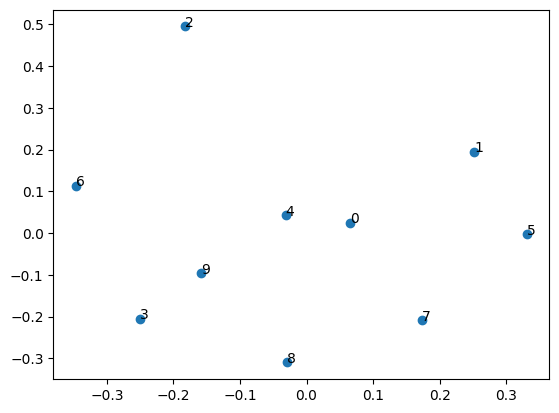

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(label_model.predict([i for i in range(10)])[:,0], label_model.predict([i for i in range(10)])[:,1])

for i in range(10):
    ax.annotate(i, label_model.predict([i])[0])